---
#6 - Neural Network Dog Breed Classifier
---
- Fix versions / MCRE style

In [ ]:
if 'Loads MainFrame && Functions':
  import os;
  #OPENCV_ENABLE_NONFREE 
  os.system('pip uninstall opencv-python -y')
  os.system('pip install opencv-contrib-python==3.4.2.17 --force-reinstall')

  import cv2 as cv
  #}{
  requiredModules='keras tensorflow webptools pysftp numpy requests wget scikit-multilearn'.split(' ')  
  if True:
    fn='modules-versions.txt' 
    os.system('pip freeze > '+fn)
    #ftpput(fn)
    installed=''
    with open(fn) as f:
      installed += f.read()
        
    for module in requiredModules:
      if(module+'==' not in  installed):
        print('Trying to install :',module)
        os.system('pip install '+module)

    os.system('pip freeze > '+fn);

  os.system('rm -f alpow.py gv.py;wget https://alpow.fr/gv.py;wget https://alpow.fr/alpow.py');import gv;import alpow;from alpow import *

  import tensorflow
  #tensorflow.random.set_seed(23021983)
  np.random.seed(23021983)

  SG('webRepo','https://1.x24.fr/a/jupyter/');SG('sftp',{'cd':'dogs6','web':GG('webRepo'),'h':'-','u':'-','p':'-'});#SG('useFTP',False);#ReadOnly
  SG('sftp',{'cd':'dogs6','web':GG('webRepo'),'h':'z','u':'z','p':'z'})    

  #import importlib;importlib.reload(alpow);

  def save(exc=[],fn='allVars',include=False,backup=False,ftp=True,cleanup=False,zip=True,authTypes=False):#=All
    useJoblib=False
    if(fn=='joblib'):
      useJoblib=True

    if(type(exc)==str):#quicksave multiple variables
      excs=exc.split(',')
      for exc in excs:
        exc=exc.strip(', \n')
        if(len(exc)==0):
          continue
        fn=exc
        include=[exc]
        exc=[]
        if(useJoblib):
          joblib.dump(globals()[fn],fn+'.joblib');ftpput(fn+'.joblib');
        elif ('tensorflow' in sys.modules) & (type(globals()[fn])==tensorflow.python.keras.engine.sequential.Sequential):
          p('tf save')
          globals()[fn].save(fn+'.h5');ftpput(fn+'.h5')
        else:
          alpow._save(globals(),exclusions=exc,fn=fn,include=include,backup=backup,ftp=ftp,cleanup=cleanup,zip=zip,authTypes=False)
      p(excs)
      return 1
    elif exc==[]:
      exc=exclusions;
    alpow._save(globals(),exclusions=exc,fn=fn,include=include,backup=backup,ftp=ftp,cleanup=cleanup,zip=zip,authTypes=authTypes)

  def load(fn='allVars',onlyIfNotSet=1):
    fns=fn.split(',')
    for fn in fns:
      fn=fn.strip(', \n')
      ok=1
      if(len(fn)==0):
        continue
      if(onlyIfNotSet):
        if fn in globals().keys():
    #override empty lists, dict, dataframe and items      
          if type(globals()[fn])==type:
            continue;
          elif type(globals()[fn])==pd.DataFrame:
            if globals()[fn].shape[0]>0:            
              continue
          elif(type(globals()[fn])==dict):
            if(len(globals()[fn])>0):
              continue
          elif(type(globals()[fn])==list):
            if(len(globals()[fn])>0):
              continue
          elif(type(globals()[fn])==scipy.sparse.csr.csr_matrix):
            if(globals()[fn].shape[0]>0):
              continue
          elif(type(globals()[fn])==np.ndarray):
            if(globals()[fn].shape[0]>0):
              continue
    #si déjà définie, passer au prochain     
          elif(globals()[fn]):
            continue
      globals().update(alpow.resume(fn))
    #endfor fn
    return;

  #load('X_train')

  def extract(x):
    liste=list(x.keys())
    for i in liste:
      globals()[i]=x[i]
    p('extracted : ',','.join(liste))

  #jeuDonnees=compact('y_test,')
  def compact(variables):
    x={}
    for i in variables.split(','):
      x[i]=globals()[i]    
    p('compacted : ',variables)
    return x

  def loadIfNotSet(x):
    if x not in globals().keys():
      load(x)

  #les grosses variables
  ###############}{

  import sklearn.multioutput
  import sklearn.gaussian_process
  import sklearn.multioutput
  from skmultilearn.problem_transform import BinaryRelevance
  from sklearn.naive_bayes import GaussianNB
  from skmultilearn.problem_transform import ClassifierChain
  from sklearn.linear_model import LogisticRegression
  from sklearn.pipeline import Pipeline
  from sklearn.metrics import accuracy_score
  from sklearn.multiclass import OneVsRestClassifier
  from scipy import sparse
  from sklearn.feature_extraction.text import TfidfVectorizer
  from sklearn.decomposition import LatentDirichletAllocation
  from sklearn.preprocessing import MultiLabelBinarizer
  from sklearn.model_selection import train_test_split
  from sklearn.model_selection import learning_curve
  from sklearn.model_selection import ShuffleSplit
  from sklearn.dummy import DummyClassifier
  from sklearn.naive_bayes import MultinomialNB
  from sklearn.linear_model import SGDClassifier
  from sklearn.linear_model import LogisticRegression
  from sklearn.svm import LinearSVC
  from sklearn.linear_model import Perceptron
  from sklearn.linear_model import PassiveAggressiveClassifier
  from sklearn.neural_network import MLPClassifier
  from sklearn.ensemble import RandomForestClassifier
  from sklearn import model_selection
  from sklearn.metrics import make_scorer
  from sklearn.metrics import confusion_matrix
  from sklearn.metrics import hamming_loss
  from sklearn.cluster import KMeans

  import math
  import IPython
  import multiprocessing
  cores = multiprocessing.cpu_count() 

  from sklearn.pipeline import Pipeline
  from sklearn.svm import SVC
  from sklearn.metrics import f1_score, make_scorer
  from sklearn.model_selection import train_test_split, GridSearchCV
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import f1_score
  from sklearn.metrics import roc_auc_score 
  from sklearn.metrics import average_precision_score
  from sklearn.metrics import recall_score
  from functools import partial
  import gc
  import re
  from bs4 import BeautifulSoup
  from nltk.tokenize import ToktokTokenizer
  from nltk.stem.wordnet import WordNetLemmatizer
  from nltk.corpus import stopwords
  from string import punctuation

  import sklearn.multioutput
  from functools import partial

  import glob,nltk
  from sklearn import preprocessing
  from sklearn import decomposition

  from sklearn.preprocessing import StandardScaler
  from sklearn.cluster import KMeans
  import plotly.express as px
  import numpy as np 
  import pandas as pd
  import matplotlib.pyplot as plt
  import seaborn as sns
  %matplotlib inline 
  import warnings,psutil

      
  from PIL import Image
  from PIL import ImageOps
  from PIL import ImageFilter



  from tensorflow import keras
  from keras.preprocessing.image import array_to_img 
  import keras.applications.resnet50
  import keras.applications.inception_v3
  import keras.applications.xception
  from keras.preprocessing.image import load_img, img_to_array
  from keras.applications.vgg16 import VGG16
  # keras image preparation
  from keras.applications.vgg16 import preprocess_input
  # decode prediction
  from keras.applications.vgg16 import decode_predictions
  import sklearn.metrics
  import keras.applications.vgg16

  import keras.engine.sequential
  from keras.utils import to_categorical
  from keras import optimizers

  from keras.preprocessing.image import ImageDataGenerator

  #from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D
  #from keras.models import Sequential
  from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D
  from tensorflow.keras.models import Sequential
  import joblib

  import tensorflow
  import scipy.sparse.csr
  from numpy.random import seed
  seed(23021983)  
  tensorflow.random.set_seed(23021983)

  #¤idée : IMG SIFT en input  

  def evalModel1(mdl,mdlName,X,Xi,datagen=False):
    global scores,preds
    nb=X.shape[1]
    if datagen:
      mdl.predict(datagen.flow(X))

    predictionsC=mdl.predict_classes(X)
    preds=raceLabel.inverse_transform(predictionsC)#ahhhhhhhh, enfin ;)
    ok=0;j=0;res=[]
    for i in X:#X_test2
      eq=0
      idx=Xi[j]
      top=preds[j]
      if(top==df.iloc[idx]['race']):
        eq=1
      eqt=' <> '
      if eq:
        eqt=' == '
      res+=[top + eqt+df.iloc[idx]['race']]
      ok+=eq
      j+=1  
    p(vc(preds))
    scores[mdlName]={'ok':(ok*100)/nb,'f1':sklearn.metrics.f1_score(df.iloc[Xi]['race'].values,preds,average='micro'),'jac':sklearn.metrics.jaccard_score(df.iloc[Xi]['race'].values,preds,average='micro')}   
    return res

  def mdlTrainInfo(mdlname,model_info1):
  # plot results at each iterations
    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_subplot(1,2,1)
    ax1.plot(range(0, len(model_info1.history["acc"])), model_info1.history["acc"],'o-')
    ax1.set_xlabel("epochs [-]")
    ax1.set_ylabel("accuracy [-]")
    ax2 = fig.add_subplot(1,2,2)
    ax2.set_xlabel("epochs [-]")
    ax2.set_ylabel("loss [-]")
    ax2.plot(range(0, len(model_info1.history['loss'])), model_info1.history["loss"],'ro-')
    fig.savefig(mdlname+'.png');webp(mdlname+'.png');plt.close()

  def load_prepare_img(path_img,width=224,height=224,simple=False):  
    img_raw = load_img(path_img, target_size=(width, height))  # #VGG16 input layer size
    img = img_to_array(img_raw)
    if(simple):
      return preprocess_input(img)#3 dimensions for my models

    img = img[np.newaxis, :]#4 dimensions
    return preprocess_input(img)  # Prétraiter l'image comme le veut VGG-16

  ####}{
  #incremental data
  #AttributeError: module 'tensorflow' has no attribute 'placeholder'
  #load('modelInfo')
  scores={};times={};models={};modelInfo={}
  load('models,times,scores')
  path_img_test = 'n02112018-Pomeranian/n02112018_514.jpg'

  if((not os.path.exists('waf.tar')) & (not os.path.exists(path_img_test))):
    getFile('waf.tar')
    if(os.path.exists('waf.tar')):
      os.system('tar xf waf.tar');

  #_modelInfo.history.keys()
  #dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
  def mdlTrainInfo(mdlname,model_info1):
  # plot results at each iterations
    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_subplot(1,2,1)
    ax1.plot(range(0, len(model_info1.history["accuracy"])), model_info1.history["accuracy"],'o-')
    ax1.set_xlabel("epochs [-]")
    ax1.set_ylabel("accuracy [-]")
    ax2 = fig.add_subplot(1,2,2)
    ax2.set_xlabel("epochs [-]")
    ax2.set_ylabel("loss [-]")
    ax2.plot(range(0, len(model_info1.history['loss'])), model_info1.history["loss"],'ro-')
    fig.savefig(mdlname+'.png');webp(mdlname+'.png');plt.close()

  def mdlTrainInfo2(mdlname,model_info1):
    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_subplot(1,2,1)
    ax1.plot(range(0, len(model_info1.history["categorical_accuracy"])), model_info1.history["categorical_accuracy"],'o-')
    ax1.set_xlabel("epochs [-]")
    ax1.set_ylabel("accuracy [-]")
    ax2 = fig.add_subplot(1,2,2)
    ax2.set_xlabel("epochs [-]")
    ax2.set_ylabel("loss [-]")
    ax2.plot(range(0, len(model_info1.history['loss'])), model_info1.history["loss"],'ro-')
    fig.savefig(mdlname+'.train.png');webp(mdlname+'.train.png');plt.close()

    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_subplot(1,2,1)
    ax1.plot(range(0, len(model_info1.history["val_categorical_accuracy"])), model_info1.history["val_categorical_accuracy"],'o-')
    ax1.set_xlabel("epochs [-]")
    ax1.set_ylabel("accuracy [-]")
    ax2 = fig.add_subplot(1,2,2)
    ax2.set_xlabel("epochs [-]")
    ax2.set_ylabel("loss [-]")
    ax2.plot(range(0, len(model_info1.history['val_loss'])), model_info1.history["val_loss"],'ro-')
    fig.savefig(mdlname+'.test.png');webp(mdlname+'.test.png');plt.close()

  def setG(k,v):
    if(k in globals().keys()):
      del(globals()[k]);
    globals()[k]=v
      
  def g(x):
    return globals()[x]

  def evalModel2(_mdl,mdlName,X,Xi,datagen=False,decoder=False):
    load('df,raceLabel'+nbBreeds+',scores')
    global scores,pred,preds,predictionsD,predictionsC
    nb=X.shape[1]
    p('mdlname:',_mdl._name)

    if datagen is not False:#€datagen:
      #predictionsC=np.argmax(mdl.predict(datagen.flow(X)), axis=-1)#NOT GOOD
      #predictionsD=mdl.predict_generator(datagen.flow(X),4)#C'est long .. long .. long
      predictionsC=np.argmax(_mdl.predict_generator(datagen.flow(X),4), axis=-1) # plus forte proba parmis toutes
      preds=globals()['raceLabel'+nbBreeds].inverse_transform(predictionsC)#ahhhhhhhh, enfin ;)
      #p('même proportions dans predictionsC que dans X donné ?')
      #return globals()['raceLabel'+nbBreeds].inverse_transform(predictionsC);
      #p('datagen',predictionsD)
    elif(decoder):
      preds=[]
      for i in X:
        pred=model.predict(i)
        classes=decoder(pred)
        top=classes[0][0][1].lower()
        preds+=[top]
    else:
      predictionsC=np.argmax(_mdl.predict(X), axis=-1)
      preds=globals()['raceLabel'+nbBreeds].inverse_transform(predictionsC)#ahhhhhhhh, enfin ;)

    ok=0;j=0;res=[]
    for i in X:#X_test2
      eq=0
      idx=Xi[j]
      top=preds[j]
      if(top==globals()['df'+nbBreeds].iloc[idx]['race']):
        eq=1
      eqt=' <> '
      if eq:
        eqt=' == '
      #res+=[top + eqt+df.iloc[idx]['race']]
      ok+=eq
      j+=1  

    p(unik(preds))
    jac=sklearn.metrics.jaccard_score(globals()['df'+nbBreeds].iloc[Xi]['race'].values,preds,average='micro')  
    scores[mdlName]={'ok':(ok*100)/nb,'f1':sklearn.metrics.f1_score(globals()['df'+nbBreeds].iloc[Xi]['race'].values,preds,average='micro'),'jac':jac}   
    p(scores[mdlName],'/nb:',nb,'=>',round(jac,3))
    labels=globals()['raceLabel'+nbBreeds].classes_
    cm=confusion_matrix(globals()['df'+nbBreeds].iloc[xtesti]['race'].values,preds,labels)
    cm_df=pd.DataFrame(cm,labels,labels);plt.figure(figsize=(15,15));sns.heatmap(cm_df,annot=True).get_figure().savefig(mdlName+'cm.png',bbox_inches='tight');webp(mdlName+'cm.png');plt.close()
    save('scores')

  def untarAllData(x=0):
    if((not os.path.exists('images.tar')) & (not os.path.exists('Images/n02108915-French_bulldog/n02108915_7806.jpg'))):
      os.system('rm -rf sample_data')
      a=time()
      ftpget('images.tar'.split(','))#,waf.tar,annotation.tar,lists.tar,train_data.mat,test_data.mat
      if(os.path.exists('images.tar')):
        os.system('tar xf images.tar');#os.system('tar xf lists.tar');os.system('tar xf annotation.tar');
      b=int(time()-a)
      p('récupération fichiers & untar en ',b,'secondes')#326 secondes
      p('_'*180)  

  def waf():
    if((not os.path.exists('waf.tar')) & (not os.path.exists(path_img_test))):
      os.system('rm -rf sample_data')
      a=time()
    #bcp plus long via requests ...  & untar incomplete .. !
      getFile('waf.tar')
      if(os.path.exists('waf.tar')):
        os.system('tar xf waf.tar');
        b=int(time()-a)
        p('récupération fichiers & untar en ',b,'secondes')#326 secondes
        p('_'*180)
      else:
        assert(False)

  def load_prepare_img2(path_img,width=224,height=224,simple=False,mode=1,ret=0):    
    if(mode==1):
      img_raw = load_img(path_img, target_size=(width, height))
      img = img_to_array(img_raw)
      if(simple):
        return preprocess_input(img)
      return preprocess_input(img[np.newaxis, :])  # 4 dimensions => VGG16
    if(mode==2):#edges
      from skimage.filters import prewitt_h,prewitt_v
      img_raw = load_img(path_img,grayscale=True,target_size=(width,height))
      if ret==1:
        return prewitt_h(img_raw)[:,:,np.newaxis]#donne le toutou gris 
      if ret==2:
        return prewitt_v(img_raw)
      #image = imread(path_img_test,as_gray=True)#requires 2d Array
      return prewitt_h(img_raw),prewitt_v(img_raw)
    if(mode==3):#Feat3:sift keypoints
      img = load_img(path_img, target_size=(width, height))
      img_equalize = ImageOps.equalize(img)
      mat_img_gray = cv.cvtColor(np.array(img_equalize),cv.COLOR_BGR2GRAY)
      sift = cv.xfeatures2d.SIFT_create()
      kp = sift.detect(mat_img_gray, None)#todo : as Array
      return cv.drawKeypoints(mat_img_gray, kp, np.array(img_equalize))
    if(mode==4):#Feat4:SURF keypoints
      img = load_img(path_img, target_size=(width, height))
      img_equalize = ImageOps.equalize(img)
      mat_img_gray = cv.cvtColor(np.array(img_equalize),cv.COLOR_BGR2GRAY)
      surf = cv.xfeatures2d.SURF_create(400)
      surf.setHessianThreshold(12800)
      kp, des = surf.detectAndCompute(mat_img_gray, None)
      mat_img_gray_surf_feat = cv.drawKeypoints(mat_img_gray, kp, None, (255,0,0), 4)
      return mat_img_gray_surf_feat
      mat_img_gray_surf_feat.shape#(500, 496, 3)
      array_to_img(mat_img_gray_surf_feat)

  def evalModel3(_mdl,mdlName,X,Xi,datagen=False,decoder=False,w=15,h=15,fn=''):
    load('df'+nbBreeds+',raceLabel'+nbBreeds+',scores')
    global scores,pred,preds,predictionsD,predictionsC
    nb=X.shape[0]
    p('mdlname:',_mdl._name,'with',nb,'records')

    if datagen is not False:#€datagen:
      #predictionsC=np.argmax(mdl.predict(datagen.flow(X)), axis=-1)#NOT GOOD
      #predictionsD=mdl.predict_generator(datagen.flow(X),4)#C'est long .. long .. long
      predictionsC=np.argmax(_mdl.predict_generator(datagen.flow(X),4), axis=-1) # plus forte proba parmis toutes
      preds=globals()['raceLabel'+nbBreeds].inverse_transform(predictionsC)#ahhhhhhhh, enfin ;)
      #p('même proportions dans predictionsC que dans X donné ?')
      #return globals()['raceLabel'+nbBreeds].inverse_transform(predictionsC);
      #p('datagen',predictionsD)
    elif(decoder):
      preds=[]
      for i in X:
        pred=model.predict(i)
        classes=decoder(pred)
        top=classes[0][0][1].lower()
        preds+=[top]
    else:
      predictionsC=np.argmax(_mdl.predict(X), axis=-1)
      preds=globals()['raceLabel'+nbBreeds].inverse_transform(predictionsC)#ahhhhhhhh, enfin ;)

    ok=0;j=0;res=[]
    for i in X:#X_test2
      eq=0
      idx=Xi[j]
      top=preds[j]
      if(top==globals()['df'+nbBreeds].iloc[idx]['race']):
        eq=1
      eqt=' <> '
      if eq:
        eqt=' == '
      #res+=[top + eqt+df.iloc[idx]['race']]
      ok+=eq
      j+=1  

    p(unik(preds))
    ytrue=globals()['df'+nbBreeds].iloc[Xi]['race'].values
    jac=sklearn.metrics.jaccard_score(ytrue,preds,average='micro')
    scores[mdlName]={'ok':int((ok*100)/nb),'f1':sklearn.metrics.f1_score(ytrue,preds,average='micro'),'jac':jac}   
    p(scores[mdlName],'/nb:',nb,'=>',round(jac,3))

    labels=globals()['raceLabel'+nbBreeds].classes_
    cm=confusion_matrix(ytrue,preds,labels)
    fn2=mdlName+'cm'+fn+'.png'
    cm_df=pd.DataFrame(cm,labels,labels);plt.figure(figsize=(w,h));sns.heatmap(cm_df,annot=True).get_figure().savefig(fn2,bbox_inches='tight');webp(fn2);plt.close()
    save('scores')

  #sur un image en grayscle
  def histo(img,mode='sift'):
    load('kmeans_'+mode)
    km=globals()['kmeans_'+mode]
    km.verbose = False
    k=1200#k=len(species)*10
    img = load_img(img, target_size=(224, 224))#img = cv2.imread(img)
    img_equalize = ImageOps.equalize(img)
    mat_img_gray = cv.cvtColor(np.array(img_equalize),cv.COLOR_BGR2GRAY)
    if mode=='sift':
      sift = cv.xfeatures2d.SIFT_create()
    elif mode=='orb':
      sift = cv.ORB_create()
    elif mode=='surf':
      sift = cv.xfeatures2d.SURF_create()
      # Again compute keypoints and check its number.
    kp,des = sift.detectAndCompute(mat_img_gray, None)#todo : as Array  
    #kp, des = sift.detectAndCompute(img, None)
    histog = np.zeros(k)
    nkp = np.size(kp)
    for d in des:
      idx = km.predict([d])
      histog[idx] += 1/nkp # Because we need normalized histograms, I prefere to add 1/nkp directly
    return histog

  def trainTestData(nbBreeds,simple=True,generator=False,dgargs={'featurewise_center':True,'featurewise_std_normalization':True,'rotation_range':20,'width_shift_range':0.2,
                                               'height_shift_range':0.2,'horizontal_flip':True,'vertical_flip':True,'shear_range':0.2,'zoom_range':0.2},w=224,h=224):
    load('races2jpg'+nbBreeds+',df'+nbBreeds+',raceLabel'+nbBreeds)
    dg3=0
    if True:
      X_train,X_test,Y_train,Y_test=train_test_split(globals()['df'+nbBreeds]['jpg'],globals()['df'+nbBreeds]['race'].values,random_state=1983)
      xtraini=list(X_train.index)
      xtesti=list(X_test.index)

      globals()['df'+nbBreeds].loc[xtraini,'tt']='train'
      globals()['df'+nbBreeds].loc[xtesti,'tt']='test'

      Y_train3=to_categorical(globals()['raceLabel'+nbBreeds].transform(Y_train))
      Y_test3=to_categorical(globals()['raceLabel'+nbBreeds].transform(Y_test))
    #todo:load_prepare_img as Iterator
    if True:
      #deli('X_train_nn,X_test_nn')
      X_train2s=np.array([load_prepare_img(i,simple=simple,width=w,height=h) for i in X_train.values])#simple for my custom models
      X_test2s=np.array([load_prepare_img(i,simple=simple,width=w,height=h) for i in X_test.values])

      XtrainV=X_train.values;XtestV=X_test.values;
      if(generator):
        dg3=ImageDataGenerator(**dgargs)
        dg3.fit(np.concatenate([X_train2s,X_test2s]))

    return Y_train3,Y_test3,xtraini,xtesti,X_train2s,X_test2s,XtrainV,XtestV,dg3


  ftpls()
  waf()
  nbBreeds='4'#as string please

  tensorflow.random.set_seed(1983)
  init_he_n = keras.initializers.he_normal(seed=1983)
  init_glorot_u = keras.initializers.glorot_uniform(seed=1983)
  conv_init = dens_init = out_init = init_glorot_u 

  epochs=500
  batch_size=64 #divided per GPU cores
  nb_filters = 64 # Conv2D layers
  nb_nodes = 50 # first FC layer
  load('scores,times')
  p('Last Run:',datetime.datetime.now())
  message('neural network restarted')

NameError: ignored

---
##A) Tests
- Interconnectivité et fonctions bases du framework
---

In [ ]:
%%script False
SG('useFTP',False)#check its working well - creating folder as not having ftp credentials
ftpget('test/pomeranian.jpg')
assert(os.path.exists('test/pomeranian.jpg'))
getFile('test/chihuhaha.jpg')#gets list first, is somehow different ..
assert(os.path.exists('test/chihuhaha.jpg'))
ftpget('waf.tar');
assert(os.path.getsize('waf.tar')==24463360)
#ERROR! Session/line number was not unique in database. History logging moved to new session 62
#os.system('rm -rf n02085620-Chihuahua n02099601-golden_retriever n02106166-Border_collie n02112018-Pomeranian')
os.system('tar xf waf.tar');
assert(os.path.exists('n02106166-Border_collie/n02106166_1031.jpg'))
model=tensorflow.keras.applications.vgg16.VGG16(classes=1000,include_top=True)
p('tests successful')
SG('useFTP',True)

rg get ok:test/pomeranian.jpg
rg get ok:test/chihuhaha.jpg
rg get ok:waf.tar
553467904/553467096 [==============================] - 4s 0us/step
tests successful


---
#I) Gen Dataframe / 4 espèces
---
- untar images & stuff in ...

In [ ]:
#from google.colab import drive;drive.mount('drive',force_remount=False)
#ftplist=ftpls()
#n02088094-Afghan_hound\n02088094_980.jpg
waf()
os.system("find . -type f -name '*.jpg' > jpg.list")
listOfJpegFiles=fgc('jpg.list').split('\n')
races2jpg={}
for i in listOfJpegFiles:
  if ('n0' in i) & ('-' in i) & ('/' in i):
    x=i.split('/')
    x=x[1].split('-')
    x.pop(0)#remove n0-
    race='-'.join(x).lower()
    if race not in races2jpg.keys():
      races2jpg[race]=[]
    races2jpg[race]+=[i]
    #print(race,'=>',i)

df=pd.DataFrame({'race':[],'jpg':[],'tt':[]})
for race in list(races2jpg.keys()):
  jpeg=races2jpg[race]
  df=pd.concat([df,pd.DataFrame({'race':[race]*len(jpeg),'jpg':jpeg,'tt':['']*len(jpeg)})])
df.reset_index(inplace=True)  
df4=df
save('races2jpg,df,df4')

fs : 0 //--- saved in:0s
tgz   races2jpg.tgz   True
fs : 0 //--- saved in:0s
tgz   df.tgz   True
fs : 0 //--- saved in:0s
tgz   df4.tgz   True
['races2jpg', 'df', 'df4']


1

---
##a) 20 / 120 espèces
---

In [ ]:
untarAllData(1)
nbBreedss='20,120'.split(',')
for nbBreeds in nbBreedss:
  os.system('find Images -type d -name "n0*" | head -n '+nbBreeds+' > breeds.list')
  folders=fgc('breeds.list').split('\n')
  globals()['races2jpg'+nbBreeds]={}
  for folder in folders:
    images=glob.glob(folder+'/*.jpg')
    for i in images:
      if ('n0' in i) & ('-' in i) & ('/' in i):
        x=i.split('/')
        x=x[1].split('-')      
        x.pop(0)#remove n0-
        race='-'.join(x).lower()
        if race not in globals()['races2jpg'+nbBreeds].keys():
          globals()['races2jpg'+nbBreeds][race]=[]
        globals()['races2jpg'+nbBreeds][race]+=[i]

  globals()['df'+nbBreeds]=pd.DataFrame({'race':[],'jpg':[],'tt':[]})
  for race in list(globals()['races2jpg'+nbBreeds].keys()):
    jpeg=globals()['races2jpg'+nbBreeds][race]
    globals()['df'+nbBreeds]=pd.concat([globals()['df'+nbBreeds],pd.DataFrame({'race':[race]*len(jpeg),'jpg':jpeg,'tt':['']*len(jpeg)})])
  globals()['df'+nbBreeds].reset_index(inplace=True)    

  globals()['raceLabel'+nbBreeds]=sklearn.preprocessing.LabelEncoder()
  globals()['raceLabel'+nbBreeds].fit(globals()['df'+nbBreeds]['race'])
  globals()['raceLabel'+nbBreeds].classes_
  save('races2jpg'+nbBreeds+',df'+nbBreeds+',raceLabel'+nbBreeds)

fs : 0 //--- saved in:0s
tgz   races2jpg20.tgz   True
fs : 0 //--- saved in:0s
tgz   df20.tgz   True
fs : 0 //--- saved in:0s
tgz   raceLabel20.tgz   True
['races2jpg20', 'df20', 'raceLabel20']
fs : 0 //--- saved in:0s
tgz   races2jpg120.tgz   True
fs : 0 //--- saved in:0s
tgz   df120.tgz   True
fs : 0 //--- saved in:0s
tgz   raceLabel120.tgz   True
['races2jpg120', 'df120', 'raceLabel120']


---
##b) Stats
---

webp   plotnombre.esp-ce.webp   True
put : https://1.x24.fr/a/jupyter/dogs6/plotnombre.esp-ce.webp?a=20200415-082109


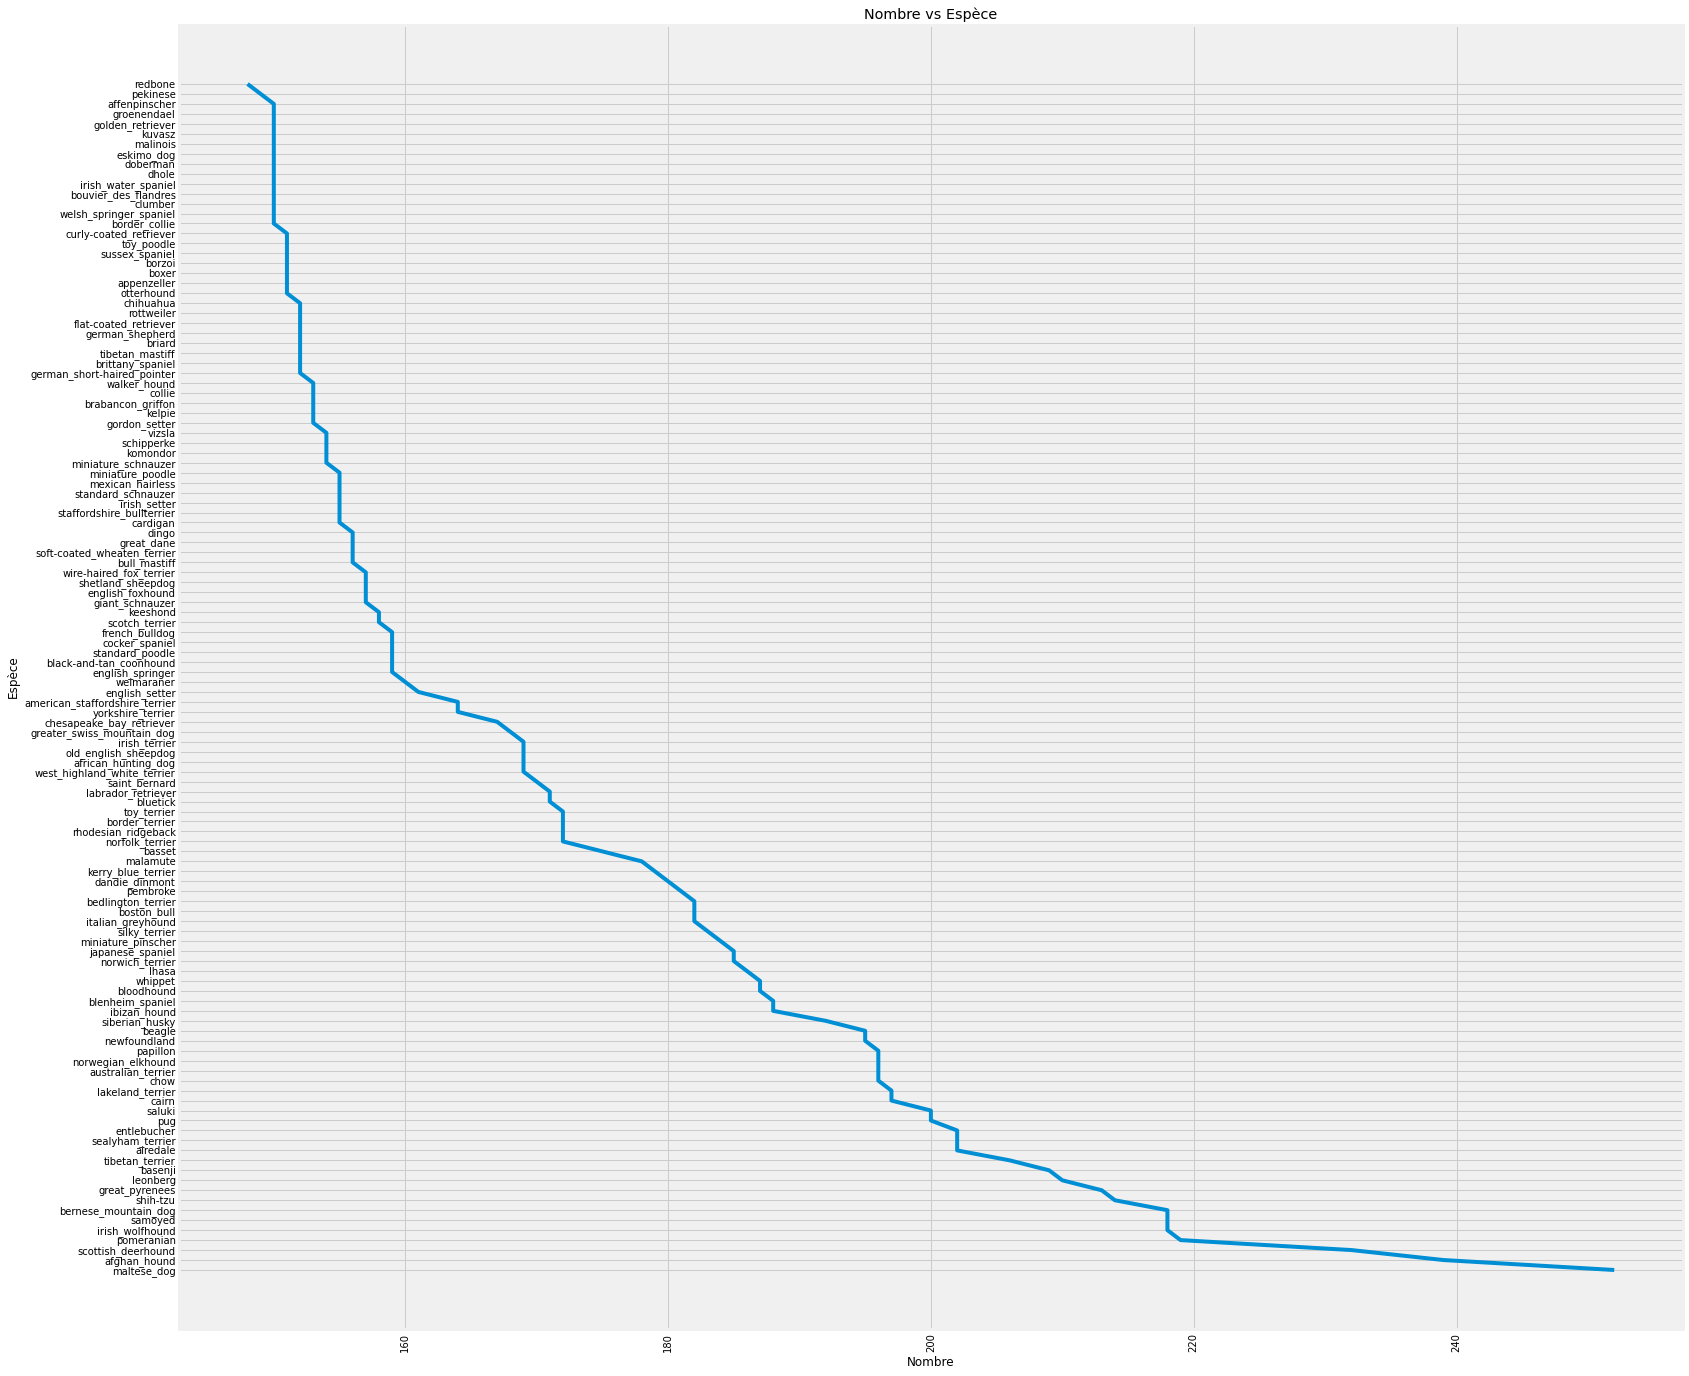

In [ ]:
load('df120')
df120.groupby('race').agg('count')
agg=df120.groupby('race').agg('count').sort_values(by='index',ascending=False)
ndf=pd.DataFrame({'Espèce':agg.index.values,'Nombre':agg['index'].values})
plot(ndf,width=24,height=24,rotate=90,i='Nombre',j='Espèce')


---
##c) Train/Validation/Test splits
---

In [ ]:
#iterative for same weight
import sklearn.model_selection
'''
from sklearn.model_selection import StratifiedShuffleSplit

  classes=globals()['df'+nbBreeds]['race'].values
  
  trainTest,remise,a,b = iterative_train_test_split(globals()['df'+nbBreeds],np.array(classes),test_size=0.2)
  p(trainTest)
  assert(False)

iterative_train_test_split(np.array(globals()['df'+nbBreeds]['jpg'].values),np.array(globals()['df'+nbBreeds]['race'].values),test_size=.2)


stratSplit = StratifiedShuffleSplit(globals()['df'+nbBreeds]['race'].values, test_size=0.2, random_state=1983)
for train_idx, test_idx in stratSplit:
  p(train_idx, test_idx)
    X_train=X[train_idx]
    y_train=y[train_idx]
'''  

nbBreedss='4,20,120'.split(',')
for nbBreeds in nbBreedss:  
  load('df'+nbBreeds)
  proportions=pd.DataFrame()

  globals()['raceLabel'+nbBreeds]=sklearn.preprocessing.LabelEncoder()
  globals()['raceLabel'+nbBreeds].fit(globals()['df'+nbBreeds]['race'])
  globals()['raceLabel'+nbBreeds].classes_
  save('raceLabel'+nbBreeds)
  
  a,remise=sklearn.model_selection.train_test_split(globals()['df'+nbBreeds].index.values,test_size=.2,random_state=1983,stratify=globals()['df'+nbBreeds]['race'].values)

  remiserace=globals()['df'+nbBreeds].iloc[remise]['race']
  tot=len(remiserace)
  x=round(unik(remiserace)/tot,2)
  x.rename('remise'+nbBreeds,inplace=True)
  proportions=pd.concat([proportions,x],axis=1)
  globals()['df'+nbBreeds].loc[remise,'tt']='remise'

  trainTest=globals()['df'+nbBreeds].iloc[a]['race']
  tot=len(trainTest)
  x=round(unik(trainTest)/tot,2)
  x.rename('traintest'+nbBreeds,inplace=True)
  proportions=pd.concat([proportions,x],axis=1)

  train,test=sklearn.model_selection.train_test_split(a,test_size=.2,random_state=1983,stratify=globals()['df'+nbBreeds].iloc[a]['race'].values)
  globals()['df'+nbBreeds].loc[train,'tt']='train'
  globals()['df'+nbBreeds].loc[test,'tt']='test'


  train1=globals()['df'+nbBreeds].iloc[train]['race']
  tot=len(train1);x=round(unik(train1)/tot,2)
  x.rename('train'+nbBreeds,inplace=True)
  proportions=pd.concat([proportions,x],axis=1)
  
  test1=globals()['df'+nbBreeds].iloc[test]['race']
  tot=len(test1);x=round(unik(test1)/tot,2)
  x.rename('test'+nbBreeds,inplace=True)
  proportions=pd.concat([proportions,x],axis=1)
  
  globals()['trainTestSet'+nbBreeds]=compact('train,test,remise')  
  save('trainTestSet'+nbBreeds+',df'+nbBreeds)
  
  tot=globals()['df'+nbBreeds].shape[0]
  display(proportions)
  display(round(unik(globals()['df'+nbBreeds]['tt'])/tot,2))

fs : 0 //--- saved in:0s
tgz   raceLabel4.tgz   True
['raceLabel4']
compacted :  train,test,remise
fs : 0 //--- saved in:0s
tgz   trainTestSet4.tgz   True
fs : 0 //--- saved in:0s
tgz   df4.tgz   True
['trainTestSet4', 'df4']


,remise4,traintest4,train14,test14
pomeranian,0.33,0.33,0.33,0.32
chihuahua,0.23,0.23,0.22,0.23
border_collie,0.22,0.22,0.22,0.22
golden_retriever,0.22,0.22,0.22,0.22


train     0.64
remise    0.20
test      0.16
Name: tt, dtype: float64

Resuming :  df20 ,exists: False  or tgz: False
get:df20.tgz
files found: 1
list of files within tgz: ['df20.pickle']
fs : 0 //--- saved in:0s
tgz   raceLabel20.tgz   True
['raceLabel20']
compacted :  train,test,remise
fs : 0 //--- saved in:0s
tgz   trainTestSet20.tgz   True
fs : 0 //--- saved in:0s
tgz   df20.tgz   True
['trainTestSet20', 'df20']


,remise20,traintest20,train120,test120
maltese_dog,0.07,0.07,0.07,0.07
irish_wolfhound,0.06,0.06,0.06,0.06
leonberg,0.06,0.06,0.06,0.06
airedale,0.06,0.06,0.06,0.06
newfoundland,0.06,0.06,0.06,0.06
miniature_pinscher,0.05,0.05,0.05,0.05
norwich_terrier,0.05,0.05,0.05,0.05
italian_greyhound,0.05,0.05,0.05,0.05
old_english_sheepdog,0.05,0.05,0.05,0.05
toy_terrier,0.05,0.05,0.05,0.05


train     0.64
remise    0.20
test      0.16
Name: tt, dtype: float64

fs : 0 //--- saved in:0s
tgz   raceLabel120.tgz   True
['raceLabel120']
compacted :  train,test,remise
fs : 0 //--- saved in:0s
tgz   trainTestSet120.tgz   True
fs : 0 //--- saved in:0s
tgz   df120.tgz   True
['trainTestSet120', 'df120']


,remise120,traintest120,train1120,test1120
maltese_dog,0.01,0.01,0.01,0.01
afghan_hound,0.01,0.01,0.01,0.01
scottish_deerhound,0.01,0.01,0.01,0.01
irish_wolfhound,0.01,0.01,0.01,0.01
pomeranian,0.01,0.01,0.01,0.01
samoyed,0.01,0.01,0.01,0.01
bernese_mountain_dog,0.01,0.01,0.01,0.01
great_pyrenees,0.01,0.01,0.01,0.01
shih-tzu,0.01,0.01,0.01,0.01
leonberg,0.01,0.01,0.01,0.01


train     0.64
remise    0.20
test      0.16
Name: tt, dtype: float64

---
# II) Filtres, Features, Extractions
---

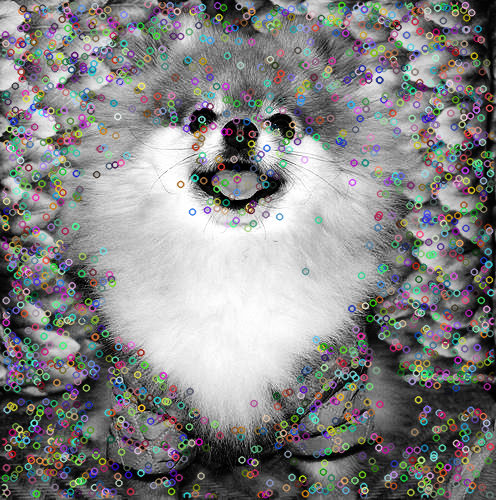

In [ ]:
#SIFT
#OPENCV_ENABLE_NONFREE 
#ou utiliser https://docs.opencv.org/4.1.2/d1/d89/tutorial_py_orb.html
img = Image.open(path_img_test) 
img_autocontrast = ImageOps.autocontrast(img)
img_autocontrast
img_equalize = ImageOps.equalize(img)
mat_img_equalize = np.array(img_equalize)
mat_img_gray = cv.cvtColor(np.array(img_equalize),cv.COLOR_BGR2GRAY)
sift = cv.xfeatures2d.SIFT_create()
kp = sift.detect(mat_img_gray, None)
mat_img_features = cv.drawKeypoints(mat_img_gray, kp, np.array(img_equalize))
img_features = Image.fromarray(mat_img_features).convert('RGB')
img_features
#isolate background noise :: détection sol, textures => négatives

##B) Surf

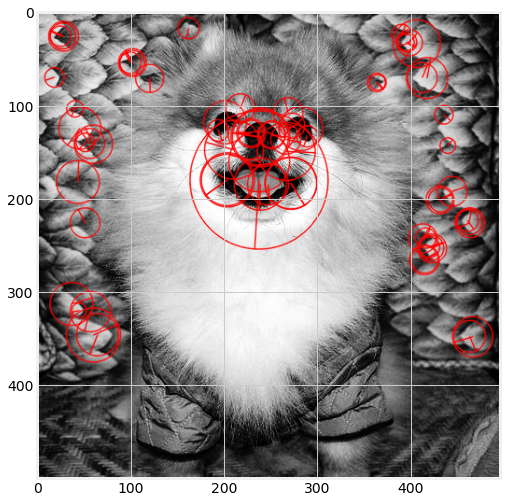

64
128
(71, 128)


In [ ]:
# Create SURF object. You can specify params here or later.
# Here I set Hessian Threshold to 400
surf = cv.xfeatures2d.SURF_create(400)
# Find keypoints and descriptors directly
kp, des = surf.detectAndCompute(mat_img_gray, None)
# Check present Hessian threshold
print('surf hessian:',surf.getHessianThreshold() )
# We set it to some 50000. Remember, it is just for representing in picture. In actual cases, it is better to have a value 300-500
surf.setHessianThreshold(12800)
# Again compute keypoints and check its number.
kp, des = surf.detectAndCompute(mat_img_gray, None)
print('kp',len(kp) )
mat_img_gray_surf_feat = cv.drawKeypoints(mat_img_gray, kp, None, (255,0,0), 4)

#PrintTheImage
fig = plt.figure(figsize=(8, 8))
plt.imshow(mat_img_gray_surf_feat)
plt.show()

# Find size of descriptor
print( surf.descriptorSize() )
# That means flag, "extended" is False.
surf.getExtended()
# So we make it to True to get 128-dim descriptors.
surf.setExtended(True)
kp, des = surf.detectAndCompute(mat_img_gray, None)
print( surf.descriptorSize() )
print( des.shape )

display(array_to_img(preprocess_input(img_to_array(img_raw))))

kp
#surf for keras input

---
##C) Preprocess Image
---

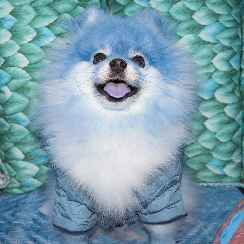

In [ ]:
#preprocess_image - mean pixel
img_raw = load_img(path_img_test, target_size=(244, 244))
display(array_to_img(preprocess_input(img_to_array(img_raw))))

---
##D) Contours 
---

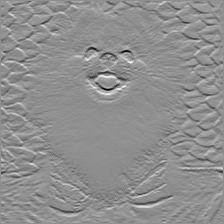

In [ ]:
Contours=load_prepare_img2(path_img_test,mode=2,ret=1)
display(array_to_img(Contours))

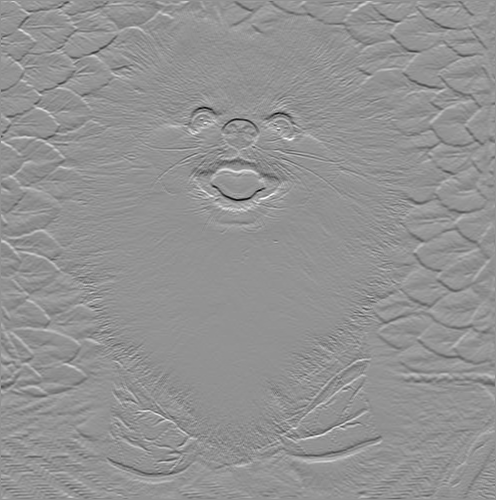

'\nx=imshow(edges_prewitt_vertical)\nimshow(edges_prewitt_horizontal)\n    \n\nx,y=load_prepare_img2(path_img_test,mode=2)  \nimshow(x)\nimshow(y)\n\nx=load_prepare_img2(path_img_test,mode=2,ret=1)\nnp.array(x).shape#(224,224,1)\narray_to_img(x)#\n\nx=edges_prewitt_horizontal\nx[:,:,np.newaxis].shape\narray_to_img(x[:,:,np.newaxis])#donne le toutou gris\n'

In [ ]:
#Obtention des contours - importing the required libraries
import numpy as np
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
import matplotlib.pyplot as plt
%matplotlib inline
image = imread(path_img_test,as_gray=True)#requires 2d Array
edges_prewitt_horizontal = prewitt_h(image)
edges_prewitt_vertical = prewitt_v(image)

x=edges_prewitt_horizontal
'''
#array_to_img(x[:,:,np.newaxis])#donne le toutou gris
#np.array([x]).shape
#x[np.newaxis,:].shape

np.expand_dims(x, axis=1).shape#à la fin
x.shape

x=imshow(edges_prewitt_vertical)
imshow(edges_prewitt_horizontal)
    

x,y=load_prepare_img2(path_img_test,mode=2)  
imshow(x)
imshow(y)

x=load_prepare_img2(path_img_test,mode=2,ret=1)
np.array(x).shape#(224,224,1)
array_to_img(x)#

x=edges_prewitt_horizontal
x[:,:,np.newaxis].shape
array_to_img(x[:,:,np.newaxis])#donne le toutou gris
'''
#rajouter une dimension pour être lue comme image sans couleurs
display(array_to_img(x[:,:,np.newaxis]))

##E) Hog

In [ ]:
%%script False
#https://nikolasent.github.io/classifier/2017/08/01/Image-classification-using-SVM.html
!pip install skimage
from skimage.feature import hog
number_of_orientations=8
pix_per_cell=4
cell_per_block=4
#visualise = False, , transform_sqrt = True
features = hog(path_img_test, orientations = number_of_orientations, pixels_per_cell = (pix_per_cell, pix_per_cell),cells_per_block = (cell_per_block, cell_per_block), feature_vector = True)
p(features)

---
#III) Data Split & prepare
---

In [ ]:
%%script False
#¤idée : IMG SIFT en input  
#p(load_prepare_img(path_img_test).shape) #(1, 224, 224, 3) for VGG input
#p(load_prepare_img(path_img_test,simple=True).shape) #(224, 224, 3) Custom
#raceLabel.transform(df['race'])
'''
X_train,X_test,Y_train,Y_test=train_test_split(df['jpg'],df['race'].values,random_state=42)
xtraini=list(X_train.index)
df.loc[xtraini,'tt']='train'
xtesti=list(X_test.index)
df.loc[xtesti,'tt']='test'

X_train=X_train.values
X_test=X_test.values
X_train2=np.array([load_prepare_img(i) for i in X_train])
X_train2b=np.array([load_prepare_img(i,299,299) for i in X_train])#inception
Y_train2=raceLabel.transform(Y_train)
Y_train3=to_categorical(Y_train2)
Y_test2=raceLabel.transform(Y_test)
Y_test3=to_categorical(Y_test2)

X_train2s=np.array([load_prepare_img(i,simple=True) for i in X_train])#simple for my custom models
X_test2=np.array([load_prepare_img(i) for i in X_test])
X_test2s=np.array([load_prepare_img(i,simple=True) for i in X_test])

save('Y_train3,Y_test3')
save('X_train,X_test,Y_train,Y_test,X_train2,X_train2b,Y_train2,xtraini,xtesti,X_train2s,X_test2s,Y_test2,X_test2')
nbBreeds='20'

'''

---
#IV) Classic Classifiers
---

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

#load('raceLabel,X_test,X_train2,Y_train2,xtesti')
#la limite niveau ream est de ??
nbTotImagesUsed=3600#12000 : limited ram

nbBreedss='4,20,120'.split(',')
for nbBreeds in nbBreedss:
  load('df'+nbBreeds+',raceLabel'+nbBreeds+',trainTestSet'+nbBreeds)#train,test,remise 
  extract(globals()['trainTestSet'+nbBreeds])

  train2=train.values.copy()
  test2=test.values.copy()
  np.random.shuffle(train2)
  np.random.shuffle(test2)
  #p(len(globals()['df'+nbBreeds].loc[train]['jpg'].values))#test images  

  X_train2=globals()['df'+nbBreeds].loc[train2]['jpg'].values
  X_test2=globals()['df'+nbBreeds].loc[test2]['jpg'].values
  Y_train=globals()['df'+nbBreeds].loc[train2]['race'].values
  Y_test=globals()['df'+nbBreeds].loc[test2]['race'].values
  
  maxx=int(nbTotImagesUsed / int(nbBreeds))
  if(len(X_train2)>maxx):
    maxy=int(maxx*.2)
    X_train2=X_train2[:maxx]
    Y_train=Y_train[:maxx]
    X_test2=X_test2[:maxy]
    Y_test=Y_test[:maxy]   

  #aplatir les array contenant les images en entrée
  X_train2=np.array([load_prepare_img(i).flatten() for i in X_train2])
  X_test2=np.array([load_prepare_img(i).flatten() for i in X_test2])
  p('X_train2 length:',len(X_train2))
  p('X_test2 length:',len(X_test2))

  Y_train=to_categorical(globals()['raceLabel'+nbBreeds].transform(Y_train))
  Y_test=to_categorical(globals()['raceLabel'+nbBreeds].transform(Y_test))
  correct=np.argmax(Y_test, axis=-1)
  nb=len(correct)

  #n_jobs=1 si OOM
  mdls={
      'ovr_linearsvc_'+nbBreeds:OneVsRestClassifier(LinearSVC(random_state=23021983), n_jobs=1),
      'ovr_logreg_'+nbBreeds:   OneVsRestClassifier(LogisticRegression(random_state=23021983), n_jobs=1),
      }

  for mdlname in mdls.keys():
    mdl=mdls[mdlname]
    mdl.fit(X_train2,Y_train)
    globals()[mdlname]=mdl
    save(mdlname)#ovr_linearsvc_20
    globals()['raceLabel'+nbBreeds]
    pred=mdl.predict(X_test2)#toutes d'un coup
    del(mdl)
    preds=np.argmax(pred, axis=-1)#
    #globals()['raceLabel'+nbBreeds].inverse_transform(Y_test[0])
    #preds=globals()['raceLabel'+nbBreeds].inverse_transform(preds)
    #p('probabilities ... ',vc(preds)  
    ok=0;j=0;res=[];
    for i in correct:
      if(preds[j] == correct[j]):
        ok+=1
      j+=1  
    scores[mdlname]={'ok':round((ok*100)/nb,2),'f1':sklearn.metrics.f1_score(correct,preds,average='micro'),'jac':sklearn.metrics.jaccard_score(correct,preds,average='micro')}   
save('scores')
#load('scores')
ndf=pd.DataFrame(scores).T
display(ndf[ndf.index.str.contains('ovr_')].sort_values(by='jac',ascending=False))

,ok,f1,jac
ovr_linearsvc,44.642857,0.446429,0.287356
ovr_logreg,44.047619,0.440476,0.282443
ovr_linearsvc_4,41.670000,0.416667,0.263158
ovr_logreg_4,39.810000,0.398148,0.248555
ovr_mpl_surf_4,37.960000,0.379630,0.234286
ovr_mpl2_surf_4,37.040000,0.370370,0.227273
ovr_mpl_sift_4,35.190000,0.351852,0.213483
ovr_mpl2_sift_4,32.410000,0.324074,0.193370
ovr_mpl_orb_4,32.410000,0.324074,0.193370
ovr_mpl2_orb_4,32.410000,0.324074,0.193370


In [ ]:
#plus il y a de classes et plus les performances de classifieurs ordinaires décroissent ..
display(ndf[~ndf.index.str.contains('ovr_')].sort_values(by='jac',ascending=False))

,ok,f1,jac
resnet50Trimmed_120_40,96.000000,0.966616,0.935388
resnet50Trimmed_e_120,96.000000,0.964137,0.930757
resnet50c_cat_20,91.000000,0.918708,0.849640
resnet50dTrimLastLayer_cat_20,88.000000,0.886414,0.796000
resnet50_120b,79.000000,0.796875,0.662338
vgg16,73.757455,0.737575,0.584252
resnet50,65900.000000,0.733853,0.579595
resnet50_20b,73.000000,0.730159,0.575000
n1000-1,34.821429,0.464286,0.302326
vgg16Trimmed_20,42.000000,0.423971,0.269012


---
##a) SIFT / Surf / Orb / Mlp => Kmeans
---

In [ ]:
#Pour toutes les espèces constituer un dictonaire de features extraites des images, puis effectuer un kmeans sur ces dernieres
untarAllData()
import sklearn.cluster
os.system('find . -type d -name "n02*" > folders.list')
speciesFolders=fgc('folders.list').split('\n')

k=len(species)*10 # 10 clusters par race => 1200 clusters ^^
methods='sift,surf,orb'.split(',')
for method in methods:
  if('kmeans_'+method not in globals().keys()):
    p('kmeans for',method)
    dico=[]
    c=0
    for specie in speciesFolders:
      imgs=glob.glob(specie+'/*.jpg')
      for img in imgs:
        c+=1
        img = load_img(img, target_size=(224, 224))
        img_equalize = ImageOps.equalize(img)
        mat_img_gray = cv.cvtColor(np.array(img_equalize),cv.COLOR_BGR2GRAY)
        if method=='sift':
          sift = cv.xfeatures2d.SIFT_create()
        elif method=='orb':
          sift = cv.ORB_create()#has better results ?
        elif method=='surf':
          sift = cv.xfeatures2d.SURF_create()
        kp,des = sift.detectAndCompute(mat_img_gray, None)#todo : as Array
        for d in des:
          dico.append(d)
        #p(kp,des)    
    batch_size = len(imgs)*3#time times nb of images
#tol is early stopping tolerance    
    globals()['kmeans_'+method] = sklearn.cluster.MiniBatchKMeans(max_no_improvement=10,tol=0.00001,n_clusters=k, batch_size=batch_size, verbose=1,random_state=1983).fit(dico)
    save('kmeans_'+method)
#

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Minibatch iteration 26097/1926900: mean batch inertia: 81042.917384, ewa inertia: 83302.539503 
Minibatch iteration 26098/1926900: mean batch inertia: 81617.529084, ewa inertia: 83302.364608 
Minibatch iteration 26099/1926900: mean batch inertia: 81607.587524, ewa inertia: 83302.188699 
Minibatch iteration 26100/1926900: mean batch inertia: 80695.019883, ewa inertia: 83301.918088 
Minibatch iteration 26101/1926900: mean batch inertia: 83506.415807, ewa inertia: 83301.939314 
Minibatch iteration 26102/1926900: mean batch inertia: 80474.154697, ewa inertia: 83301.645804 
Minibatch iteration 26103/1926900: mean batch inertia: 81450.597372, ewa inertia: 83301.453675 
Minibatch iteration 26104/1926900: mean batch inertia: 82047.256748, ewa inertia: 83301.323496 
Minibatch iteration 26105/1926900: mean batch inertia: 81511.260514, ewa inertia: 83301.137696 
Minibatch iteration 26106/1926900: mean batch inertia: 815

---
##B) MLP
---

In [ ]:
'''4 espèces, 671 images => 292438 features détectées réparties / 40 labels'''
k=len(species)*10 # 10 clusters par race => 1200 clusters ^^
#retourne histograme de Kmeans sur une image
'''
vc(kmeans.labels_)
len(dico);dico[1].shape#
nbBreeds='20';
load('trainTestSet'+nbBreeds)
'''
#}{
nbBreeds=10
method='sift'#surf,orb

histo_list = []
y=[]



_nbBreeds=str(nbBreeds)
for specie in species[:nbBreeds]:
  imgs=glob.glob(specie+'/*.jpg')
  for img in imgs:
    x=specie.split('/')
    x=x[1].split('-')
    x.pop(0)#remove n0-
    race='-'.join(x).lower()
    y+=[race]
    histo_list.append(histo(img,method))    

p(len(histo_list))#671 images => 671 histograms
yraces=y
save('histo_list,yraces')

'''
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=600000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
tol=0.0001, validation_fraction=0.1, verbose=True,warm_start=False)
'''
#,n_jobs=-1 #very early finish ... damn
globals()['mlp'+_nbBreeds] = MLPClassifier(alpha=0.1,verbose=True,max_iter=600000,random_state=42,tol=0.01,learning_rate='adaptive',early_stopping=True)
globals()['mlp'+_nbBreeds].fit(np.array(histo_list),np.array(y))#no label encoding needed
save('mlp'+_nbBreeds)

untarAllData()
nbBreeds=20
_nbBreeds='20'
load('species,mlp'+_nbBreeds+',kmeans,histo_list,yraces')
preds={}
for specie in species[:nbBreeds]:  
  x=specie.split('/')
  p(x[-1])
  x=x[-1].split('-')
  x.pop(0)#remove n0-
  race='-'.join(x).lower()
  #p(specie,race);continue
  if race not in preds.keys():
    preds[race]=0
  imgs=glob.glob(specie+'/*.jpg')  
  c=len(imgs)
  for img in imgs:
    x=histo(img,method)
    if race == globals()['mlp'+_nbBreeds].predict([x])[0]:
      preds[race]+=1
  p('race:',race,'=>',preds[race],'/',c)
#species    
#= 50% pomeranian :) <=25% = retour statistiques des mêmes valeurs
#species : border_collie to chihuahua

c=0
for specie in species[:nbBreeds]:  
  imgs=glob.glob(specie+'/*.jpg')  
  c+=len(imgs)

preds
p(preds.sum(),'/',c)#obtenir somme des valeurs du dictionnaire

---
##C) Features on classifiers ?
---

In [ ]:
nbBreeds='4'
load('df'+nbBreeds+',raceLabel'+nbBreeds+',trainTestSet'+nbBreeds)#train,test,remise 
extract(globals()['trainTestSet'+nbBreeds])

mlp=MLPClassifier(tol=0.000001,n_iter_no_change=100,alpha=0.0001,learning_rate_init=0.01,max_iter=600000,learning_rate='adaptive',early_stopping=True,random_state=23021983,verbose=True)
mlp2=MLPClassifier(tol=0.0000001,n_iter_no_change=100,alpha=0.0001,learning_rate_init=0.1,max_iter=600000,learning_rate='adaptive',early_stopping=True,random_state=23021983,verbose=True)
#sift
methods='sift,surf,orb'.split(',')
for method in methods:
  imgs=globals()['df'+nbBreeds].iloc[train]['jpg'].values    
  X_train2=[histo(img,method) for img in imgs]
  
  imgs=globals()['df'+nbBreeds].iloc[test]['jpg'].values    
  X_test2=[histo(img,method) for img in imgs]

  Y_train=globals()['df'+nbBreeds].iloc[train]['race'].values
  Y_test=globals()['df'+nbBreeds].iloc[test]['race'].values
  
  Y_train=to_categorical(globals()['raceLabel'+nbBreeds].transform(Y_train))
  Y_test=to_categorical(globals()['raceLabel'+nbBreeds].transform(Y_test))

  correct=np.argmax(Y_test, axis=-1)
  nb=len(correct)

  #n_jobs=1 si OOM
  mdls={
      #'ovr_linearsvc_'+method+'_'+nbBreeds:   OneVsRestClassifier(LinearSVC(random_state=23021983), n_jobs=-1),
      #'ovr_logreg_'+method+'_'+nbBreeds:      OneVsRestClassifier(LogisticRegression(random_state=23021983,tol=0.01), n_jobs=-1),
      #'ovr_mpl_'+method+'_'+nbBreeds:mlp
      'ovr_mpl2_'+method+'_'+nbBreeds:mlp2
      }

  for mdlname in mdls.keys():
    mdl=mdls[mdlname]
    p(mdlname)
    mdl.fit(X_train2,Y_train)
    globals()[mdlname]=mdl
    save(mdlname)#ovr_linearsvc_20
    globals()['raceLabel'+nbBreeds]
    pred=mdl.predict(X_test2)#toutes d'un coup
    del(mdl)
    preds=np.argmax(pred, axis=-1)
    ok=0;j=0;res=[];
    for i in correct:
      if(preds[j] == correct[j]):
        ok+=1
      j+=1  
    scores[mdlname]={'ok':round((ok*100)/nb,2),'f1':sklearn.metrics.f1_score(correct,preds,average='micro'),'jac':sklearn.metrics.jaccard_score(correct,preds,average='micro')}   
save('scores')
display(pd.DataFrame(scores))   

extracted :  train,test,remise
ovr_mpl2_sift_4
Iteration 1, loss = 2.50954347
Validation score: 0.000000
Iteration 2, loss = 2.45711312
Validation score: 0.000000
Iteration 3, loss = 2.30800473
Validation score: 0.000000
Iteration 4, loss = 2.34343726
Validation score: 0.000000
Iteration 5, loss = 2.27282333
Validation score: 0.000000
Iteration 6, loss = 2.24542295
Validation score: 0.000000
Iteration 7, loss = 2.25259182
Validation score: 0.000000
Iteration 8, loss = 2.24379003
Validation score: 0.000000
Iteration 9, loss = 2.24040332
Validation score: 0.000000
Iteration 10, loss = 2.23194113
Validation score: 0.000000
Iteration 11, loss = 2.22844549
Validation score: 0.000000
Iteration 12, loss = 2.23219020
Validation score: 0.000000
Iteration 13, loss = 2.22613258
Validation score: 0.000000
Iteration 14, loss = 2.22368514
Validation score: 0.000000
Iteration 15, loss = 2.22047779
Validation score: 0.000000
Iteration 16, loss = 2.21669606
Validation score: 0.000000
Iteration 17, loss

,knn2,knn1,ovr_linearsvc,vgg16,resnet50,InceptionV3,xception,ovr_logreg,knn3,knn3gen,knn3gen_e500,knn3gen_e500_adadelta_mean_squared_logarithmic_error,knn3gen_e500_adam_mean_squared_logarithmic_error,knn3gen_e500_adadelta_categorical_crossentropy_0,knn3gen_e64_500_adadelta_categorical_crossentropy_0,knn3gen_e128_500_adadelta_categorical_crossentropy_0,knn3gen_e256_500_adadelta_categorical_crossentropy_0,knn3gen_e512_500_adadelta_categorical_crossentropy_0,knn3gen_e64_500_adam_categorical_crossentropy_0,knn3gen_e128_500_adam_categorical_crossentropy_0,...,resnet50Trimmed_120_40,resnet50_120b,ovr_linearsvc_20,ovr_linearsvc_4,ovr_logreg_4,ovr_logreg_20,ovr_linearsvc_120,ovr_logreg_120,ovr_linearsvc_sift_4,ovr_logreg_sift_4,ovr_linearsvc_surf_4,ovr_logreg_surf_4,ovr_linearsvc_orb_4,ovr_logreg_orb_4,ovr_mpl_sift_4,ovr_mpl_surf_4,ovr_mpl_orb_4,ovr_mpl2_sift_4,ovr_mpl2_surf_4,ovr_mpl2_orb_4
ok,18.303571,25.446429,44.642857,73.757455,65900.000000,0.0,0.0,44.047619,15.178571,26.339286,17.410714,13.392857,14.285714,28.571429,25.000000,27.232143,26.339286,26.339286,23.214286,14.732143,...,96.000000,79.000000,8.330000,41.670000,39.810000,2.780000,0.0,0.0,22.220000,22.220000,22.220000,22.220000,22.220000,22.220000,35.190000,37.960000,32.410000,32.410000,37.040000,32.410000
f1,0.244048,0.339286,0.446429,0.737575,0.733853,0.0,0.0,0.440476,0.202381,0.351190,0.232143,0.178571,0.190476,0.380952,0.333333,0.363095,0.351190,0.351190,0.309524,0.196429,...,0.966616,0.796875,0.083333,0.416667,0.398148,0.027778,0.0,0.0,0.222222,0.222222,0.222222,0.222222,0.222222,0.222222,0.351852,0.379630,0.324074,0.324074,0.370370,0.324074
jac,0.138983,0.204301,0.287356,0.584252,0.579595,0.0,0.0,0.282443,0.112583,0.212996,0.131313,0.098039,0.105263,0.235294,0.200000,0.221818,0.212996,0.212996,0.183099,0.108911,...,0.935388,0.662338,0.043478,0.263158,0.248555,0.014085,0.0,0.0,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.213483,0.234286,0.193370,0.193370,0.227273,0.193370


---
##D) MLP fit regular images
---

In [ ]:
mlp2=MLPClassifier(tol=0.0000001,n_iter_no_change=100,alpha=0.0001,learning_rate_init=0.1,max_iter=600000,learning_rate='adaptive',early_stopping=True,random_state=23021983,verbose=True)

if True:
  df1=globals()['df'+nbBreeds].iloc[train]
  df2=globals()['df'+nbBreeds].iloc[test]
  maxPicsPerBreed=df1.groupby('race').agg('count').sort_values(by='index',ascending=False)['index'].values[:1][0]#maltese : 252
  minPicsPerBreed=df1.groupby('race').agg('count').sort_values(by='index',ascending=True)['index'].values[:1][0]#redbone : 148      
  nbSteps=list(range(0,int(maxPicsPerBreed/(nbTrainPics+nbTestPics))+1))
  p('nb of steps:',len(nbSteps))#:50+1
  a=time();
  testIndexes=[]
  for inc in nbSteps:
    dinc = cinc = inc * nbTrainPics
    dinc2 = inc * nbTestPics
    p('_'*180);p(inc)
    xtraini=[];xtesti=[];xtrain=[];xtest=[];Y_train=[];Y_test=[];
    for specie in globals()['species'+nbBreeds]:      
      dfs1=df1[df1['race']==specie]
      dfs2=df2[df2['race']==specie]
      p(dfs1)
      assert(False)
      if(dinc >= dfs1.shape[0]):          
        continue;#skip if breed is done
        dinc -= df1s.shape[0]
        p('decrease(loop) for',specie,'=>',dinc)        
      train1=dfs1[dinc:dinc+nbTrainPics]
      test1=dfs2[dinc2:dinc2+nbTestPics]
      xtraini+=list(train1.index)
      xtesti+=list(test1.index)
      testIndexes+=list(test1.index)
      xtrain+=list(train1['jpg'].values)
      xtest+=list(test1['jpg'].values)
      Y_train+=list(train1['race'].values)
      Y_test+=list(test1['race'].values)        
    #len(xtraini)#120 * 4 => 480 + 120 de validation = 600 Images

    Y_train3=to_categorical(globals()['raceLabel'+nbBreeds].transform(Y_train),num_classes=int(nbBreeds))
    Y_test3=to_categorical(globals()['raceLabel'+nbBreeds].transform(Y_test),num_classes=int(nbBreeds))
    X_train2s=np.array([load_prepare_img(i,simple=True) for i in xtrain])
    X_test2s=np.array([load_prepare_img(i,simple=True) for i in xtest])
    #,validation_data=(X_test2s,Y_test3),batches=2,epochs=100,verbose=2,callbacks=[es]
    mdl.fit(X_train2s,Y_train3);#+0*len('inline comment')
  #endfor
  times[mdlname]=time()-a;
  globals()[mdlname]=mdl;save(mdlname);
#free some ram
deli('X_train2s,X_test2s')
#testIndexes,resnet50Trimmed_120_40.h5
X_test2s=np.array([load_prepare_img(i,simple=True) for i in df2['jpg'].values])
p('nbTestImages',len(X_test2s))#6530
_=evalModel3(mdl,mdlname,np.array(X_test2s),test,w=64,h=64,fn='1')
deli('mdl')
display(pd.DataFrame(scores))



nb of steps: 1
____________________________________________________________________________________________________________________________________________________________________________________
0


KeyError: ignored

In [ ]:



lr=1
mdlname='kmeansFeaturesSift20-1layer_4c'
mdl = Sequential([
  Dense(40, activation='relu', input_shape=(np.array(x).shape[1],)),
  Dense(1000, activation='relu'),
  Dense(1000, activation='relu'),
  Dense(1000, activation='relu'),
  Dense(1000, activation='relu'),
  #Dense(40, activation='relu'),
  Dense(nbClasses, activation='sigmoid')
  ])
mdl._name=mdlname
optimizer=tensorflow.keras.optimizers.Adadelta(lr=lr,rho=0.95,clipnorm=1.0);
mdl.compile(loss=loss,optimizer=optimizer,metrics=metrics)
a=time();
es = tensorflow.keras.callbacks.EarlyStopping(patience=100,monitor='loss',mode='min',verbose=1,restore_best_weights=True)
_modelInfo=mdl.fit(np.array(x),np.array(y2),verbose=2,callbacks=[es],epochs=epochs,steps_per_epoch=int(len(x)/batch_size))
times[mdlname]=time()-a;#globals()[mdlname]=mdl;save(mdlname);
_=evalModel3(mdl,mdlname,np.array(x),xindexes);

#.--------------------------------------------------

---
#Pre Trained Keras NN
---

---
## VGG16
---

In [ ]:
#https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/
#AttributeError: module 'tensorflow' has no attribute 'get_default_graph'
import tensorflow.keras.applications.vgg16
model=tensorflow.keras.applications.vgg16.VGG16(classes=1000,include_top=True)
model.summary()

inputDogs={'Pomeranian':path_img_test,'chihuahua':'n02085620-Chihuahua/n02085620_10074.jpg','Border_collie':'n02106166-Border_collie/n02106166_1031.jpg','golden_retriever':'n02099601-golden_retriever/n02099601_10.jpg'}
for i in inputDogs.keys():
  pred=model.predict(load_prepare_img(inputDogs[i]))
  p(i,'=>',keras.applications.vgg16.decode_predictions(pred))

#test individual dog
testDog='DSC07851-1-dog.jpg'#DSC07849-1chienSemnoz.jpg
getFile(testDog)
pred=model.predict(load_prepare_img(testDog))
p('=>',keras.applications.vgg16.decode_predictions(pred))

load('X_test2,xtesti')
#un par un à la fois !!
nb=len(X_test2)#503
model=keras.applications.vgg16.VGG16(classes=1000,include_top=True)
evalModel2(model,keras.applications.vgg16.decode_predictions,'vgg16',X_test2,xtesti)  
#!pip freeze|grep keras

553467904/553467096 [==============================] - 6s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

---
##Vgg Resnet Inception Xception / 20
---

In [ ]:
nbBreeds='20'
untarAllData()
_,_,xtraini,_,X_train2,_,_,_,_ = trainTestData(nbBreeds,simple=False)

model=tensorflow.keras.applications.vgg16.VGG16(classes=1000,include_top=True)
evalModel3(model,'vgg16_raw_20',X_train2,xtraini,decoder=keras.applications.vgg16.decode_predictions)  

model=tensorflow.keras.applications.resnet50.ResNet50(classes=1000,include_top=True)
#p('Resnet Architecture:',model.summary())
evalModel3(model,'resnet50_raw_20',X_train2,xtraini,decoder=keras.applications.resnet50.decode_predictions)  
#web_site, stopwatch, flatworm => Whut ?

_,_,xtraini,_,X_train2,_,_,_,_ = trainTestData(nbBreeds,simple=False,w=299,h=299)
model=keras.applications.inception_v3.InceptionV3(classes=1000,include_top=True)
model._name='inception_v3'
evalModel3(model,'InceptionV3_raw_20',X_train2,xtraini,decoder=keras.applications.inception_v3.decode_predictions)  
#sunscreen,necklace,pingpongball => gné ?
model=keras.applications.xception.Xception(classes=1000,include_top=True)
#keras.applications.xception.classes_
model._name='xception'
evalModel3(model,'xception_raw_20',X_train2,xtraini,decoder=keras.applications.xception.decode_predictions)  

91889664/91884032 [==============================] - 1s 0us/step


AttributeError: ignored

In [ ]:
%%script False
race='pomeranian'
#sdf=df[df['race']==race]



#model.summary()
# optimizer
#machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/
from keras import optimizers
sgd_2 = optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True) 
model = VGG16(weights='imagenet', include_top=False) # Création du modèle VGG-16 implementé par Keras
model.compile(loss="categorical_crossentropy", optimizer=sgd_2, metrics=["accuracy"])
#require 3 dimensional input, hu right, convert img data
#ValueError: Error when checking model input: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 1 array(s), but instead got the following list of 503 arrays: [array([[[[  3.060997 , -10.778999 ,   2.3199997],
model_info = model.fit(np.array(X_train2), np.array(Y_train), epochs=50, batch_size=None, verbose=2)
#model.summary() #input layer is (None, 224, 224, 3)

from keras.utils.vis_utils import plot_model
plot_model(model, to_file='vgg.png')

model.predict(X_train2)






predictions=model.predict(X_test)
save('predictions')
assert(False)

'''
change last layer only
# Generate a model with all layers (with top)
vgg16 = VGG16(weights=None, include_top=True)

#Add a layer where input is the output of the  second last layer 
x = Dense(8, activation='softmax', name='predictions')(vgg16.layers[-2].output)

#Then create the corresponding model 
my_model = Model(input=vgg16.input, output=x)
my_model.summary()

---
#CNN Custom
---

In [ ]:
import keras.optimizers  

def evalModel1(mdl,mdlName,X,Xi):
  global scores,preds
  nb=X.shape[1]
  predictionsC=mdl.predict_classes(X)
  preds=raceLabel.inverse_transform(predictionsC)#ahhhhhhhh, enfin ;)
  ok=0;j=0;res=[]
  for i in X:#X_test2
    eq=0
    idx=Xi[j]
    top=preds[j]
    if(top==df.iloc[idx]['race']):
      eq=1
    eqt=' <> '
    if eq:
      eqt=' == '
    res+=[top + eqt+df.iloc[idx]['race']]
    ok+=eq
    j+=1  
  p(vc(preds))
  scores[mdlName]={'ok':(ok*100)/nb,'f1':sklearn.metrics.f1_score(df.iloc[Xi]['race'].values,preds,average='micro'),'jac':sklearn.metrics.jaccard_score(df.iloc[Xi]['race'].values,preds,average='micro')}   
  return res



load('raceLabel,X_train,X_test,Y_train,Y_test,X_train2,X_train2b,Y_train2')
#X_train2=np.array([load_prepare_img(i) for i in X_train])
#X_train2b=np.array([load_prepare_img(i,299,299) for i in X_train])
X_train2s=np.array([load_prepare_img(i,simple=True) for i in X_train])
Y_train2=raceLabel.transform(Y_train)
Y_train3=to_categorical(Y_train2)


# optimizers : Adam
if True:
  optimizer = optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True) 
  load('modelInfo,scores,times,Y_train2,optimizer')
  mdlname='knn1'
  mdl = Sequential()
  mdl._name = mdlname
  mdl.add(Conv2D(16, (5, 5), input_shape=(224, 224, 3), padding='same', activation='relu'))
  mdl.add(Conv2D(16, (5, 5), padding='same', activation='relu'))
  mdl.add(MaxPooling2D(pool_size=(16,16), strides=(16,16))) # test
  mdl.add(Flatten())  # Conversion des matrices 3D en vecteur 1D
  mdl.add(Dense(100, activation='relu'))
  mdl.add(Dense(len(unik(Y_train2)), activation='softmax'))
  mdl.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
  mdl.summary()

# prepare training
epochs = 50
batch_size = None
# fitting
#expected conv2d_199_input to have 4 dimensions, but got array with shape (503, 1)
#ValueError: Error when checking model input: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 1 array(s), but instead got the following list of 503 arrays: [array([[[[  3.060997 , -10.778999 ,   2.3199997],
#ValueError: Error when checking target: expected dense_2 to have shape (4,) but got array with shape (1,)
#ValueError: You are passing a target array of shape (503, 1) while using as loss `categorical_crossentropy`. `categorical_crossentropy` expects targets to be binary matrices (1s and 0s) of shape (samples, classes). If your targets are integer classes, you can convert them to the expected format via:
#todo loop on X_train for X_train2 in batches
a=time()
modelInfo[mdlname] = mdl.fit(X_train2, Y_train3, epochs=10, batch_size=None, verbose=2)
times[mdlname]=time()-a
globals()[mdlname]=mdl
save(mdlname,'joblib')

evalModel1(mdl,mdlname,X_test2,xtesti)
save('modelInfo,scores,times')#not getting higher, huh ?
mdlTrainInfo(mdlname,model_info1)
display(pd.DataFrame(scores))



#df[df['tt']=='test']

#0,1,2,3
#argmax(to_categorical(x, k), axis=1)
#l'inverse:Y_train2=raceLabel.inverse_transform(to_categorical(predictions))

Model: "knn1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 224, 224, 16)      1216      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 224, 224, 16)      6416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               313700    
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 404       
Total params: 321,736
Trainable params: 321,736
Non-trainable params: 0
________________________________________________________

In [ ]:
#this one accuracy is getting higher ! - prédicitions plus variée => Donc mieux
#Et quels résultats donneraient un classificateur standard ???
#Adadelta Unexpected keyword argument passed to optimizer: learning_rate => is lr now
#L'opitimiseur fait tout visiblement
optimizer=keras.optimizers.Adadelta(lr=0.001, rho=0.95)

load('modelInfo,scores,times')
mdlname='knn2'
mdl=Sequential()
mdl._name = mdlname
mdl.add(Conv2D(16, (5, 5), input_shape=(224, 224, 3), padding='same', activation='relu'))
mdl.add(Conv2D(16, (5, 5), padding='same', activation='relu'))
mdl.add(MaxPooling2D(pool_size=(16,16), strides=(16,16)))####
mdl.add(Flatten())
mdl.add(Dense(100, activation='relu'))
mdl.add(Dense(len(unik(Y_train2)), activation='softmax'))
mdl.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])#nmse
a=time()
modelInfo[mdlname] = mdl.fit(X_train2, Y_train3, epochs=10, batch_size=None, verbose=2)
times[mdlname]=time()-a
globals()[mdlname]=mdl
save(mdlname,'joblib')

evalModel1(mdl,mdlname,X_test2,xtesti)  
save('modelInfo,scores,times')#not getting higher, huh ?
display(pd.DataFrame(scores))
del(mdl,mdlname)

assert(False)



mdlTrainInfo(mdlname,model_info2)


display(pd.DataFrame(scores))




X_test2=np.array([load_prepare_img(i,simple=True) for i in X_test])


X_test2=np.array([load_prepare_img(i,simple=False) for i in X_test])
X_test2.shape#has 4 wtf ?
X_train2.shape#3

X_test2=np.array([load_prepare_img(i,simple=True) for i in X_test])
evalModel1(mdl,decoder,mdlname,X_test2,xtesti)

#evalModel1(mdl,decoder,mdlname,X_train2,xtraini)


In [ ]:
load('scores')
display(pd.DataFrame(scores))

,knn2,knn1,ovr_linearsvc,vgg16,resnet50,InceptionV3,xception,ovr_logreg
ok,18.303571,25.446429,44.642857,73.757455,78.330020,0.0,0.0,44.047619
f1,0.244048,0.339286,0.446429,0.737575,0.783300,0.0,0.0,0.440476
jac,0.138983,0.204301,0.287356,0.584252,0.643791,0.0,0.0,0.282443


---
##III) 3rd
---

In [ ]:
#less precise
load('Y_train3,X_train2s,X_test2s')
#not really getting higher, isn't it ?
init_he_n = keras.initializers.he_normal(seed=1983)
init_glorot_u = keras.initializers.glorot_uniform(seed=1983)
conv_init = dens_init = out_init = init_glorot_u 

optimizer=keras.optimizers.Adadelta(lr=0.001, rho=0.95)
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10,restore_best_weights=True)

epochs=50
batch_size=128
nb_filters = 64 # Conv2D layers
nb_nodes = 50 # first FC layer
nbClasses=len(unik(Y_train2))

mdlname='knn3'
mdl=Sequential()
mdl._name = mdlname

mdl.add(Conv2D(nb_filters, kernel_size=3, strides=1, input_shape=(224, 224, 3),padding='same', activation='relu',kernel_initializer=conv_init))
mdl.add(MaxPooling2D(pool_size=(2,2), strides=(2,2))) # test
# Ajout de la deuxième couche de convolution, suivie  d'une couche ReLU
mdl.add(Conv2D(nb_filters, kernel_size=3, strides=1, padding='same', activation='relu',kernel_initializer=conv_init))
# Ajout de la première couche de pooling
mdl.add(MaxPooling2D(pool_size=(2,2), strides=(2,2))) # test
mdl.add(Flatten())  # Conversion des matrices 3D en vecteur 1D
# Ajout de la première couche fully-connected, suivie d'une couche ReLU
mdl.add(Dense(nbClasses, activation='relu',kernel_initializer=dens_init))
#categorical_crossentropy
mdl.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])#nmse
a=time()
modelInfo[mdlname] = mdl.fit(X_train2s, Y_train3, epochs=epochs, batch_size=batch_size, verbose=2, validation_data=(X_test2s, Y_test3),callbacks=[es])
times[mdlname]=time()-a
globals()[mdlname]=mdl
save(mdlname,'joblib')


evalModel1(mdl,mdlname,X_test2s,xtesti)  
save('modelInfo,scores,times')#not getting higher, huh ?
display(pd.DataFrame(scores))
del(mdl)

fs : 42 //--- saved in:15s
tgz   modelInfo.tgz   True
fs : 0 //--- saved in:1s
tgz   scores.tgz   True
fs : 0 //--- saved in:1s
tgz   times.tgz   True
['modelInfo', 'scores', 'times']


,knn2,knn1,ovr_linearsvc,vgg16,resnet50,InceptionV3,xception,ovr_logreg,knn3
ok,18.303571,25.446429,44.642857,73.757455,78.330020,0.0,0.0,44.047619,15.178571
f1,0.244048,0.339286,0.446429,0.737575,0.783300,0.0,0.0,0.440476,0.202381
jac,0.138983,0.204301,0.287356,0.584252,0.643791,0.0,0.0,0.282443,0.112583


---
##IV) Monter nb filtres
---


In [ ]:
#for nb_filters in [64, 128, 256, 320]:
nbBreeds='4'
_nbClasses=nbBreeds

Y_train3,Y_test3,xtraini,xtesti,X_train2s,X_test2s,XtrainV,XtestV,dg3=trainTestData(_nbClasses)

for nb_filters in [320]:
  print("nb_filters: ", nb_filters)
  for nb_try in range(1):#4 essais aux initialisations aléatoires, est-ce bien ceci ?
    print("nb_try: ", nb_try)
    mdlname='knn'+str(nbClasses)+'_'+str(nb_filters)+'_'+str(nb_try)
    mdl=Sequential()
    mdl._name = mdlname
    mdl.add(Conv2D(nb_filters, kernel_size=3, strides=1, input_shape=(224, 224, 3),padding='same', activation='relu',kernel_initializer=init_he_n))
    mdl.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    mdl.add(Conv2D(nb_filters, kernel_size=3, strides=1, padding='same', activation='relu',kernel_initializer=init_he_n))
    mdl.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    mdl.add(Conv2D(nb_filters, kernel_size=3, strides=1, padding='same', activation='relu',kernel_initializer=init_he_n))
    mdl.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    
    mdl.add(Flatten())  # Conversion des matrices 3D en vecteur 1D
# Ajout de la première couche fully-connected, suivie d'une couche ReLU
    mdl.add(Dense(nbClasses, activation='relu',kernel_initializer=dens_init))
#categorical_crossentropy
    mdl.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['categorical_accuracy'])#nmse
    #mdl.summary()#2 milions trainable params -- is that better ?

#0.28 au départ c'est mieux que 1/4 arbitraires
a=time()
#est parfois différente de loss => todo une courbe ici démontrant cat_acc monte, puis descent en suivant loss
es = tensorflow.keras.callbacks.EarlyStopping(patience=int(epochs/10) ,monitor='categorical_accuracy', mode='max', verbose=1, restore_best_weights=True)
_modelInfo = mdl.fit(X_train2s, Y_train3, epochs=epochs, batch_size=batch_size, verbose=2, validation_data=(X_test2s, Y_test3),callbacks=[es])
times[mdlname]=time()-a
globals()[mdlname]=mdl;save(mdlname)
save('times')

_=evalModel3(mdl,mdlname,X_test2s,xtesti)#0.151
deli('mdl,'+mdlname)

Resuming :  races2jpg4 ,exists: False  or tgz: False
files found: 0
nb_filters:  320
nb_try:  0
Epoch 1/500
8/8 - 4s - loss: 8.2222 - categorical_accuracy: 0.2147 - val_loss: 7.1853 - val_categorical_accuracy: 0.2798
Epoch 2/500
8/8 - 4s - loss: 7.8980 - categorical_accuracy: 0.2724 - val_loss: 7.1656 - val_categorical_accuracy: 0.2857
Epoch 3/500
8/8 - 4s - loss: 7.8082 - categorical_accuracy: 0.2624 - val_loss: 7.1103 - val_categorical_accuracy: 0.2619
Epoch 4/500
8/8 - 4s - loss: 7.7914 - categorical_accuracy: 0.2684 - val_loss: 7.0859 - val_categorical_accuracy: 0.2917
Epoch 5/500
8/8 - 4s - loss: 7.7336 - categorical_accuracy: 0.2803 - val_loss: 7.0741 - val_categorical_accuracy: 0.3095
Epoch 6/500
8/8 - 4s - loss: 7.7555 - categorical_accuracy: 0.2942 - val_loss: 7.0661 - val_categorical_accuracy: 0.3452
Epoch 7/500
8/8 - 4s - loss: 7.7791 - categorical_accuracy: 0.3082 - val_loss: 7.0598 - val_categorical_accuracy: 0.3571
Epoch 8/500
8/8 - 4s - loss: 7.7550 - categorical_accurac

In [ ]:
#1024
nbBreeds='4'
_nbClasses=nbBreeds
Y_train3,Y_test3,xtraini,xtesti,X_train2s,X_test2s,XtrainV,XtestV,dg3=trainTestData(_nbClasses)

for nb_filters in [400]:#512 --> OOM
  print("nb_filters: ", nb_filters)
  for nb_try in range(1):#4 essais aux initialisations aléatoires, est-ce bien ceci ?
    print("nb_try: ", nb_try)
    mdlname='knn'+str(nbClasses)+'_'+str(nb_filters)+'_'+str(nb_try)
    mdl=Sequential()
    mdl._name = mdlname
    mdl.add(Conv2D(nb_filters, kernel_size=3, strides=1, input_shape=(224, 224, 3),padding='same', activation='relu',kernel_initializer=init_he_n))
    mdl.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    mdl.add(Conv2D(nb_filters, kernel_size=3, strides=1, padding='same', activation='relu',kernel_initializer=init_he_n))
    mdl.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    mdl.add(Conv2D(nb_filters, kernel_size=3, strides=1, padding='same', activation='relu',kernel_initializer=init_he_n))
    mdl.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    
    mdl.add(Flatten())  # Conversion des matrices 3D en vecteur 1D
# Ajout de la première couche fully-connected, suivie d'une couche ReLU
    mdl.add(Dense(nbClasses, activation='relu',kernel_initializer=dens_init))
#categorical_crossentropy
    mdl.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['categorical_accuracy'])#nmse
    #mdl.summary()#2 milions trainable params -- is that better ?

#0.28 au départ c'est mieux que 1/4 arbitraires
a=time()
#est parfois différente de loss => todo une courbe ici démontrant cat_acc monte, puis descent en suivant loss
es = tensorflow.keras.callbacks.EarlyStopping(patience=int(epochs/10) ,monitor='categorical_accuracy', mode='max', verbose=1, restore_best_weights=True)
_modelInfo = mdl.fit(X_train2s, Y_train3, epochs=epochs, batch_size=batch_size, verbose=2, validation_data=(X_test2s, Y_test3),callbacks=[es])
times[mdlname]=time()-a
globals()[mdlname]=mdl;save(mdlname)
save('times')

_=evalModel3(mdl,mdlname,X_test2s,xtesti)#0.151
deli('mdl,'+mdlname)

nb_filters:  400
nb_try:  0
Epoch 1/500


ResourceExhaustedError: ignored

#.-------------------------------------------

---
#Eviter local mimumum at 20 for 4 breeds
---

In [ ]:
#TOP20
nbBreeds='4'
load('dg3,trainTest'+nbBreeds)
extract(globals()['trainTest'+nbBreeds])

mdlname='ben19a'
mdl=Sequential()
mdl._name=mdlname
mdl.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu',input_shape=(224, 224, 3)))#train.shape[1:]
mdl.add(MaxPooling2D(pool_size=2))
mdl.add(Dropout(0.3))
mdl.add(Dense(500, activation='relu'))
mdl.add(Dropout(0.4))
mdl.add(GlobalAveragePooling2D(data_format=None))
mdl.add(Dense(nbBreeds, activation='softmax'))#n_classes of dogs
mdl.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['categorical_accuracy'])#rmsprop
#p(mdl.summary())
es = tensorflow.keras.callbacks.EarlyStopping(patience=15,monitor='categorical_accuracy', mode='max', verbose=1, restore_best_weights=True)
_modelInfo=mdl.fit(dg3.flow(X_train2s,Y_train3,batch_size=batch_size),validation_data=(X_test2s,Y_test3),steps_per_epoch=int(len(X_train2s)/batch_size),epochs=epochs,verbose=2,callbacks=[es])
#globals()[mdlname]=mdl
#load('ben19a');mdl=globals()[mdlname]
_=evalModel3(mdl,mdlname,X_test2s,xtesti)#0.151

---
#Data Augmentation / Generators
---

In [ ]:
load('df,raceLabel,X_train2s,Y_train2,Y_train3,X_train2s,X_test2s,Y_test3,xtesti')
datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,rotation_range=20,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True,vertical_flip=True)
datagen.fit(X_train2s)#+X_test2s
save('datagen')

load('X_train2s,X_test2s')
'''
trop lourd
datagen2 = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,rotation_range=40,width_shift_range=0.4,height_shift_range=0.4,horizontal_flip=True,vertical_flip=True,shear_range=0.4,zoom_range=0.4)
datagen2.fit(X_train2s)+X_test2s
save('datagen2')
'''



#model.save_weights('first_try.h5') 

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)

#less precise
#not really getting higher, isn't it ?
init_he_n = keras.initializers.he_normal(seed=1983)
init_glorot_u = keras.initializers.glorot_uniform(seed=1983)
conv_init = dens_init = out_init = init_glorot_u 

epochs=500
batch_size=64 #divided per GPU cores
nb_filters = 64 # Conv2D layers
nb_nodes = 50 # first FC layer
nbClasses=len(unik(Y_train2))
#zou 

4

In [ ]:
# keras already trai
#val_loss/µ

p(cores)#tpu has 40 cores! but ways much slower than Tesla GPU
'''
tensorflow does the n_jobs=-1 automatically
session_conf = tensorflow.ConfigProto(intra_op_parallelism_threads=8, inter_op_parallelism_threads=8)
tensorflow.set_random_seed(1)
sess = tensorflow.Session(graph=tensorflow.get_default_graph(), config=session_conf)
keras.backend.set_session(sess)
'''
lr=0.01#has to move !
#accuracy = surApprend sur train => pas
es = tensorflow.keras.callbacks.EarlyStopping(patience=int(epochs/10) ,monitor='val_accuracy', mode='min', verbose=1, restore_best_weights=True)
#optimizers={'adadelta':tensorflow.keras.optimizers.Adadelta(lr=0.0001,rho=0.95, clipnorm=1.0),'adam':tensorflow.keras.optimizers.Adam(lr=0.001,clipnorm=1.0)}
optimizers={'adadelta':tensorflow.keras.optimizers.Adadelta(lr=lr,rho=0.95, clipnorm=1.0),'adam':tensorflow.keras.optimizers.Adam(lr=lr,clipnorm=1.0)}
losses=['categorical_crossentropy']#,'msle','mean_absolute_percentage_error' => is exponential resulting in NaN error
nb_filterss=[64,128,256,512,1024,2048,4096]
batch_size=16 #divided per GPU cores - reduce on OOM errors, à chaque epoch chaque batch est shufflé

archi1=Sequential()
#mdl._name = mdlname
archi1.add(Conv2D(nb_filters, kernel_size=3, strides=1, input_shape=(224, 224, 3),padding='same', activation='relu'))#,kernel_initializer=conv_init
archi1.add(MaxPooling2D(pool_size=(2,2), strides=(2,2))) # test
# Ajout de la deuxième couche de convolution, suivie  d'une couche ReLU
archi1.add(Conv2D(nb_filters, kernel_size=3, strides=1, padding='same', activation='relu'))#,kernel_initializer=conv_init#
# Ajout de la première couche de pooling
archi1.add(MaxPooling2D(pool_size=(2,2), strides=(2,2))) # test
archi1.add(Flatten())  # Conversion des matrices 3D en vecteur 1D
# Ajout de la première couche fully-connected, suivie d'une couche ReLU
archi1.add(Dense(nbClasses, activation='relu'))#,kernel_initializer=dens_init
#categorical_crossentropy
#archi1.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])#nmse
save('archi1')

for opt in optimizers.keys():
  optimizer=optimizers[opt]
  for loss in losses:
#10 initialisations aléatoires - sur 500 epochs doivent converger vers le même point        
    for i in range(1):
      tensorflow.random.set_seed(i)
      for nb_filters in nb_filterss:        
        mdlname='knn3gen_f'+str(nb_filters)+'_'+str(epochs)+'_'+str(opt)+'_'+str(loss)+'_'+str(i)
        p(mdlname+'.h5')
        getFile(mdlname+'.h5')
        if(os.path.exists(mdlname+'.h5')):
          p('exists')
          continue
        mdl=keras.models.clone_model(archi1)
        mdl.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])#nmse
        p(mdl.summary)
        a=time()
        #modelInfo[mdlname] = mdl.fit(X_train2s, Y_train3, epochs=epochs, batch_size=batch_size, verbose=2, validation_data=(X_test2s, Y_test3),callbacks=[es])
        #globals()[mdlname+'_info']
        _modelInfo = mdl.fit_generator(datagen.flow(X_train2s, Y_train3, batch_size=batch_size),steps_per_epoch=len(X_train2s) / batch_size,epochs=epochs, verbose=2,
                                       validation_data=(X_test2s, Y_test3),callbacks=[es])
        times[mdlname]=time()-a
        #type(globals()[mdlname+'_info'])#tensorflow.python.keras.callbacks.History
        #save(mdlname+'_info')# can't pickle _thread.RLock objects => cause aborted some process ??    
        #joblib.dump(globals()[mdlname+'_info'],mdlname+'_info.pickle')#non plus
        mdl.save(mdlname+'.h5');ftpput(mdlname+'.h5');#model = load_model('./model/model.h5'
        evalModel1(mdl,mdlname,X_test2s,xtesti)  
        mdlTrainInfo(mdlname,_modelInfo)    
        deli(mdl) 
    display(pd.DataFrame(scores))#on constate une amélioration (( 15 => 26 ))
  #end losses
#end optimizers
'''
load('archi1');mdl=archi1.clone()
ResourceExhaustedError:  OOM when allocating tensor with shape[128,256,224,224] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node gradient_tape/sequential_3/max_pooling2d_6/MaxPool/MaxPoolGrad (defined at <ipython-input-10-22dcdebe6f9d>:35) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_train_function_26113]

Function call stack:
train_function
'''

save('scores,times')#not getting higher, huh ?
display(pd.DataFrame(scores))#on constate une amélioration (( 15 => 26 ))
message('models computed')
# https://1.x24.fr/a/jupyter/dogs6/knn3gen_e500_adadelta_categorical_crossentropy_0.webp#F1:38 avec generateur en amont

knn3gen_f64_500_adadelta_categorical_crossentropy_0.h5
<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f0ade4e89b0>>
Epoch 1/500


KeyboardInterrupt: ignored

---
##B) Gen4 Arch
---

In [ ]:
assert(False)
load('datagen,datagen2,X_train2s,Y_train3,X_test2s,Y_test3') 
dg1=datagen.flow(X_train2s, Y_train3, batch_size=batch_size)  
type(dg1)#is keras_preprocessing.image.numpy_array_iterator.NumpyArrayIterator =>
np.save(open('dg1.h5','w'),dg1)#monte, monte et
ftpput('dg1.h5')
#sequential datagen

deli('datagen,dg1')
#Bcp plus long à générer ::: !
dg2=datagen2.flow(X_train2s, Y_test3, batch_size=batch_size)      
np.save(open('dg2.h5','w'),dg2)
ftpput('dg2.h5')

nbClasses=4
archi2=Sequential()
archi2.add(Conv2D(nb_filters, kernel_size=3, strides=1, input_shape=(224, 224, 3),padding='same', activation='relu'))#
archi2.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
archi2.add(Conv2D(nb_filters, kernel_size=3, strides=1, padding='same', activation='relu'))
archi2.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
#archi2.add(Conv2D(nb_filters, kernel_size=3, strides=1, padding='same', activation='relu'));mdl.add(MaxPooling2D(pool_size=(2,2)))#, strides=(2,2)
archi2.add(Flatten())
archi2.add(Dense(nbClasses, activation='relu'))
save(archi2);

nbClasses=4
nb_filters=1000
load('loss,optimizer')
n1000=Sequential()
n1000.add(Conv2D(nb_filters, kernel_size=3, strides=1, input_shape=(224, 224, 3),padding='same', activation='relu'))#
n1000.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
n1000.add(Conv2D(nb_filters, kernel_size=3, strides=1, padding='same', activation='relu'))
n1000.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
#ValueError: Input 0 of layer max_pooling2d_5 is incompatible with the layer: expected ndim=4, found ndim=2. Full shape received: [None, 4]
#n1000.add(Conv2D(nb_filters, kernel_size=3, strides=1, padding='same', activation='relu'));mdl.add(MaxPooling2D(pool_size=(2,2)))
n1000.add(Flatten())
n1000.add(Dense(nbClasses, activation='relu'))
n1000.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
n1000.summary()
save('n1000')

Resuming :  loss ,exists: False  or tgz: False
get:loss.tgz
files found: 1
list of files within tgz: ['loss.pickle']
Resuming :  optimizer ,exists: False  or tgz: False
get:optimizer.tgz
files found: 1
list of files within tgz: ['optimizer.pickle']
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 224, 224, 1000)    28000     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 112, 112, 1000)    0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 1000)    9001000   
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 56, 56, 1000)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136000)           0         
___

---
##C) dg3
---

In [ ]:
if True:#mainFrame
  import os;
  #OPENCV_ENABLE_NONFREE 
  os.system('pip uninstall opencv-python -y')
  os.system('pip install opencv-contrib-python==3.4.2.17 --force-reinstall')

  import cv2 as cv
  #}{
  requiredModules='keras tensorflow webptools pysftp numpy requests wget scikit-multilearn'.split(' ')  
  if True:
    fn='modules-versions.txt'
    os.system('pip freeze > '+fn)
    #ftpput(fn)
    installed=''
    with open(fn) as f:
      installed += f.read()
        
    for module in requiredModules:
      if(module+'==' not in  installed):
        print('Trying to install :',module)
        os.system('pip install '+module)

    os.system('pip freeze > '+fn);

  os.system('rm -f alpow.py;wget https://alpow.fr/alpow.py');
  import alpow;from alpow import *

  #import tensorflow
  #tensorflow.random.set_seed(23021983)
  np.random.seed(23021983)

  #import importlib;importlib.reload(alpow);
  alpow.sftp['cd']='dogs6';
  alpow.webRepo='https://1.x24.fr/a/jupyter/'
  alpow.sftp={'cd':'dogs6','web':alpow.webRepo,'h':'zz','u':'zz','p':'z$'};alpow.useFTP=1

  def load(fn='allVars',onlyIfNotSet=1):
    fns=fn.split(',')
    for fn in fns:
      fn=fn.strip(', \n')
      ok=1
      if(len(fn)==0):
        continue
      if(onlyIfNotSet):
        if fn in globals().keys():
    #override empty lists, dict, dataframe and items      
          if type(globals()[fn])==type:
            continue;
          elif type(globals()[fn])==pd.DataFrame:
            if globals()[fn].shape[0]>0:            
              continue
          elif(type(globals()[fn])==dict):
            if(len(globals()[fn])>0):
              continue
          elif(type(globals()[fn])==list):
            if(len(globals()[fn])>0):
              continue
          elif(type(globals()[fn])==scipy.sparse.csr.csr_matrix):
            if(globals()[fn].shape[0]>0):
              continue
          elif(type(globals()[fn])==np.ndarray):
            if(globals()[fn].shape[0]>0):
              continue
    #si déjà définie, passer au prochain     
          elif(globals()[fn]):
            continue
      globals().update(alpow.resume(fn))
    #endfor fn
    return;

  def save(exc=[],fn='allVars',include=False,backup=False,ftp=True,cleanup=False,zip=True,authTypes=[str,dict,list,int,np.ndarray,pd.DataFrame,pd.Series]):
    global ftplist;
    useJoblib=False
    if(fn=='joblib'):
      useJoblib=True

    if(type(exc)==str):#quicksave multiple variables
      excs=exc.split(',')
      for exc in excs:
        exc=exc.strip(', \n')
        if(len(exc)==0):
          continue
        fn=exc
        include=[exc]
        exc=[]
        if(useJoblib):
          joblib.dump(globals()[fn],fn+'.pickle');ftpput(fn+'.pickle');
        else:
          alpow._save(globals(),exclusions=exc,fn=fn,include=include,backup=backup,ftp=ftp,cleanup=cleanup,zip=zip,authTypes=False)
      p(excs)
      return 1
    elif exc==[]:
      exc=exclusions;
    alpow._save(globals(),exclusions=exc,fn=fn,include=include,backup=backup,ftp=ftp,cleanup=cleanup,zip=zip,authTypes=authTypes)
    ftplist=ftpls();

  #les grosses variables
  ###############}{
  from keras.preprocessing.image import array_to_img 
  import keras.applications.resnet50
  import keras.applications.inception_v3
  import keras.applications.xception
  import sklearn.multioutput
  import sklearn.gaussian_process
  import sklearn.multioutput
  from skmultilearn.problem_transform import BinaryRelevance
  from sklearn.naive_bayes import GaussianNB
  from skmultilearn.problem_transform import ClassifierChain
  from sklearn.linear_model import LogisticRegression
  from sklearn.pipeline import Pipeline
  from sklearn.metrics import accuracy_score
  from sklearn.multiclass import OneVsRestClassifier
  from scipy import sparse
  from sklearn.feature_extraction.text import TfidfVectorizer
  from sklearn.decomposition import LatentDirichletAllocation
  from sklearn.preprocessing import MultiLabelBinarizer
  from sklearn.model_selection import train_test_split
  from sklearn.model_selection import learning_curve
  from sklearn.model_selection import ShuffleSplit
  from sklearn.dummy import DummyClassifier
  from sklearn.naive_bayes import MultinomialNB
  from sklearn.linear_model import SGDClassifier
  from sklearn.linear_model import LogisticRegression
  from sklearn.svm import LinearSVC
  from sklearn.linear_model import Perceptron
  from sklearn.linear_model import PassiveAggressiveClassifier
  from sklearn.neural_network import MLPClassifier
  from sklearn.ensemble import RandomForestClassifier
  from sklearn import model_selection
  from sklearn.metrics import make_scorer
  from sklearn.metrics import confusion_matrix
  from sklearn.metrics import hamming_loss
  from sklearn.cluster import KMeans

  import math
  import IPython
  import multiprocessing
  cores = multiprocessing.cpu_count() 

  from sklearn.pipeline import Pipeline
  from sklearn.svm import SVC
  from sklearn.metrics import f1_score, make_scorer
  from sklearn.model_selection import train_test_split, GridSearchCV
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import f1_score
  from sklearn.metrics import roc_auc_score 
  from sklearn.metrics import average_precision_score
  from sklearn.metrics import recall_score
  from functools import partial
  import gc
  import re
  from bs4 import BeautifulSoup
  from nltk.tokenize import ToktokTokenizer
  from nltk.stem.wordnet import WordNetLemmatizer
  from nltk.corpus import stopwords
  from string import punctuation

  import sklearn.multioutput
  from functools import partial

  import glob,nltk
  from sklearn import preprocessing
  from sklearn import decomposition

  from sklearn.preprocessing import StandardScaler
  from sklearn.cluster import KMeans
  import plotly.express as px
  import numpy as np 
  import pandas as pd
  import matplotlib.pyplot as plt
  import seaborn as sns
  %matplotlib inline 
  import warnings,psutil

      
  from PIL import Image
  from PIL import ImageOps
  from PIL import ImageFilter
  from keras.preprocessing.image import load_img, img_to_array
  from keras.applications.vgg16 import VGG16
  # keras image preparation
  from keras.applications.vgg16 import preprocess_input
  # decode prediction
  from keras.applications.vgg16 import decode_predictions
  import sklearn.metrics
  import keras.applications.vgg16

  import keras.engine.sequential
  from keras.models import Sequential
  from keras.layers import Flatten, Dense,Conv2D, MaxPooling2D
  from keras.utils import to_categorical
  from keras import optimizers

  from keras.preprocessing.image import ImageDataGenerator
  from tensorflow.keras.models import Sequential
  from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten, Dense
  import joblib

  import tensorflow
  import scipy.sparse.csr
  from numpy.random import seed
  seed(23021983)  
  tensorflow.random.set_seed(23021983)

  #¤idée : IMG SIFT en input  

  def evalModel1(mdl,mdlName,X,Xi,datagen=False):
    global scores,preds
    nb=X.shape[1]
    if datagen:
      mdl.predict(datagen(X))

    predictionsC=mdl.predict_classes(X)
    preds=raceLabel.inverse_transform(predictionsC)#ahhhhhhhh, enfin ;)
    ok=0;j=0;res=[]
    for i in X:#X_test2
      eq=0
      idx=Xi[j]
      top=preds[j]
      if(top==df.iloc[idx]['race']):
        eq=1
      eqt=' <> '
      if eq:
        eqt=' == '
      res+=[top + eqt+df.iloc[idx]['race']]
      ok+=eq
      j+=1  
    p(vc(preds))
    scores[mdlName]={'ok':(ok*100)/nb,'f1':sklearn.metrics.f1_score(df.iloc[Xi]['race'].values,preds,average='micro'),'jac':sklearn.metrics.jaccard_score(df.iloc[Xi]['race'].values,preds,average='micro')}   
    return res

  def mdlTrainInfo(mdlname,model_info1):
  # plot results at each iterations
    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_subplot(1,2,1)
    ax1.plot(range(0, len(model_info1.history["acc"])), model_info1.history["acc"],'o-')
    ax1.set_xlabel("epochs [-]")
    ax1.set_ylabel("accuracy [-]")
    ax2 = fig.add_subplot(1,2,2)
    ax2.set_xlabel("epochs [-]")
    ax2.set_ylabel("loss [-]")
    ax2.plot(range(0, len(model_info1.history['loss'])), model_info1.history["loss"],'ro-')
    fig.savefig(mdlname+'.png');webp(mdlname+'.png');plt.close()

  def load_prepare_img(path_img,width=224,height=224,simple=False):  
    img_raw = load_img(path_img, target_size=(width, height))  # #VGG16 input layer size
    img = img_to_array(img_raw)
    if(simple):
      return preprocess_input(img)#3 dimensions for my models

    img = img[np.newaxis, :]#4 dimensions
    return preprocess_input(img)  # Prétraiter l'image comme le veut VGG-16

  ####}{
  #incremental data
  #AttributeError: module 'tensorflow' has no attribute 'placeholder'
  #load('modelInfo')
  scores={};times={};models={};modelInfo={}
  load('models,times,scores')
  path_img_test = 'n02112018-Pomeranian/n02112018_514.jpg'

  if((not os.path.exists('waf.tar')) & (not os.path.exists(path_img_test))):
    getFile('waf.tar')
    if(os.path.exists('waf.tar')):
      os.system('tar xf waf.tar');

  #_modelInfo.history.keys()
  #dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
  def mdlTrainInfo(mdlname,model_info1):
  # plot results at each iterations
    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_subplot(1,2,1)
    ax1.plot(range(0, len(model_info1.history["accuracy"])), model_info1.history["accuracy"],'o-')
    ax1.set_xlabel("epochs [-]")
    ax1.set_ylabel("accuracy [-]")
    ax2 = fig.add_subplot(1,2,2)
    ax2.set_xlabel("epochs [-]")
    ax2.set_ylabel("loss [-]")
    ax2.plot(range(0, len(model_info1.history['loss'])), model_info1.history["loss"],'ro-')
    fig.savefig(mdlname+'.png');webp(mdlname+'.png');plt.close()

  init_he_n = keras.initializers.he_normal(seed=1983)
  init_glorot_u = keras.initializers.glorot_uniform(seed=1983)
  conv_init = dens_init = out_init = init_glorot_u 

  epochs=500
  batch_size=64 #divided per GPU cores
  nb_filters = 64 # Conv2D layers
  nb_nodes = 50 # first FC layer  
  
if True:
  load('X_train2s,X_test2s,Y_train2,Y_test2')
  from keras.preprocessing.image import ImageDataGenerator

  #zca_whitening=True ==> OOM
  dg3=ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,rotation_range=20,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True,vertical_flip=True,shear_range=0.2,zoom_range=0.2)
  dg3.fit(np.concatenate([X_train2s,X_test2s]))
  save('dg3')
  '''http://keras.io/preprocessing/image/
  #dg3 = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,rotation_range=20,width_shift_range=0.2,height_shift_range=0.2,
                          zca_whitening=True,horizontal_flip=True,vertical_flip=True,shear_range=0.2,zoom_range=0.2)
  datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,rotation_range=20,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True,vertical_flip=True)
  datagen.fit(X_train2s)#pourquoi celui passe à merveille ??? c'est tout une questions

  featurewise_center or  featurewise_std_normalization or  zca_whitening to True.
  #needs fit for featurewise_center or  featurewise_std_normalization or  zca_whitening to True.

  test_datagen = ImageDataGenerator(rescale=1./255)
  train_generator = train_datagen.flow_from_directory('data/train',target_size=(150, 150),batch_size=32,class_mode='binary')
  '''
  #If not fitted ==> ValueError: No gradients provided for any variable: ['conv2d_3/kernel:0', 'conv2d_3/bias:0', 'conv2d_4/kernel:0', 'conv2d_4/bias:0', 'conv2d_5/kernel:0', 'conv2d_5/bias:0', 'dense/kernel:0', 'dense/bias:0'].
  #dg3.fit(X_train2s)#np.concatenate([X_train2s,X_test2s])
  #save('dg3')
  nbClasses=len(unik(Y_train2))

  lr=0.1#has to move !
  es = tensorflow.keras.callbacks.EarlyStopping(patience=int(epochs/10) ,monitor='val_accuracy', mode='min', verbose=1, restore_best_weights=True)
  optimizers={'rmsprop':'rmsprop','adadelta':tensorflow.keras.optimizers.Adadelta(lr=lr,rho=0.95, clipnorm=1.0),'adam':tensorflow.keras.optimizers.Adam(lr=lr,clipnorm=1.0)}
  losses=['categorical_crossentropy']#,'msle','mean_absolute_percentage_error' => is exponential resulting in NaN error
  nb_filterss=[64,128,256,512,1024,2048,4096]
  batch_size=16 #divided per GPU cores - reduce on OOM errors, à chaque epoch chaque batch est shufflé

  for opt in optimizers.keys():
    optimizer=optimizers[opt]
    for loss in losses:
  #10 initialisations aléatoires - sur 500 epochs doivent converger vers le même point        
      for i in range(1):
        tensorflow.random.set_seed(i)
        for nb_filters in nb_filterss:        
          mdlname='knn4gen_e'+str(nb_filters)+'_'+str(epochs)+'_'+str(opt)+'_'+str(loss)+'_'+str(i)
          p(mdlname+'.h5')
          getFile(mdlname+'.h5')
          if(os.path.exists(mdlname+'.h5')):
            p('exists')
            continue
          

          mdl.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])#nmse
          p(mdl.summary)
          a=time()
          _modelInfo = mdl.fit(dg3.flow(X_train2s,Y_train2),
                              #validation_data=(X_test2s,Y_test2),
                              validation_data=dg3.flow(X_test2s,Y_test2),
                                steps_per_epoch=len(X_train2s) / batch_size,
                                epochs=epochs, verbose=2,
                              callbacks=[es])
          times[mdlname]=time()-a

          mdl.save(mdlname+'.h5');
          mdl.save_weights(mdlname+'.weights.h5') 
          ftpput([mdlname+'.h5',mdlname+'.weights.h5']);#model = load_model('./model/model.h5'
          evalModel1(mdl,mdlname,X_test2s,xtesti,dg3)  
          mdlTrainInfo(mdlname,_modelInfo)    
          deli(mdl)    
    #end losses
  #end optimizers
  display(pd.DataFrame(scores))#on constate une amélioration (( 15 => 26 ))

  save('scores,times')#not getting higher, huh ?
  display(pd.DataFrame(scores))#on constate une amélioration (( 15 => 26 ))
  message('models computed')
  '''
  AttributeError: module 'tensorflow' has no attribute 'random_uniform'
  ,kernel_initializer=conv_init
  # https://1.x24.fr/a/jupyter/dogs6/knn3gen_e500_adadelta_categorical_crossentropy_0.webp#F1:38 avec generateur en amont
  '''


load('datagen,Y_train3,Y_test3')
es = tensorflow.keras.callbacks.EarlyStopping(patience=int(epochs/10),monitor='accuracy',mode='min',verbose=1,restore_best_weights=True)

#Est-ce la forme du réseau ou un layer qui ne serait pas bon ? => POSITIF !!
load('dg3')
mdlname='knn3gen_e128_500_adadelta_categorical_crossentropy_0.h5'#<== Bonne architecture
getFile(mdlname)
#WARNING:tensorflow:Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
mdl = tensorflow.keras.models.load_model(mdlname)#ValueError: Unknown initializer: GlorotUniform
#ne démarre jamais .. stuck on Epoch 1/500
_modelInfo = mdl.fit(datagen.flow(X_train2s,Y_train3, batch_size=batch_size),
validation_data=datagen.flow(X_test2s,Y_test2),
#validation_data=dg3.flow(X_test2s,Y_test3, batch_size=batch_size),
steps_per_epoch=int(len(X_train2s) / batch_size),
epochs=epochs, verbose=2,callbacks=[es]
)

scores
_modelInfo = mdl.fit_generator(datagen.flow(X_train2s, Y_train3, batch_size=batch_size),steps_per_epoch=len(X_train2s) / batch_size,epochs=epochs, verbose=2,
validation_data=(X_test2s, Y_test3),callbacks=[es])

times[mdlname]=time()-a

load('archi1,archi2')#fails
#mdl=keras.models.clone_model(archi1)

if True:#Attention aux paramètres !!!
  es = tensorflow.keras.callbacks.EarlyStopping(patience=int(epochs/10),monitor='val_accuracy',mode='min',verbose=1,restore_best_weights=True)
  mdlname='archi2-dg3train'

  mdl=keras.models.clone_model(archi2)
  mdl.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
  _modelInfo=mdl.fit(datagen.flow(X_train2s,Y_train3, batch_size=batch_size),
  validation_data=(X_test2s,Y_test3),
  #validation_data=dg3.flow(X_test2s,Y_test3, batch_size=batch_size),#til the end of times
  steps_per_epoch=int(len(X_train2s) / batch_size),
  epochs=epochs, verbose=2,callbacks=[es]
  )

  mdl.save(mdlname+'.h5');
  mdl.save_weights(mdlname+'.weights.h5') 
  ftpput([mdlname+'.h5',mdlname+'.weights.h5']);#model = load_model('./model/model.h5'
  mdlTrainInfo2(mdlname,_modelInfo) 

mdlname='archi2-dg3train'
load(mdlname+',xtesti,dg3')
mdl=g(mdlname)

p(dg3 is not False)

#_=evalModel2(mdl,mdlname,X_test2s,xtesti)  #0.29

p(_modelInfo.history.keys())#dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
mdlTrainInfo2(mdlname,_modelInfo) 
load('scores')
p(pd.DataFrame(scores))

mdlname='archi2-dg3train'
load(mdlname+',xtesti,dg3,X_test2s')
mdl=g(mdlname)

predictGeneratedValues=evalModel2(mdl,mdlname,X_test2s,xtesti,dg3)#17%Très long à passer les transformations d'images
predicted=vc(evalModel2(mdl,mdlname,X_test2s,xtesti))

for i in predicted.keys():
  predicted[i]/=len(xtesti)

unikTest=dict(unik(df.loc[xtesti]['race']))#
for i in unikTest.keys():
  unikTest[i]/=len(xtesti)
unikTest
unikPredicted=vc(preditGeneratedValues)#
for i in unikPredicted.keys():
  unikPredicted[i]/=len(preditGeneratedValues)
unikPredicted

testPredictedGenrated=pd.DataFrame({'test':unikTest,'predicted':predicted,'generated':unikPredicted})
display(testPredictedGenrated)
save('testPredictedGenrated')

'''
WARNING:tensorflow:From <ipython-input-17-e0077a3bef19>:10: Sequential.predict_classes (from tensorflow.python.keras.engine.sequential) is deprecated and will be removed after 2021-01-01.
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
{'chihuahua': 41, 'pomeranian': 113, 'border_collie': 1, 'golden_retriever': 13}
'''
predictionsC
ftpls()
ftplist

load('X_train2s,X_test2s')
dg3=ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,rotation_range=20,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True,vertical_flip=True,shear_range=0.2,zoom_range=0.2)
dg3.fit(np.concatenate([X_train2s,X_test2s]))
save('dg3')

---
##D) 
---


In [ ]:
#max val_accuracy
load('dg3,X_train2s,Y_train3,Y_test3')
lr=0.01#bouge plus vite, risque de moins overfitter également
nbClasses=4
batch_size=16
epochs=200#200 époques * LR:0.1 suffisantes
nb_filters=1000 #précision aux détails au final ..
#
#WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy
metrics=['categorical_accuracy']
es = tensorflow.keras.callbacks.EarlyStopping(patience=int(epochs/20),monitor='categorical_accuracy', mode='max', verbose=1, restore_best_weights=True)
optimizer=tensorflow.keras.optimizers.Adadelta(lr=lr,rho=0.95,clipnorm=1.0)

loss='categorical_crossentropy'
save('nbClasses,batch_size,epochs,nb_filters,es,metrics,optimizer,loss')

mdlname='n1000-1'
mdl=Sequential()
mdl.add(Conv2D(nb_filters, kernel_size=3, strides=1, input_shape=(224, 224, 3),padding='same', activation='relu'))#
mdl.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
mdl.add(Conv2D(nb_filters, kernel_size=3, strides=1, padding='same', activation='relu'))
mdl.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
#ValueError: Input 0 of layer max_pooling2d_5 is incompatible with the layer: expected ndim=4, found ndim=2. Full shape received: [None, 4]
#n1000.add(Conv2D(nb_filters, kernel_size=3, strides=1, padding='same', activation='relu'));mdl.add(MaxPooling2D(pool_size=(2,2)))
mdl.add(Flatten())
mdl.add(Dense(nbClasses, activation='relu'))
p(mdl.summary())
tensorflow.random.set_seed(1983)
mdl.compile(loss=loss,optimizer=optimizer,metrics=metrics)#https://keras.io/metrics/ 
#tensorflow.random.set_seed(1983)#Comme point de départ
#validation_data=dg3.flow(X_test2s,Y_test3, batch_size=batch_size),#until the end of days
_modelInfo=mdl.fit(dg3.flow(X_train2s,Y_train3,batch_size=batch_size),validation_data=(X_test2s,Y_test3),steps_per_epoch=int(len(X_train2s)/batch_size),epochs=epochs, verbose=2,callbacks=[es])
globals()[mdlname]=mdl
save(mdlname);
mdl.save_weights(mdlname+'.weights.h5') 
ftpput([mdlname+'.weights.h5']);#model = load_model('./model/model.h5')

mdlTrainInfo2(mdlname,_modelInfo) 
deli('mdlname,mdl,_modelInfo')#delete from globals + garbage collection

display(pd.DataFrame(scores))
'''
Adadelta avec dérivée
https://www.dlology.com/blog/quick-notes-on-how-to-choose-optimizer-in-keras/
'''
#Total params: 21,573,004
mdlname='n1000-1'
load(mdlname)
mdl=globals()[mdlname]
mdlTrainInfo2(mdlname,_modelInfo) 
load('X_test2s,xtesti')
_=evalModel2(mdl,mdlname,X_test2s,xtesti)#0.3023

display(pd.DataFrame(scores))#class_weight

{'border_collie': 39, 'golden_retriever': 16, 'pomeranian': 106, 'chihuahua': 7}
nb: 224 => 0.3023255813953488 {'ok': 34.82142857142857, 'f1': 0.4642857142857143, 'jac': 0.3023255813953488}
fs : 0 //--- saved in:0s
tgz   scores.tgz   True
['scores']


---
##E) Récupéré Ailleurs
---
- https://nbviewer.jupyter.org/github/Yizong98/Dog_classification/blob/master/dog_app.ipynb

In [ ]:
alpow.SG('yo2','ya4');alpow.GG('yo2')

#ftpls();alpow.ftplist
## cat GlobVars.py
#my_glob_var = 'World'
# cat MyModule.py
#import GlobVars as GV
#GV.variable partagée entre mainframe 

load('dg3,X_train2s,Y_train3,X_test2s,Y_test3,-----,nb_filters,es,metrics,optimizer,loss,batch_size,epochs,nbClasses')
mdlname='pompé'
mdl = Sequential()
mdl._name=mdlname
mdl.add(Conv2D(filters=16, kernel_size=2, strides=1, activation='relu', padding='same', input_shape=(224, 224, 3)))
mdl.add(MaxPooling2D(pool_size=2))
mdl.add(Conv2D(filters=32, kernel_size=2, strides=1, activation='relu', padding='same'))
mdl.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
mdl.add(MaxPooling2D(pool_size=2))
mdl.add(Dropout(0.4))
mdl.add(GlobalAveragePooling2D(data_format=None))
mdl.add(Dense(nbClasses, activation='softmax'))
tensorflow.random.set_seed(1983)
mdl.compile(loss=loss,optimizer=optimizer,metrics=metrics)#https://keras.io/metrics/ 
#tensorflow.random.set_seed(1983)#Comme point de départ
#validation_data=dg3.flow(X_test2s,Y_test3, batch_size=batch_size),#until the end of days
_modelInfo=mdl.fit(dg3.flow(X_train2s,Y_train3,batch_size=batch_size),validation_data=(X_test2s,Y_test3),steps_per_epoch=int(len(X_train2s)/batch_size),epochs=epochs, verbose=2,callbacks=[es])
globals()[mdlname]=mdl
_=evalModel2(mdl,mdlname,X_test2s,xtesti)#.213 
save(mdlname);##from this global scope
mdl.save_weights(mdlname+'.weights.h5') 
ftpput([mdlname+'.weights.h5']);#model = load_model('./model/model.h5')

_modelInfo.history.keys()##
mdlname='pompé'
load(mdlname)
mdl._name
mdl=globals()[mdlname]
#mdl.load_weights(mdlname+'.weights.h5')#déjà fait
_=evalModel2(mdl,mdlname,X_test2s,xtesti)#.213 
mdlTrainInfo2(mdlname,_modelInfo) 
display(pd.DataFrame(scores))

'sequential_8'

---
##G ) B19a
---

In [ ]:
#p(train.shape[1:])#1,1,2048
import tensorflow
tensorflow.random.set_seed(1983)
#ValueError: Negative dimension size caused by subtracting 2 from 1 for '{{node max_pooling2d_20/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](conv2d_29/Identity)' with input shapes: [?,1,1,64].

mdlname='ben19a'
mdl=Sequential()
mdl._name=mdlname
mdl.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu',input_shape=(224, 224, 3)))#train.shape[1:]
mdl.add(MaxPooling2D(pool_size=2))
mdl.add(Dropout(0.3))
mdl.add(Dense(500, activation='relu'))
mdl.add(Dropout(0.4))
mdl.add(GlobalAveragePooling2D(data_format=None))
mdl.add(Dense(nbBreeds, activation='softmax'))#n_classes of dogs
mdl.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['categorical_accuracy'])#rmsprop
p(mdl.summary())


#tensorflow.random.set_seed(1983)#Comme point de départ
#validation_data=dg3.flow(X_test2s,Y_test3, batch_size=batch_size),#until the end of days

_modelInfo=mdl.fit(dg3.flow(X_train2s,Y_train3,batch_size=batch_size),validation_data=(X_test2s,Y_test3),steps_per_epoch=int(len(X_train2s)/batch_size),epochs=epochs,verbose=2,callbacks=[es])
globals()[mdlname]=mdl
#load('ben19a');mdl=globals()[mdlname]
_=evalModel2(mdl,mdlname,X_test2s,xtesti)#0.151

save(mdlname);##from this global scope

assert(False)
mdl.save_weights(mdlname+'.weights.h5') 
ftpput([mdlname+'.weights.h5']);#model = load_model('./model/model.h5')
mdlTrainInfo2(mdlname,_modelInfo) 
display(pd.DataFrame(scores))
'''
#train:6680 elements
#train_targets
#valid.met,train.met
VGG19_model.fit(train, train_targets, validation_data=(valid, valid_targets),epochs=20, batch_size=20, callbacks=[es], verbose=1)
prediction = ResNet50_predict_labels(img_path)
return ((prediction <= 268) & (prediction >= 151)) #is dog

https://towardsdatascience.com/deep-learning-using-transfer-learning-python-code-for-resnet50-8acdfb3a2d38
'''
#scores['ben19a']={'ok':0,'jac':0.15,'f1':0.17}
#

#.---------------------------

---
# Transfer Learning - X
---

In [ ]:
#pd.DataFrame(scores)
import tensorflow
from keras.models import Model
resnet = tensorflow.keras.applications.resnet50.ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
output = resnet.layers[-1].output
output = tensorflow.keras.layers.Flatten()(output)

#ERROR: No matching distribution found for tf-nightly-2.0-preview
#os.system('pip install tensorflow-probability==0.8.0rc0;pip uninstall -y tf-nightly tensorflow;pip install tf-nightly-2.0-preview --quiet;pip install "tensorflow-hub>=0.4"')
#TypeError: Tensor is unhashable. Instead, use tensor.ref() as the key.
#resnet = keras.models.Model(resnet.input, output=output)

resnet = tensorflow.compat.v1.keras.Model(resnet.input, output)
for layer in resnet.layers:
    layer.trainable = False
#resnet.summary()
#

In [ ]:
model=Sequential()
model._name='resnet50a_4B'
model.add(resnet)
model.add(Dense(512, activation='relu', input_dim=(224, 224, 3)))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(nbBreeds, activation='sigmoid'))
#model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=2e-5),metrics=['categorical_accuracy'])
model.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['categorical_accuracy'])#rmsprop
model.summary()

NameError: ignored

In [ ]:
mdl=model
_modelInfo=mdl.fit(dg3.flow(X_train2s,Y_train3,batch_size=batch_size),validation_data=(X_test2s,Y_test3),steps_per_epoch=int(len(X_train2s)/batch_size),epochs=epochs,verbose=2,callbacks=[es])
globals()[mdlname]=mdl
_=evalModel2(mdl,mdlname,X_test2s,xtesti)#0.97
save(mdlname);##from this global scope
#mdl.save_weights(mdlname+'.weights.h5');ftpput([mdlname+'.weights.h5']);#model = load_model('./model/model.h5')
mdlTrainInfo2(mdlname,_modelInfo) 
display(pd.DataFrame(scores))

RuntimeError: ignored

---
##20 Espèces
---

In [ ]:
####}{----------- Ce qui fait un différence notoire !!!

#Y_train3,Y_test3,xtraini,xtesti,X_train2s,X_test2s,XtrainV,XtestV,dg3 = trainTestData('4')


mdlname='resnet50_'+nbBreeds
nbBreeds='20'
Y_train3,Y_test3,xtraini,xtesti,X_train2s,X_test2s,XtrainV,XtestV,dg3 = trainTestData(nbBreeds)

globals()['trainTest'+nbBreeds]=compact('Y_train3,Y_test3,xtraini,xtesti,X_train2s,X_test2s,XtrainV,XtestV')
save('trainTest'+nbBreeds)#

Resuming :  races2jpg4 ,exists: False  or tgz: False
files found: 0


---
##Resnet 20 races d'emblée : 0.58 pas mal du tout !
---

In [ ]:
nbBreeds='20'
load('df'+nbBreeds+',trainTest'+nbBreeds);extract(g('trainTest'+nbBreeds))
g('trainTest'+nbBreeds).keys()

untarAllData(2)
x=np.array([load_prepare_img(i) for i in XtrainV])
y=np.array([load_prepare_img(i) for i in XtestV])
model=tensorflow.keras.applications.resnet50.ResNet50(classes=1000,include_top=True)
model._name='resnet_20b'#resnet_50b
#
_=evalModel3(model,'resnet50_20b',np.concatenate([x,y]),np.concatenate([xtraini,xtesti]),decoder=keras.applications.resnet50.decode_predictions)  #0.58 de base, ce qui est pas mal du tout !


mdlname: resnet_20b with 3591 records
{'italian_greyhound': 137, 'great_pyrenees': 182, 'black-and-tan_coonhound': 130, 'clumber': 135, 'chow': 192, 'kerry_blue_terrier': 165, 'english_setter': 11, 'airedale': 192, 'norwich_terrier': 137, 'schipperke': 115, 'samoyed': 205, 'affenpinscher': 116, 'cocker_spaniel': 134, 'flat-coated_retriever': 117, 'miniature_poodle': 87, 'tibetan_mastiff': 125, 'english_springer': 158, 'bernese_mountain_dog': 208, 'whippet': 20, 'saluki': 169, 'maltese_dog': 213, 'newfoundland': 18, 'irish_setter': 7, 'groenendael': 29, 'irish_terrier': 10, 'toy_poodle': 28, 'giant_schnauzer': 11, 'bedlington_terrier': 2, 'chainlink_fence': 1, 'tibetan_terrier': 5, 'australian_terrier': 13, 'pomeranian': 5, 'boston_bull': 3, 'bloodhound': 6, 'cairn': 16, 'standard_poodle': 50, 'soft-coated_wheaten_terrier': 142, 'gordon_setter': 18, 'afghan_hound': 6, 'lakeland_terrier': 18, 'folding_chair': 1, 'bluetick': 4, 'bouvier_des_flandres': 11, 'marmoset': 1, 'dandie_dinmont': 

---
## Evaluate Resnet with 120 classes
- 0.699, 0.636
---

In [ ]:
nbBreeds='120'
load('df'+nbBreeds);
untarAllData(2)
#or get class-balanced non repetitive portion of dataframe 
x=globals()['df'+nbBreeds].index.values
np.random.shuffle(x)
Y=shuffled=x
X=globals()['df'+nbBreeds].iloc[shuffled]['jpg'].values
#len(Y)#20580
imagesPerBatch=4800
nbBatches=int(len(X)/imagesPerBatch)
ranges=range(0,nbBatches)
p('evaluating with',nbBatches,'batches of',imagesPerBatch,'images')

model=tensorflow.keras.applications.resnet50.ResNet50(classes=1000,include_top=True)
model._name='resnet50_120b'

def abx():
  ''' paramètre entrée '''

inc=0
for run in ranges:  
  x2=np.array([load_prepare_img(i) for i in X[inc:inc+imagesPerBatch]])
  y2=Y[inc:inc+imagesPerBatch]  
  _=evalModel3(model,'resnet50_120b',x2,y2,decoder=keras.applications.resnet50.decode_predictions,fn='_'+str(run),w=64,h=64)  #0.58 de base, ce qui est pas mal du tout !
  inc+=imagesPerBatch

evaluating with 4 batches of 4800 images
mdlname: resnet50_120b with 4800 records
{'yorkshire_terrier': 33, 'shih-tzu': 40, 'otterhound': 35, 'miniature_pinscher': 53, 'pug': 43, 'saluki': 47, 'staffordshire_bullterrier': 42, 'chesapeake_bay_retriever': 40, 'scotch_terrier': 34, 'australian_terrier': 52, 'irish_water_spaniel': 38, 'norwegian_elkhound': 38, 'airedale': 81, 'tibetan_terrier': 36, 'vizsla': 51, 'cairn': 51, 'tibetan_mastiff': 26, 'bathtub': 3, 'bluetick': 37, 'labrador_retriever': 35, 'standard_poodle': 57, 'golden_retriever': 27, 'doberman': 54, 'groenendael': 42, 'basenji': 43, 'malinois': 48, 'black-and-tan_coonhound': 37, 'irish_setter': 37, 'border_collie': 33, 'welsh_springer_spaniel': 40, 'shetland_sheepdog': 32, 'bernese_mountain_dog': 55, 'curly-coated_retriever': 35, 'irish_wolfhound': 44, 'lakeland_terrier': 51, 'greater_swiss_mountain_dog': 41, 'cocker_spaniel': 32, 'pomeranian': 56, 'malamute': 41, 'wire-haired_fox_terrier': 40, 'ibizan_hound': 62, 'bouvier_d

---
# - <<< Transfert Learning - 20 breeds
---

In [ ]:
''' https://towardsdatascience.com/deep-learning-using-transfer-learning-python-code-for-resnet50-8acdfb3a2d38 '''

#pd.DataFrame(scores)
nbBreeds='20'
import tensorflow
from tensorflow.keras.models import Model
resnet = tensorflow.keras.applications.resnet50.ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
output = resnet.layers[-1].output
output = tensorflow.keras.layers.Flatten()(output)
resnet = tensorflow.compat.v1.keras.Model(resnet.input, output)
for layer in resnet.layers:#Figer ceux du dessus
  layer.trainable = False
#resnet.summary()

mdlname='resnet50b_cat_'+nbBreeds
load('dg3,es,epochs,batch_size,times,X_train2s,Y_train3,X_test2s,Y_test3')
mdl = Sequential()
mdl._name=mdlname
mdl.add(resnet)#ici, en amont 
#mdl.add(Dense(512, activation='relu',input_dim=(224, 224, 3)));mdl.add(Dropout(0.3))
#mdl.add(Dense(512, activation='relu'));mdl.add(Dropout(0.3));##todo: réduire un peu ces couches, uniquement le 
mdl.add(Dense(nbBreeds, activation='sigmoid'))
#model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=2e-5),metrics=['categorical_accuracy'])
mdl.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['categorical_accuracy'])#rmsprop
#mdl.summary()

a=time()#dg3.flow(X_test2s,Y_test3,batch_size=batch_size)
_modelInfo=mdl.fit(dg3.flow(X_train2s,Y_train3,batch_size=batch_size),validation_data=(X_test2s,Y_test3),validation_steps=50,steps_per_epoch=int(len(X_train2s)/batch_size),epochs=epochs,verbose=2,callbacks=[es])
times[mdlname]=time()-a;
_=evalModel3(mdl,mdlname,X_test2s,xtesti)
#mdl.save_weights(mdlname+'.weights.h5');ftpput([mdlname+'.weights.h5']);
globals()[mdlname]=mdl;save(mdlname);##from this global scope
#model = load_model('./model/model.h5')
mdlTrainInfo2(mdlname,_modelInfo);del(mdlname)
display(pd.DataFrame(scores))


if True:
  mdlname='resnet50b_short_'+nbBreeds
  mdl=Sequential();mdl.add(resnet);mdl._name=mdlname  
  mdl.add(Dense(512, activation='relu', input_dim=(224, 224, 3)));mdl.add(Dropout(0.3));mdl.add(Dense(nbBreeds, activation='sigmoid'))
  mdl.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['categorical_accuracy'])#rmsprop

  a=time()
  _modelInfo=mdl.fit(dg3.flow(X_train2s,Y_train3,batch_size=batch_size),validation_data=(X_test2s,Y_test3),steps_per_epoch=int(len(X_train2s)/batch_size),epochs=epochs,verbose=2,callbacks=[es])
  times[mdlname]=time()-a;
  _=evalModel2(mdl,mdlname,X_test2s,xtesti)
  globals()[mdlname]=mdl;save(mdlname);
  mdlTrainInfo2(mdlname,_modelInfo) 
  display(pd.DataFrame(scores))

save('times')#

Epoch 1/500


KeyboardInterrupt: ignored

In [ ]:
resnet = tensorflow.keras.applications.resnet50.ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
resnet.summary()#23,587,712

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
load('xtesti,X_train2s,Y_train3,X_test2s,Y_test3,es,dg3');nbBreeds='20';#Full RESNET
from tensorflow.keras.models import Model
if 'resnet' not in globals().keys():
  resnet = tensorflow.keras.applications.resnet50.ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
  for layer in resnet.layers:#Figer ceux du dessus
    layer.trainable = False

#ce n'est pas bon, et pourquoi ??
mdlname='resnet50c_cat_'+nbBreeds;#relu 128 above
mdl = Sequential()
mdl._name=mdlname
mdl.add(resnet)#ici, en amont 
#ValueError: Input 0 of layer global_average_pooling2d is incompatible with the layer: expected ndim=4, found ndim=2. Full shape received: [None, 100352]
#mdl.add(GlobalAveragePooling2D())
#mdl.add(Dense(128, activation='relu'))
mdl.add(Dense(nbBreeds, activation='softmax'))#sigmoid
mdl.compile(loss='categorical_crossentropy',metrics=['categorical_accuracy'],optimizer='adadelta')#rmsprop
a=time()#,validation_data=dg3.flow(X_test2s,Y_test3,batch_size=batch_size)
'''
InvalidArgumentError:  logits and labels must be broadcastable: logits_size=[64,4] labels_size=[64,20]
	 [[node categorical_crossentropy/softmax_cross_entropy_with_logits (defined at <ipython-input-4-e22956294707>:21) ]] [Op:__inference_train_function_22343]
ValueError: Shapes (None, 20) and (None, 4) are incompatible
validation_steps=50,steps_per_epoch=int(len(X_train2s)/batch_size),
'''

#sinon never stopping on val_loss, mais bien finalement, car réduit augmente categorical_accuracy au maximum
#es = tensorflow.keras.callbacks.EarlyStopping(patience=15,monitor='categorical_accuracy', mode='max', verbose=1, restore_best_weights=True)
_modelInfo=mdl.fit(X_train2s,Y_train3,validation_data=(X_test2s,Y_test3),epochs=epochs,verbose=2,callbacks=[es])
#_modelInfo=mdl.fit(dg3.flow(X_train2s,Y_train3,batch_size=batch_size),validation_data=(X_test2s,Y_test3),validation_steps=50,steps_per_epoch=int(len(X_train2s)/batch_size),epochs=epochs,verbose=2,callbacks=[es])
times[mdlname]=time()-a;

_=evalModel3(mdl,mdlname,X_test2s,xtesti)

Epoch 1/500
85/85 - 8s - loss: 5.1471 - categorical_accuracy: 0.0654 - val_loss: 4.9004 - val_categorical_accuracy: 0.0679
Epoch 2/500
85/85 - 7s - loss: 4.3662 - categorical_accuracy: 0.1003 - val_loss: 4.3064 - val_categorical_accuracy: 0.0991
Epoch 3/500
85/85 - 6s - loss: 3.8140 - categorical_accuracy: 0.1452 - val_loss: 3.8634 - val_categorical_accuracy: 0.1425
Epoch 4/500
85/85 - 6s - loss: 3.3713 - categorical_accuracy: 0.1942 - val_loss: 3.4966 - val_categorical_accuracy: 0.1927
Epoch 5/500
85/85 - 6s - loss: 3.0077 - categorical_accuracy: 0.2492 - val_loss: 3.1881 - val_categorical_accuracy: 0.2483
Epoch 6/500
85/85 - 7s - loss: 2.6814 - categorical_accuracy: 0.2960 - val_loss: 2.9191 - val_categorical_accuracy: 0.2806
Epoch 7/500
85/85 - 7s - loss: 2.4058 - categorical_accuracy: 0.3465 - val_loss: 2.6812 - val_categorical_accuracy: 0.3241
Epoch 8/500
85/85 - 6s - loss: 2.1587 - categorical_accuracy: 0.3932 - val_loss: 2.4786 - val_categorical_accuracy: 0.3731
Epoch 9/500
85/8

In [ ]:
mdl.summary()

Model: "resnet50c_cat_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Model)                (None, 100352)            23587712  
_________________________________________________________________
dense_19 (Dense)             (None, 20)                2007060   
Total params: 25,594,772
Trainable params: 2,007,060
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
globals()[mdlname]=mdl;save(mdlname);##from this global scope
#model = load_model('./model/model.h5')
mdlTrainInfo2(mdlname,_modelInfo);del(mdlname)
display(pd.DataFrame(scores))

tf save
h5   resnet50c_cat_20.h5   True
put : https://1.x24.fr/a/jupyter/dogs6/resnet50c_cat_20.h5.zip?a=20200407-165904
['resnet50c_cat_20']
webp   resnet50c_cat_20.train.webp   True
put : https://1.x24.fr/a/jupyter/dogs6/resnet50c_cat_20.train.webp?a=20200407-165908
webp   resnet50c_cat_20.test.webp   True
put : https://1.x24.fr/a/jupyter/dogs6/resnet50c_cat_20.test.webp?a=20200407-165912


,knn2,knn1,ovr_linearsvc,vgg16,resnet50,InceptionV3,xception,ovr_logreg,knn3,knn3gen,knn3gen_e500,knn3gen_e500_adadelta_mean_squared_logarithmic_error,knn3gen_e500_adam_mean_squared_logarithmic_error,knn3gen_e500_adadelta_categorical_crossentropy_0,knn3gen_e64_500_adadelta_categorical_crossentropy_0,knn3gen_e128_500_adadelta_categorical_crossentropy_0,knn3gen_e256_500_adadelta_categorical_crossentropy_0,knn3gen_e512_500_adadelta_categorical_crossentropy_0,knn3gen_e64_500_adam_categorical_crossentropy_0,knn3gen_e128_500_adam_categorical_crossentropy_0,knn3gen_e256_500_adam_categorical_crossentropy_0,knn3gen_e512_500_adam_categorical_crossentropy_0,archi2-dg3train,n1000-1,pompé,vgg19a,n256-20-4,resnet50_20b,n256-20-simpleInput,n256-20-features2,n256-20-edges,n256-20-features3,resnet50b_cat_20,skynet50d_cat_20,resnet50c_cat_20
ok,18.303571,25.446429,44.642857,73.757455,65900.000000,0.0,0.0,44.047619,15.178571,26.339286,17.410714,13.392857,14.285714,28.571429,25.000000,27.232143,26.339286,26.339286,23.214286,14.732143,15.178571,25.446429,21.875000,34.821429,26.339286,0.00,53.571429,73.000000,58.482143,13.000000,6.000000,69.196429,11.000000,8.000000,91.000000
f1,0.244048,0.339286,0.446429,0.737575,0.733853,0.0,0.0,0.440476,0.202381,0.351190,0.232143,0.178571,0.190476,0.380952,0.333333,0.363095,0.351190,0.351190,0.309524,0.196429,0.202381,0.339286,0.291667,0.464286,0.351190,0.17,0.133630,0.730159,0.145880,0.138085,0.069042,0.172606,0.111359,0.083519,0.918708
jac,0.138983,0.204301,0.287356,0.584252,0.579595,0.0,0.0,0.282443,0.112583,0.212996,0.131313,0.098039,0.105263,0.235294,0.200000,0.221818,0.212996,0.212996,0.183099,0.108911,0.112583,0.204301,0.170732,0.302326,0.212996,0.15,0.071599,0.575000,0.078679,0.074163,0.035755,0.094455,0.058962,0.043579,0.849640


---
##Trim Last Layer
---

In [ ]:
if True:
  load('xtesti,X_train2s,Y_train3,X_test2s,Y_test3,es,dg3');nbBreeds='20'
  from tensorflow.keras.models import Model
  #trimmed resnet last layer
  resnet = tensorflow.keras.applications.resnet50.ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
  if True:#trim last output layer :1000
    output = resnet.layers[-1].output
    output = tensorflow.keras.layers.Flatten()(output)
    resnet = tensorflow.compat.v1.keras.Model(resnet.input, output)
  for layer in resnet.layers:#Figer ceux du dessus
    layer.trainable = False
"resnet.summary()#Total params: 23,587,712"

mdlname='resnet50dTrimLastLayer_cat_'+nbBreeds;#relu 128 above
mdl = Sequential()
mdl._name=mdlname
mdl.add(resnet)
#mdl.add(GlobalAveragePooling2D())#W
mdl.add(Dense(nbBreeds,activation='softmax'))#sigmoid
mdl.compile(loss='categorical_crossentropy',metrics=['categorical_accuracy'],optimizer='adadelta')
es = tensorflow.keras.callbacks.EarlyStopping(patience=15,monitor='categorical_accuracy',mode='max',verbose=1,restore_best_weights=True)#un poil plus grossier
#ValueError: Shapes (None, 20) and (None, 7, 7, 20) are incompatible
a=time();_modelInfo=mdl.fit(X_train2s,Y_train3,validation_data=(X_test2s,Y_test3),epochs=100,verbose=2,callbacks=[es]);times[mdlname]=time()-a;
_=evalModel3(mdl,mdlname,X_test2s,xtesti)

globals()[mdlname]=mdl;save(mdlname);##from this global scope
#model = load_model('./model/model.h5')
mdlTrainInfo2(mdlname,_modelInfo);del(mdlname)
display(pd.DataFrame(scores))

Epoch 1/100
85/85 - 8s - loss: 5.3086 - categorical_accuracy: 0.0620 - val_loss: 4.8224 - val_categorical_accuracy: 0.0735
Epoch 2/100
85/85 - 7s - loss: 4.4422 - categorical_accuracy: 0.1047 - val_loss: 4.2123 - val_categorical_accuracy: 0.1080
Epoch 3/100
85/85 - 6s - loss: 3.8665 - categorical_accuracy: 0.1463 - val_loss: 3.7540 - val_categorical_accuracy: 0.1570
Epoch 4/100
85/85 - 6s - loss: 3.4380 - categorical_accuracy: 0.1957 - val_loss: 3.3840 - val_categorical_accuracy: 0.1949
Epoch 5/100
85/85 - 6s - loss: 3.0809 - categorical_accuracy: 0.2466 - val_loss: 3.0690 - val_categorical_accuracy: 0.2249
Epoch 6/100
85/85 - 6s - loss: 2.7475 - categorical_accuracy: 0.2989 - val_loss: 2.7946 - val_categorical_accuracy: 0.2739
Epoch 7/100
85/85 - 6s - loss: 2.4545 - categorical_accuracy: 0.3550 - val_loss: 2.5528 - val_categorical_accuracy: 0.3296
Epoch 8/100
85/85 - 7s - loss: 2.2045 - categorical_accuracy: 0.3988 - val_loss: 2.3418 - val_categorical_accuracy: 0.3619
Epoch 9/100
85/8

,knn2,knn1,ovr_linearsvc,vgg16,resnet50,InceptionV3,xception,ovr_logreg,knn3,knn3gen,knn3gen_e500,knn3gen_e500_adadelta_mean_squared_logarithmic_error,knn3gen_e500_adam_mean_squared_logarithmic_error,knn3gen_e500_adadelta_categorical_crossentropy_0,knn3gen_e64_500_adadelta_categorical_crossentropy_0,knn3gen_e128_500_adadelta_categorical_crossentropy_0,knn3gen_e256_500_adadelta_categorical_crossentropy_0,knn3gen_e512_500_adadelta_categorical_crossentropy_0,knn3gen_e64_500_adam_categorical_crossentropy_0,knn3gen_e128_500_adam_categorical_crossentropy_0,knn3gen_e256_500_adam_categorical_crossentropy_0,knn3gen_e512_500_adam_categorical_crossentropy_0,archi2-dg3train,n1000-1,pompé,vgg19a,n256-20-4,resnet50_20b,n256-20-simpleInput,n256-20-features2,n256-20-edges,n256-20-features3,resnet50b_cat_20,skynet50d_cat_20,resnet50c_cat_20,resnet50dTrimLastLayer_cat_20
ok,18.303571,25.446429,44.642857,73.757455,65900.000000,0.0,0.0,44.047619,15.178571,26.339286,17.410714,13.392857,14.285714,28.571429,25.000000,27.232143,26.339286,26.339286,23.214286,14.732143,15.178571,25.446429,21.875000,34.821429,26.339286,0.00,53.571429,73.000000,58.482143,13.000000,6.000000,69.196429,11.000000,8.000000,91.000000,88.000000
f1,0.244048,0.339286,0.446429,0.737575,0.733853,0.0,0.0,0.440476,0.202381,0.351190,0.232143,0.178571,0.190476,0.380952,0.333333,0.363095,0.351190,0.351190,0.309524,0.196429,0.202381,0.339286,0.291667,0.464286,0.351190,0.17,0.133630,0.730159,0.145880,0.138085,0.069042,0.172606,0.111359,0.083519,0.918708,0.886414
jac,0.138983,0.204301,0.287356,0.584252,0.579595,0.0,0.0,0.282443,0.112583,0.212996,0.131313,0.098039,0.105263,0.235294,0.200000,0.221818,0.212996,0.212996,0.183099,0.108911,0.112583,0.204301,0.170732,0.302326,0.212996,0.15,0.071599,0.575000,0.078679,0.074163,0.035755,0.094455,0.058962,0.043579,0.849640,0.796000


---
#19b
- vérifier que les résultats natifs ne sont pas top
- & quid de passer par les features ? <<< Réincorporer du Notebook Sandbox
---

In [ ]:
mdlname='19b'
mdl=Sequential()
mdl._name=mdlname
mdl.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu',input_shape=(224, 224, 3)))#train.shape[1:]
mdl.add(MaxPooling2D(pool_size=2))
mdl.add(Dropout(0.3))
mdl.add(Dense(500, activation='relu'))
mdl.add(Dropout(0.4))
mdl.add(GlobalAveragePooling2D(data_format=None))
mdl.add(Dense(nbBreeds, activation='softmax'))#n_classes of dogs
mdl.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['categorical_accuracy'])#rmsprop
#p(mdl.summary())
a=time();_modelInfo=mdl.fit(X_train2s,Y_train3,validation_data=(X_test2s,Y_test3),epochs=100,verbose=2,callbacks=[es]);times[mdlname]=time()-a;
_=evalModel3(mdl,mdlname,X_test2s,xtesti)
mdlTrainInfo2(mdlname,_modelInfo);
globals()[mdlname]=mdl;save(mdlname);del(mdlname,mdl)

Epoch 1/100
85/85 - 11s - loss: 17.2976 - categorical_accuracy: 0.0628 - val_loss: 15.1365 - val_categorical_accuracy: 0.0546
Epoch 2/100
85/85 - 11s - loss: 15.8966 - categorical_accuracy: 0.0628 - val_loss: 13.8140 - val_categorical_accuracy: 0.0546
Epoch 3/100
85/85 - 11s - loss: 14.4785 - categorical_accuracy: 0.0635 - val_loss: 12.6077 - val_categorical_accuracy: 0.0590
Epoch 4/100
85/85 - 11s - loss: 13.3403 - categorical_accuracy: 0.0654 - val_loss: 11.5634 - val_categorical_accuracy: 0.0624
Epoch 5/100
85/85 - 11s - loss: 12.2563 - categorical_accuracy: 0.0650 - val_loss: 10.6661 - val_categorical_accuracy: 0.0657
Epoch 6/100
85/85 - 11s - loss: 11.2993 - categorical_accuracy: 0.0616 - val_loss: 9.8720 - val_categorical_accuracy: 0.0590
Epoch 7/100
85/85 - 11s - loss: 10.4456 - categorical_accuracy: 0.0583 - val_loss: 9.1314 - val_categorical_accuracy: 0.0546
Epoch 8/100
85/85 - 10s - loss: 9.6003 - categorical_accuracy: 0.0572 - val_loss: 8.4287 - val_categorical_accuracy: 0.0

---
#🗲full resnet🗲
---

In [ ]:
load('xtesti,X_train2s,Y_train3,X_test2s,Y_test3,es');nbBreeds='20'
if 'resnet' not in globals().keys():
  resnet = tensorflow.keras.applications.resnet50.ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
  for layer in resnet.layers:#tout figer
    layer.trainable = False

resnet.summary()  

mdlname='skynet50d_cat_'+nbBreeds;
mdl = tensorflow.keras.Sequential()
mdl._name=mdlname
#mdl.add(GlobalAveragePooling2D())#passe - dont know why
mdl.add(tensorflow.keras.layers.Dense(100, activation='relu'))
mdl.add(tensorflow.keras.layers.Dense(int(nbBreeds), activation='softmax'))#sigmoid
opt=tensorflow.keras.optimizers.Adadelta(lr=1, rho=0.95)#hard Learner
#categorical_hinge
mdl.compile(loss='categorical_crossentropy',metrics=['categorical_accuracy'],optimizer=opt)#rmsprop
a=time()#,validation_data=dg3.flow(X_test2s,Y_test3,batch_size=batch_size)
es = tensorflow.keras.callbacks.EarlyStopping(patience=15,monitor='loss', mode='min', verbose=1, restore_best_weights=True)
_modelInfo=mdl.fit(dg3.flow(X_train2s,Y_train3,batch_size=batch_size),validation_data=(X_test2s,Y_test3),validation_steps=50,steps_per_epoch=int(len(X_train2s)/batch_size),epochs=epochs,verbose=2,callbacks=[es])
#_modelInfo=mdl.fit(X_train2s,Y_train3)
#_modelInfo=mdl.fit(X_train2s,Y_train3,validation_data=(X_test2s,Y_test3),validation_steps=50,steps_per_epoch=int(len(X_train2s)/batch_size),epochs=epochs,verbose=2,callbacks=[es])
_=evalModel3(mdl,mdlname,X_test2s,xtesti)
times[mdlname]=time()-a;


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
resnet = tensorflow.keras.applications.resnet50.ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
for layer in resnet.layers:#tout figer
  layer.trainable = False

mdlname='skynet50e_cat_'+nbBreeds;
mdl = Sequential()
mdl._name=mdlname
mdl.add(Dense(128, activation='relu'))
mdl.add(Dense(nbBreeds, activation='softmax'))#sigmoid
mdl.compile(loss='categorical_crossentropy',metrics=['categorical_accuracy'],optimizer='adadelta')#rmsprop
a=time()#,validation_data=dg3.flow(X_test2s,Y_test3,batch_size=batch_size)
_modelInfo=mdl.fit(dg3.flow(X_train2s,Y_train3,batch_size=batch_size),validation_data=(X_test2s,Y_test3),validation_steps=50,steps_per_epoch=int(len(X_train2s)/batch_size),epochs=epochs,verbose=2,callbacks=[es])
times[mdlname]=time()-a;
_=evalModel3(mdl,mdlname,X_test2s,xtesti)

NameError: ignored

In [ ]:
'''
https://www.kaggle.com/suniliitb96/tutorial-keras-transfer-learning-with-resnet50
https://www.analyticsvidhya.com/blog/2019/08/3-techniques-extract-features-from-image-data-machine-learning-python/
'''
#todo:Smaller Compact Network based on image extracted Features

---
## A) Comparaisons
---
- 20 espèces : images natives

In [ ]:
x=np.array([load_prepare_img2(i,mode=1,simple=True) for i in XtrainV])
y=np.array([load_prepare_img2(i,mode=1,simple=True) for i in XtestV])

dg4=ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,rotation_range=20,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True,vertical_flip=True,shear_range=0.2,zoom_range=0.2)
dg4.fit(np.concatenate([x,y]))

load('loss,optimizer,metrics')
nb_filters=256
mdlname='n256-20-simpleInput'
mdl=Sequential()
mdl._name=mdlname
mdl.add(Conv2D(nb_filters, kernel_size=3, strides=1, input_shape=(224,224,3),padding='same', activation='relu'))#
mdl.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
mdl.add(Conv2D(nb_filters, kernel_size=3, strides=1, padding='same', activation='relu'))
mdl.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
mdl.add(Flatten())
mdl.add(Dense(nbBreeds, activation='relu'))
mdl.compile(loss=loss,optimizer=optimizer,metrics=metrics)
a=time();
es = tensorflow.keras.callbacks.EarlyStopping(patience=15,monitor='loss', mode='min', verbose=1, restore_best_weights=True)
_modelInfo=mdl.fit(dg4.flow(x,Y_train3,batch_size=batch_size),validation_data=(y,Y_test3),steps_per_epoch=int(len(x)/batch_size),epochs=epochs,verbose=2,callbacks=[es])
#data cardinality ambigours
#_modelInfo=mdl.fit(X_train_nn,Y_train3,validation_data=(X_test_nn,Y_test3),steps_per_epoch=int(len(X_train_nn)/batch_size),epochs=epochs,verbose=2,callbacks=[es])
times[mdlname]=time()-a;
globals()[mdlname]=mdl;save(mdlname);_=evalModel2(mdl,mdlname,y,xtesti);# 22% accuracy d'emblée c'est plutôt bien, non ? -- dépend tjrs de son point de départ

Epoch 1/500
42/42 - 30s - loss: 5.7245 - categorical_accuracy: 0.0640 - val_loss: 5.3855 - val_categorical_accuracy: 0.0635
Epoch 2/500
42/42 - 30s - loss: 4.7999 - categorical_accuracy: 0.0738 - val_loss: 3.9632 - val_categorical_accuracy: 0.0813
Epoch 3/500
42/42 - 30s - loss: 3.9511 - categorical_accuracy: 0.0822 - val_loss: 3.9541 - val_categorical_accuracy: 0.0802
Epoch 4/500
42/42 - 29s - loss: 3.8794 - categorical_accuracy: 0.0905 - val_loss: 3.9992 - val_categorical_accuracy: 0.0947
Epoch 5/500
42/42 - 29s - loss: 3.9087 - categorical_accuracy: 0.0924 - val_loss: 3.8958 - val_categorical_accuracy: 0.0958
Epoch 6/500
42/42 - 29s - loss: 3.9405 - categorical_accuracy: 0.0898 - val_loss: 3.9483 - val_categorical_accuracy: 0.0991
Epoch 7/500
42/42 - 29s - loss: 3.9566 - categorical_accuracy: 0.1054 - val_loss: 3.9685 - val_categorical_accuracy: 0.0958
Epoch 8/500
42/42 - 29s - loss: 3.9794 - categorical_accuracy: 0.0978 - val_loss: 3.8896 - val_categorical_accuracy: 0.1002
Epoch 9/

---
### .   Contours gris à fitter
---

In [ ]:
load('XtrainV,XtestV,es,epochs,batch_size,times')#0.8%
mdlname='n256-20-edges'#mdlname='n256-20-1'
#xAndY=load_prepare_img2(path_img_test,mode=2)#2,224,224
#prend de la ram ..
#les contours => features as Grayscale images for data Generator
x=np.array([load_prepare_img2(i,mode=2,ret=1) for i in XtrainV])
y=np.array([load_prepare_img2(i,mode=2,ret=1) for i in XtestV])

dg4=ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,rotation_range=20,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True,vertical_flip=True,shear_range=0.2,zoom_range=0.2)
dg4.fit(np.concatenate([x,y]))#"it works, that's great"

load('loss,metrics,optimizer')
nb_filters=256;
mdl=Sequential()
mdl._name=mdlname
mdl.add(Conv2D(nb_filters, kernel_size=3, strides=1, input_shape=(224, 224, 1),padding='same', activation='relu'))#
mdl.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
mdl.add(Conv2D(nb_filters, kernel_size=3, strides=1, padding='same', activation='relu'))
mdl.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
mdl.add(Flatten())
mdl.add(Dense(nbBreeds, activation='relu'))
mdl.compile(loss=loss,optimizer=optimizer,metrics=metrics)
a=time();
_modelInfo=mdl.fit(dg4.flow(x,Y_train3,batch_size=batch_size),validation_data=(y,Y_test3),steps_per_epoch=int(len(x)/batch_size),epochs=epochs,verbose=2,callbacks=[es])
#data cardinality ambigours
#_modelInfo=mdl.fit(X_train_nn,Y_train3,validation_data=(X_test_nn,Y_test3),steps_per_epoch=int(len(X_train_nn)/batch_size),epochs=epochs,verbose=2,callbacks=[es])
times[mdlname]=time()-a;
globals()[mdlname]=mdl;save(mdlname);_=evalModel3(mdl,mdlname,y,xtesti);
#}{
if False:
  assert(False)
      
  X_train_nn=np.array([load_prepare_img2(i,mode=2,ret=1) for i in XtrainV])
  X_test_nn=np.array([load_prepare_img2(i,mode=2,ret=1) for i in XtestV])


  #del(X_test2s);load('X_test2s');X_test2s[0].shape#224,244,3
  #del(X_train2s);load('X_train2s');X_train2s[0].shape#224,244,3
  #len(X_train_nn);#2693#Y_train3.shape #(2693, 20)
  #X_train_nn.shape
  #np.array(X_test2s).shape
  mdl=Sequential();mdl.add(resnet);mdl._name=mdlname;
  mdl.add(Dense(512, activation='relu', input_dim=(224,224,1)));mdl.add(Dropout(0.3))
  #mdl.add(Dense(512, activation='relu'));mdl.add(Dropout(0.3));##todo: réduire un peu ces couches, uniquement le 
  mdl.add(Dense(nbBreeds, activation='sigmoid'))
  mdl.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['categorical_accuracy'])#rmsprop
  a=time();
  #_modelInfo=mdl.fit(dg3.flow(np.array(X_train_nn),Y_train3,batch_size=batch_size),validation_data=(X_test_nn,Y_test3),steps_per_epoch=int(len(X_train_nn)/batch_size),epochs=epochs,verbose=2,callbacks=[es])
  _modelInfo=mdl.fit(X_train_nn,Y_train3,validation_data=(X_test_nn,Y_test3),steps_per_epoch=int(len(X_train_nn)/batch_size),epochs=epochs,verbose=2,callbacks=[es])
  times[mdlname]=time()-a;
  #ValueError: ('Input data in `NumpyArrayIterator` should have rank 4. You passed an array with shape', (2693, 224, 224)) -> datagen, oui mais sur images et non matrice de contours, à moins de la réduire en niveaux de gris à sa sortie
  #



  #for XtrainV - pas fonctionner avec early stopping ...  batch size le fait     XtrainV,XtestV,Y_train3,Y_test3
  #dg3.flow(X_train2s,Y_train3,batch_size=batch_size)
  #ValueError: `x` (images tensor) and `y` (labels) should have the same length. Found: x.shape = (224, 224), y.shape = (2693, 20)
  #_modelInfo=mdl.fit((X_train2s,Y_train3),validation_data=(X_test2s,Y_test3),steps_per_epoch=int(len(X_train2s)/batch_size),epochs=epochs,verbose=2,callbacks=[es])

  a=time();

  #ValueError: ('Input data in `NumpyArrayIterator` should have rank 4. You passed an array with shape', (2693, 224, 224)) -> datagen, oui mais sur images et non matrice de contours, à moins de la réduire en niveaux de gris à sa sortie
  #_modelInfo=mdl.fit(dg3.flow(X_train_nn,Y_train3,batch_size=batch_size),validation_data=(X_test_nn,Y_test3),steps_per_epoch=int(len(X_train_nn)/batch_size),epochs=epochs,verbose=2,callbacks=[es])
  _modelInfo=mdl.fit(np.array(X_train_nn),Y_train3,validation_data=(np.array(X_test_nn),Y_test3),steps_per_epoch=int(len(X_train_nn)/batch_size),epochs=epochs,verbose=2,callbacks=[es])
  times[mdlname]=time()-a;

  _=evalModel3(mdl,mdlname,X_test_nn,xtesti)#0.97
  #mdl.save_weights(mdlname+'.weights.h5');ftpput([mdlname+'.weights.h5']);
  globals()[mdlname]=mdl
  save(mdlname);##from this global scope
  #model = load_model('./model/model.h5')
  mdlTrainInfo2(mdlname,_modelInfo);del(mdlname)
  display(pd.DataFrame(scores))


  dg4.fit([np.concatenate(X_train_nn[:,:,np.newaxis].shape,X_test_nn[:,:,np.newaxis])])
  x=X_train_nn
  y=X_test_nn
  np.concatenate([x,y]).shape
  x.shape
  y.shape

  load_prepare_img2(path_img_test,mode=3,ret=1).shape
  load_prepare_img2(path_img_test,mode=4,ret=1).shape

Resuming :  es ,exists: False  or tgz: False
get:es.tgz
files found: 1
list of files within tgz: ['es.pickle']
Resuming :  loss ,exists: False  or tgz: False
get:loss.tgz
files found: 1
list of files within tgz: ['loss.pickle']
Resuming :  metrics ,exists: False  or tgz: False
get:metrics.tgz
files found: 1
list of files within tgz: ['metrics.pickle']
Resuming :  optimizer ,exists: False  or tgz: False
get:optimizer.tgz
files found: 1
list of files within tgz: ['optimizer.pickle']
Epoch 1/500
42/42 - 14s - loss: 4.0015 - categorical_accuracy: 0.0469 - val_loss: 3.0117 - val_categorical_accuracy: 0.0668
Epoch 2/500
42/42 - 13s - loss: 3.0190 - categorical_accuracy: 0.0631 - val_loss: 2.9824 - val_categorical_accuracy: 0.0735
Epoch 3/500
42/42 - 13s - loss: 2.9984 - categorical_accuracy: 0.0669 - val_loss: 2.9650 - val_categorical_accuracy: 0.0791
Epoch 4/500
42/42 - 13s - loss: 2.9851 - categorical_accuracy: 0.0696 - val_loss: 2.9599 - val_categorical_accuracy: 0.0835
Epoch 5/500
42/42 

---
### Feat3 : Sift keypoints
---

In [ ]:
x=np.array([load_prepare_img2(i,mode=3) for i in XtrainV])
y=np.array([load_prepare_img2(i,mode=3) for i in XtestV])

dg4=ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,rotation_range=20,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True,vertical_flip=True,shear_range=0.2,zoom_range=0.2)
dg4.fit(np.concatenate([x,y]))

load('loss,metrics,optimizer')
nb_filters=256
mdlname='n256-20-features2'#mdlname='n256-20-2'
mdl=Sequential()
mdl._name=mdlname
mdl.add(Conv2D(nb_filters, kernel_size=3, strides=1, input_shape=(224,224,3),padding='same', activation='relu'))#
mdl.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
mdl.add(Conv2D(nb_filters, kernel_size=3, strides=1, padding='same', activation='relu'))
mdl.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
mdl.add(Flatten())
mdl.add(Dense(nbBreeds, activation='relu'))
mdl.compile(loss=loss,optimizer=optimizer,metrics=metrics)
a=time();
#NotFoundError:  No algorithm worked! [[node n256-20-2/conv2d_12/Conv2D (defined at <ipython-input-198-a81464921d23>:20) ]] [Op:__inference_train_function_131856]
_modelInfo=mdl.fit(dg4.flow(x,Y_train3,batch_size=batch_size),validation_data=(y,Y_test3),steps_per_epoch=int(len(x)/batch_size),epochs=epochs,verbose=2,callbacks=[es])
#data cardinality ambigours
#_modelInfo=mdl.fit(X_train_nn,Y_train3,validation_data=(X_test_nn,Y_test3),steps_per_epoch=int(len(X_train_nn)/batch_size),epochs=epochs,verbose=2,callbacks=[es])
times[mdlname]=time()-a;
globals()[mdlname]=mdl;save(mdlname);_=evalModel3(mdl,mdlname,y,xtesti);
#mdlname='n256-20-features2';load(mdlname);mdl=globals()[mdlname];_=evalModel3(mdl,mdlname,y,xtesti);#=> 0.074  BOF BOF
#}{ ValueError: y contains previously unseen labels: [ 4  5  6  8  9 11 12 14 15 16 17 18 19]

Resuming :  n256-20-features2 ,exists: False  or tgz: False
files found: 1
mdlname: n256-20-features2 with 898 records
{'chow', 'kerry_blue_terrier', 'tibetan_mastiff', 'schipperke', 'english_springer', 'soft', 'samoyed', 'saluki', 'flat', 'great_pyrenees', 'airedale', 'cocker_spaniel', 'italian_greyhound', 'maltese_dog', 'bernese_mountain_dog', 'norwich_terrier', 'affenpinscher'}
{'ok': 13, 'f1': 0.13808463251670378, 'jac': 0.07416267942583732} /nb: 898 => 0.074
webp   n256-20-features2cm.webp   True
put : https://1.x24.fr/a/jupyter/dogs6/n256-20-features2cm.webp?a=20200407-111107
fs : 0 //--- saved in:0s
tgz   scores.tgz   True
['scores']


---
###Feat4 : Surf keypoints
---

In [ ]:
x=np.array([load_prepare_img2(i,mode=4) for i in XtrainV])
y=np.array([load_prepare_img2(i,mode=4) for i in XtestV])

dg4=ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,rotation_range=20,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True,vertical_flip=True,shear_range=0.2,zoom_range=0.2)
dg4.fit(np.concatenate([x,y]))

load('loss,metrics,optimizer')
nb_filters=256
mdlname='n256-20-features3'#mdlname='n256-20-4'
mdl=Sequential()
mdl._name=mdlname
mdl.add(Conv2D(nb_filters, kernel_size=3, strides=1, input_shape=(224,224,3),padding='same', activation='relu'))#
mdl.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
mdl.add(Conv2D(nb_filters, kernel_size=3, strides=1, padding='same', activation='relu'))
mdl.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
mdl.add(Flatten())
mdl.add(Dense(nbBreeds, activation='relu'))
mdl.compile(loss=loss,optimizer=keras.optimizers.Adadelta(lr=0.001, rho=0.95),metrics=metrics)
a=time();
_modelInfo=mdl.fit(dg4.flow(x,Y_train3,batch_size=batch_size),validation_data=(y,Y_test3),steps_per_epoch=int(len(x)/batch_size),epochs=epochs,verbose=2,callbacks=[es])
#data cardinality ambigours
#_modelInfo=mdl.fit(X_train_nn,Y_train3,validation_data=(X_test_nn,Y_test3),steps_per_epoch=int(len(X_train_nn)/batch_size),epochs=epochs,verbose=2,callbacks=[es])
times[mdlname]=time()-a;
globals()[mdlname]=mdl;save(mdlname);_=evalModel3(mdl,mdlname,y,xtesti);#=> 0.095  BOF BOF
#}{

Epoch 1/500
42/42 - 30s - loss: 4.1386 - categorical_accuracy: 0.0658 - val_loss: 3.5572 - val_categorical_accuracy: 0.0913
Epoch 2/500
42/42 - 31s - loss: 3.5621 - categorical_accuracy: 0.0841 - val_loss: 3.4758 - val_categorical_accuracy: 0.0791
Epoch 3/500
42/42 - 30s - loss: 3.5283 - categorical_accuracy: 0.0932 - val_loss: 3.4227 - val_categorical_accuracy: 0.1091
Epoch 4/500
42/42 - 30s - loss: 3.5899 - categorical_accuracy: 0.0882 - val_loss: 3.4282 - val_categorical_accuracy: 0.1180
Epoch 5/500
42/42 - 30s - loss: 3.5333 - categorical_accuracy: 0.0993 - val_loss: 3.4414 - val_categorical_accuracy: 0.0924
Epoch 6/500
42/42 - 30s - loss: 3.5520 - categorical_accuracy: 0.0947 - val_loss: 3.4823 - val_categorical_accuracy: 0.1102
Epoch 7/500
42/42 - 29s - loss: 3.5262 - categorical_accuracy: 0.1118 - val_loss: 3.4911 - val_categorical_accuracy: 0.1292
Epoch 8/500
42/42 - 30s - loss: 3.5009 - categorical_accuracy: 0.1092 - val_loss: 3.4111 - val_categorical_accuracy: 0.1058
Epoch 9/

In [ ]:
pd.DataFrame(scores).T

---
## - <<
---

In [ ]:
#https://www.kaggle.com/rbarman/resnet50-transfer-learning

model=tensorflow.keras.applications.resnet50.ResNet50(classes=1000,include_top=True)#(1,3,244,244)
model.summary()

'''
Visu des résultats du Generator :::
cat_generator = train_datagen.flow(train_imgs[img_id:img_id+1], 
 train_labels[img_id:img_id+1], 
 batch_size=1) 
cat = [next(cat_generator) for i in range(0,5)] 
fig, ax = plt.subplots(1,5, figsize=(16, 6))
print(‘Labels:’, [item[1][0] for item in cat]) 
l = [ax[i].imshow(cat[i][0][0]) for i in range(0,5)]



https://nbviewer.jupyter.org/github/Yizong98/Dog_classification/blob/master/dog_app.ipynb

https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogVGG19Data.npz
https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogInceptionV3Data.npz
https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogXceptionData.npz

x='https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogResnet50Data.npz'
os.system('wget '+x)
'''


x='https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogVGG19Data.npz'
os.system('wget '+x);ftpput('DogVGG19Data.npz')
#!find . -type f -iname '*DogResnet50Data.npz'
bottleneck_features = np.load('DogVGG19Data.npz')
train = bottleneck_features['train']
valid = bottleneck_features['valid']
test = bottleneck_features['test']
#
'''
Total params: 25,636,712 <=== c'est beaucoup
Trainable params: 25,583,592
Non-trainable params: 53,120
---
Freezer les poids ResNet50 <= restore_weights
1) Ajouter couches denses normales pour les classes de dogs
2) Re-entrainement avec Train / Test => Pour classifier les résultats de RESNET50
3) Puis changer predictions couche finale vers 120 classes de dogs
#model.add
'''

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

#. --------------------------------------------

---
#120 Breeds
- As a sequential model fit :)
- Espèce par espèce => très mauvaise idée => n'apprend pas les information incriminantes / discriminantes
---

In [ ]:
'''}{Présenter Race par Race au modèle, non ? Splitter Test set juste à la fin et hop !
=> to_categorical(num_classes=120), pour ne pas avoir de matrices différentes
to_categorical(globals()['raceLabel'+nbBreeds].transform(['norwich_terrier','newfoundland']),num_classes=int(nbBreeds)).shape#: 81, but wtf seriously ?
to_categorical(globals()['raceLabel'+nbBreeds].transform(species)).shape#120,120
globals()['raceLabel'+nbBreeds].transform(['newfoundland'])#terre neuve : 78
'''
nbBreeds='120'
mdlname='resnet50_'+nbBreeds
#gen dataframe und labels !
load('races2jpg'+nbBreeds+',df'+nbBreeds+',raceLabel'+nbBreeds)
if False:
  X_train,X_test,Y_train,Y_test=train_test_split(globals()['df'+nbBreeds]['jpg'],globals()['df'+nbBreeds]['race'].values,random_state=42)
  xtraini=list(X_train.index)
  xtesti=list(X_test.index)

  globals()['df'+nbBreeds].loc[xtraini,'tt']='train'
  globals()['df'+nbBreeds].loc[xtesti,'tt']='test'

  Y_train3=to_categorical(globals()['raceLabel'+nbBreeds].transform(Y_train))
  Y_test3=to_categorical(globals()['raceLabel'+nbBreeds].transform(Y_test))
#todo:load_prepare_img as Iterator
if False:
  #deli('X_train_nn,X_test_nn')
  X_train2s=np.array([load_prepare_img(i,simple=True) for i in X_train.values])#simple for my custom models
  X_test2s=np.array([load_prepare_img(i,simple=True) for i in X_test.values])

  XtrainV=X_train.values;XtestV=X_test.values;

  dg3=ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,rotation_range=20,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True,vertical_flip=True,shear_range=0.2,zoom_range=0.2)
  dg3.fit(np.concatenate([X_train2s,X_test2s]))

  globals()['trainTest'+nbBreeds]=compact('Y_train3,Y_test3,xtraini,xtesti,X_train2s,X_test2s,XtrainV,XtestV')
  
  save('trainTest'+nbBreeds)#'Y_train3,Y_test3,xtraini,xtesti,X_train2s,X_test2s,XtrainV,XtestV')
#resnet trimmed
if True:
  #load('xtesti,X_train2s,Y_train3,X_test2s,Y_test3,es,dg3');
  nbBreeds='120'
  from tensorflow.keras.models import Model
  #trimmed resnet last layer
  resnet = tensorflow.keras.applications.resnet50.ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
  if True:#trim last output layer :1000
    output = resnet.layers[-1].output
    output = tensorflow.keras.layers.Flatten()(output)
    resnet = tensorflow.compat.v1.keras.Model(resnet.input, output)
  for layer in resnet.layers:#Figer ceux du dessus
    layer.trainable = False
#sequential model train
if True:
  load('df'+nbBreeds)

  mdlname='resnet50Trimmed_'+nbBreeds;
  mdl = Sequential()
  mdl._name=mdlname
  mdl.add(resnet)
  mdl.add(Dense(nbBreeds,activation='softmax'))
  es = tensorflow.keras.callbacks.EarlyStopping(patience=15,monitor='categorical_accuracy',mode='max',verbose=1,restore_best_weights=True)
  es = tensorflow.keras.callbacks.EarlyStopping(patience=15,monitor='loss',mode='min',verbose=1,restore_best_weights=True)
  mdl.compile(loss='categorical_crossentropy',metrics=['categorical_accuracy'],optimizer='adadelta')
  #mdl.fit Breeds per Breeds, mais nécessite une matric Y_train3 d'entreée, déjà convertie par raceLabel133 encode, 
  #to_categorical(globals()['raceLabel'+nbBreeds].transform(species)).shape #120,120, au lieu de 82
  if True:
    a=time();
    for specie in globals()['species'+nbBreeds]:
      p('_'*180)
      p('training',specie)
      sel=globals()['df'+nbBreeds][globals()['df'+nbBreeds]['race']==specie]
      X_train,X_test,Y_train,Y_test=train_test_split(sel['jpg'],sel['race'].values,random_state=1983)
      xtraini=list(X_train.index)
      xtesti=list(X_test.index)
      globals()['df'+nbBreeds].loc[xtraini,'tt']='train'
      globals()['df'+nbBreeds].loc[xtesti,'tt']='test'


      Y_train3=to_categorical(globals()['raceLabel'+nbBreeds].transform(Y_train),num_classes=int(nbBreeds))
      Y_test3=to_categorical(globals()['raceLabel'+nbBreeds].transform(Y_test),num_classes=int(nbBreeds))

      X_train2s=np.array([load_prepare_img(i,simple=True) for i in X_train])#simple for my custom models
      X_test2s=np.array([load_prepare_img(i,simple=True) for i in X_test])
  #ValueError: Creating variables on a non-first call to a function decorated with tf.function.
      mdl.fit(X_train2s,Y_train3,validation_data=(X_test2s,Y_test3),batches=2,epochs=100,verbose=2,callbacks=[es]);#+0*len('inline comment')
    times[mdlname]=time()-a;
  save('df'+nbBreeds)
  globals()[mdlname]=mdl;save(mdlname);
#then test model
if True:
  #is train/test df valid ?
  #display(globals()['df'+nbBreeds].groupby('race,tt'.split(',')).agg('count')['jpg'.split(',')][:2])
  #test features
  xtesti=[];X_test2s=[];select=3
  for specie in globals()['species'+nbBreeds]:
    sel=globals()['df'+nbBreeds][(globals()['df'+nbBreeds]['race']==specie) & (globals()['df'+nbBreeds]['tt']=='test')][:select]
    xtesti+=list(sel.index)
    X_test2s+=[load_prepare_img(i,simple=True) for i in sel['jpg'].values]
  assert(len(xtesti)==len(X_test2s)==int(nbBreeds)*select)


#X_test2 final : 3 out each class within test set, of course or class per class ?  
_=evalModel3(mdl,mdlname,np.array(X_test2s),xtesti,w=64,h=64)

deli('mdl,'+mdlname)
display(pd.DataFrame(scores))

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Epoch 21/100
4/4 - 0s - loss: 2.1468 - categorical_accuracy: 0.3360 - val_loss: 2.3135 - val_categorical_accuracy: 0.3095
Epoch 22/100
4/4 - 0s - loss: 1.8654 - categorical_accuracy: 0.3920 - val_loss: 2.0318 - val_categorical_accuracy: 0.4048
Epoch 23/100
4/4 - 0s - loss: 1.6282 - categorical_accuracy: 0.4480 - val_loss: 1.7835 - val_categorical_accuracy: 0.4524
Epoch 24/100
4/4 - 0s - loss: 1.4371 - categorical_accuracy: 0.5200 - val_loss: 1.5652 - val_categorical_accuracy: 0.4524
Epoch 25/100
4/4 - 0s - loss: 1.2598 - categorical_accuracy: 0.5440 - val_loss: 1.3752 - val_categorical_accuracy: 0.4524
Epoch 26/100
4/4 - 0s - loss: 1.1090 - categorical_accuracy: 0.5840 - val_loss: 1.2104 - val_categorical_accuracy: 0.4762
Epoch 27/100
4/4 - 0s - loss: 0.9796 - categorical_accuracy: 0.6240 - val_loss: 1.0681 - val_categorical_accuracy: 0.5952
Epoch 28/100
4/4 - 0s - loss: 0.8626 - categorical_accuracy: 0.6720 

,knn2,knn1,ovr_linearsvc,vgg16,resnet50,InceptionV3,xception,ovr_logreg,knn3,knn3gen,knn3gen_e500,knn3gen_e500_adadelta_mean_squared_logarithmic_error,knn3gen_e500_adam_mean_squared_logarithmic_error,knn3gen_e500_adadelta_categorical_crossentropy_0,knn3gen_e64_500_adadelta_categorical_crossentropy_0,knn3gen_e128_500_adadelta_categorical_crossentropy_0,knn3gen_e256_500_adadelta_categorical_crossentropy_0,knn3gen_e512_500_adadelta_categorical_crossentropy_0,knn3gen_e64_500_adam_categorical_crossentropy_0,knn3gen_e128_500_adam_categorical_crossentropy_0,knn3gen_e256_500_adam_categorical_crossentropy_0,knn3gen_e512_500_adam_categorical_crossentropy_0,archi2-dg3train,n1000-1,pompé,vgg19a,n256-20-4,resnet50_20b,n256-20-simpleInput,n256-20-features2,n256-20-edges,n256-20-features3,resnet50b_cat_20,skynet50d_cat_20,resnet50c_cat_20,resnet50dTrimLastLayer_cat_20,19b,resnet50_120,resnet50Trimmed_120
ok,18.303571,25.446429,44.642857,73.757455,65900.000000,0.0,0.0,44.047619,15.178571,26.339286,17.410714,13.392857,14.285714,28.571429,25.000000,27.232143,26.339286,26.339286,23.214286,14.732143,15.178571,25.446429,21.875000,34.821429,26.339286,0.00,53.571429,73.000000,58.482143,13.000000,6.000000,69.196429,11.000000,8.000000,91.000000,88.000000,6.000000,0.000000,0.000000
f1,0.244048,0.339286,0.446429,0.737575,0.733853,0.0,0.0,0.440476,0.202381,0.351190,0.232143,0.178571,0.190476,0.380952,0.333333,0.363095,0.351190,0.351190,0.309524,0.196429,0.202381,0.339286,0.291667,0.464286,0.351190,0.17,0.133630,0.730159,0.145880,0.138085,0.069042,0.172606,0.111359,0.083519,0.918708,0.886414,0.062361,0.008333,0.008333
jac,0.138983,0.204301,0.287356,0.584252,0.579595,0.0,0.0,0.282443,0.112583,0.212996,0.131313,0.098039,0.105263,0.235294,0.200000,0.221818,0.212996,0.212996,0.183099,0.108911,0.112583,0.204301,0.170732,0.302326,0.212996,0.15,0.071599,0.575000,0.078679,0.074163,0.035755,0.094455,0.058962,0.043579,0.849640,0.796000,0.032184,0.004184,0.004184


---
#120 classes, 4 images par 4
---

In [ ]:
nbBreeds='120'
mdlname='resnet50Trimmed_e_'+nbBreeds
load('races2jpg'+nbBreeds+',df'+nbBreeds+',raceLabel'+nbBreeds)
#resnet -1
if True:
  from tensorflow.keras.models import Model
  resnet = tensorflow.keras.applications.resnet50.ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
  if True:#trim last output layer :1000
    output = resnet.layers[-1].output
    output = tensorflow.keras.layers.Flatten()(output)
    resnet = tensorflow.compat.v1.keras.Model(resnet.input, output)
  for layer in resnet.layers:#Figer ceux du dessus
    layer.trainable = False
#sequential model train
if True:
  mdlname='resnet50Trimmed_e_'+nbBreeds;
  mdl = Sequential();mdl._name=mdlname;mdl.add(resnet);mdl.add(Dense(nbBreeds,activation='softmax'))
  es = tensorflow.keras.callbacks.EarlyStopping(patience=15,monitor='categorical_accuracy',mode='max',verbose=1,restore_best_weights=True)
  es = tensorflow.keras.callbacks.EarlyStopping(patience=15,monitor='loss',mode='min',verbose=1,restore_best_weights=True)
  mdl.compile(loss='categorical_crossentropy',metrics=['categorical_accuracy'],optimizer='adadelta')
if True:
  maxPicsPerBreed=globals()['df'+nbBreeds].groupby('race').agg('count').sort_values(by='index',ascending=False)['index'].values[:1][0]#maltese : 252
  minPicsPerBreed=globals()['df'+nbBreeds].groupby('race').agg('count').sort_values(by='index',ascending=True)['index'].values[:1][0]#redbone : 148

  nbTrainPics=4
  nbTestPics=int(nbTrainPics/4)    
  nbSteps=list(range(0,int(maxPicsPerBreed/(nbTrainPics+nbTestPics))+1))
  #len(nbSteps):50+1
  a=time();
  testIndexes=[]
  for inc in nbSteps:
    dinc = cinc = inc * nbTrainPics
    p('_'*180);p(inc)
    xtraini=[];xtesti=[];xtrain=[];xtest=[];Y_train=[];Y_test=[];
    for specie in globals()['species'+nbBreeds]:
      dfs=globals()['df'+nbBreeds][globals()['df'+nbBreeds]['race']==specie]
      while(dinc >= dfs.shape[0]):          
        dinc -= dfs.shape[0]
        p('decrease(loop) for',specie,'=>',dinc)
      
      train=dfs[dinc:dinc+nbTrainPics]
      test=dfs[dinc+nbTrainPics:dinc+nbTrainPics+nbTestPics]
      xtraini+=list(train.index)
      xtesti+=list(test.index)
      testIndexes+=list(test.index)
      xtrain+=list(train['jpg'].values)
      xtest+=list(test['jpg'].values)
      Y_train+=list(train['race'].values)
      Y_test+=list(test['race'].values)        
    #len(xtraini)#120 * 4 => 480 + 120 de validation = 600 Images

    Y_train3=to_categorical(globals()['raceLabel'+nbBreeds].transform(Y_train),num_classes=int(nbBreeds))
    Y_test3=to_categorical(globals()['raceLabel'+nbBreeds].transform(Y_test),num_classes=int(nbBreeds))
    X_train2s=np.array([load_prepare_img(i,simple=True) for i in xtrain])
    X_test2s=np.array([load_prepare_img(i,simple=True) for i in xtest])

    mdl.fit(X_train2s,Y_train3,validation_data=(X_test2s,Y_test3),batches=2,epochs=100,verbose=2,callbacks=[es]);#+0*len('inline comment')
  #endfor
  times[mdlname]=time()-a;
  globals()[mdlname]=mdl;save(mdlname);
del(mdl);message('trained')  

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
15/15 - 1s - loss: 0.4035 - categorical_accuracy: 0.8958 - val_loss: 0.9673 - val_categorical_accuracy: 0.7250
Epoch 35/100
15/15 - 1s - loss: 0.3864 - categorical_accuracy: 0.9042 - val_loss: 0.9677 - val_categorical_accuracy: 0.7250
Epoch 36/100
15/15 - 1s - loss: 0.3698 - categorical_accuracy: 0.9042 - val_loss: 0.9680 - val_categorical_accuracy: 0.7250
Epoch 37/100
15/15 - 1s - loss: 0.3539 - categorical_accuracy: 0.9104 - val_loss: 0.9684 - val_categorical_accuracy: 0.7167
Epoch 38/100
15/15 - 1s - loss: 0.3385 - categorical_accuracy: 0.9104 - val_loss: 0.9688 - val_categorical_accuracy: 0.7167
Epoch 39/100
15/15 - 1s - loss: 0.3237 - categorical_accuracy: 0.9187 - val_loss: 0.9693 - val_categorical_accuracy: 0.7167
Epoch 40/100
15/15 - 1s - loss: 0.3094 - categorical_accuracy: 0.9187 - val_loss: 0.9696 - val_categorical_accuracy: 0.7167
Epoch 41/100
15/15 - 1s - loss: 0.2956 - categorical_accuracy: 0.92

---
#- 120 Classes 4*10
- fit more data at the same time
---

In [ ]:
nbTrainPics=4*10;#03 des validation foreach --> Whooopp !!
nbBreeds='120'
mdlname='resnet50Trimmed_'+nbBreeds+'_'+str(nbTrainPics)
#nbrows=df120.shape[0];#20580 / 
untarAllData()
load('races2jpg'+nbBreeds+',df'+nbBreeds+',raceLabel'+nbBreeds+',species'+nbBreeds)
#resnet -1
if True:
  from tensorflow.keras.models import Model
  resnet = tensorflow.keras.applications.resnet50.ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
  if True:#trim last output layer :1000
    output = resnet.layers[-1].output
    output = tensorflow.keras.layers.Flatten()(output)
    resnet = tensorflow.compat.v1.keras.Model(resnet.input, output)
  for layer in resnet.layers:#Figer ceux du dessus
    layer.trainable = False
#sequential model train
if True:
  mdl = Sequential();mdl._name=mdlname;mdl.add(resnet);mdl.add(Dense(nbBreeds,activation='softmax'))
  es = tensorflow.keras.callbacks.EarlyStopping(patience=15,monitor='categorical_accuracy',mode='max',verbose=1,restore_best_weights=True)
  es = tensorflow.keras.callbacks.EarlyStopping(patience=15,monitor='loss',mode='min',verbose=1,restore_best_weights=True)
  mdl.compile(loss='categorical_crossentropy',metrics=['categorical_accuracy'],optimizer='adadelta')
if True:
  maxPicsPerBreed=globals()['df'+nbBreeds].groupby('race').agg('count').sort_values(by='index',ascending=False)['index'].values[:1][0]#maltese : 252
  minPicsPerBreed=globals()['df'+nbBreeds].groupby('race').agg('count').sort_values(by='index',ascending=True)['index'].values[:1][0]#redbone : 148    
  nbTestPics=int(nbTrainPics/4)    
  nbSteps=list(range(0,int(maxPicsPerBreed/(nbTrainPics+nbTestPics))+1))
  p('nb of steps:',len(nbSteps))#:50+1
  a=time();
  testIndexes=[]
  for inc in nbSteps:
    dinc = cinc = inc * nbTrainPics
    p('_'*180);p(inc)
    xtraini=[];xtesti=[];xtrain=[];xtest=[];Y_train=[];Y_test=[];
    for specie in globals()['species'+nbBreeds]:
      dfs=globals()['df'+nbBreeds][globals()['df'+nbBreeds]['race']==specie]
      if(dinc >= dfs.shape[0]):          
        continue;#skip if breed is done
        dinc -= dfs.shape[0]
        p('decrease(loop) for',specie,'=>',dinc)        
      train=dfs[dinc:dinc+nbTrainPics]
      test=dfs[dinc+nbTrainPics:dinc+nbTrainPics+nbTestPics]
      xtraini+=list(train.index)
      xtesti+=list(test.index)
      testIndexes+=list(test.index)
      xtrain+=list(train['jpg'].values)
      xtest+=list(test['jpg'].values)
      Y_train+=list(train['race'].values)
      Y_test+=list(test['race'].values)        
    #len(xtraini)#120 * 4 => 480 + 120 de validation = 600 Images

    Y_train3=to_categorical(globals()['raceLabel'+nbBreeds].transform(Y_train),num_classes=int(nbBreeds))
    Y_test3=to_categorical(globals()['raceLabel'+nbBreeds].transform(Y_test),num_classes=int(nbBreeds))
    X_train2s=np.array([load_prepare_img(i,simple=True) for i in xtrain])
    X_test2s=np.array([load_prepare_img(i,simple=True) for i in xtest])

    mdl.fit(X_train2s,Y_train3,validation_data=(X_test2s,Y_test3),batches=2,epochs=100,verbose=2,callbacks=[es]);#+0*len('inline comment')
  #endfor
  times[mdlname]=time()-a;
  globals()[mdlname]=mdl;save(mdlname);

deli('mdl,X_train2s,X_test2s')
#testIndexes,resnet50Trimmed_120_40.h5
xtest=globals()['df'+nbBreeds].iloc[testIndexes]
X_test2s=np.array([load_prepare_img(i,simple=True) for i in xtest['jpg'].values])
p('nbTestImages',len(X_test2s))#6530
_=evalModel3(mdl,mdlname,np.array(X_test2s),testIndexes,w=64,h=64,fn='1')

mdlname: resnet50Trimmed_120_40 with 6530 records
{'maltese_dog', 'bull_mastiff', 'irish_wolfhound', 'siberian_husky', 'chihuahua', 'irish_terrier', 'norwich_terrier', 'german_short-haired_pointer', 'weimaraner', 'border_collie', 'bloodhound', 'japanese_spaniel', 'curly-coated_retriever', 'malamute', 'bouvier_des_flandres', 'miniature_schnauzer', 'rhodesian_ridgeback', 'kerry_blue_terrier', 'golden_retriever', 'giant_schnauzer', 'borzoi', 'english_foxhound', 'great_pyrenees', 'schipperke', 'dingo', 'pomeranian', 'otterhound', 'wire-haired_fox_terrier', 'boston_bull', 'kelpie', 'basset', 'walker_hound', 'airedale', 'basenji', 'italian_greyhound', 'sussex_spaniel', 'rottweiler', 'appenzeller', 'labrador_retriever', 'standard_poodle', 'toy_terrier', 'miniature_pinscher', 'shih-tzu', 'dandie_dinmont', 'australian_terrier', 'clumber', 'tibetan_mastiff', 'black-and-tan_coonhound', 'eskimo_dog', 'affenpinscher', 'shetland_sheepdog', 'blenheim_spaniel', 'greater_swiss_mountain_dog', 'tibetan_t

In [ ]:




  #ValueError: Creating variables on a non-first call to a function decorated with tf.function.
      
    times[mdlname]=time()-a;
  save('df'+nbBreeds)
  globals()[mdlname]=mdl;save(mdlname);
#then test model
if True:
  #is train/test df valid ?
  #display(globals()['df'+nbBreeds].groupby('race,tt'.split(',')).agg('count')['jpg'.split(',')][:2])
  #test features
  xtesti=[];X_test2s=[];select=3
  for specie in globals()['species'+nbBreeds]:
    sel=globals()['df'+nbBreeds][(globals()['df'+nbBreeds]['race']==specie) & (globals()['df'+nbBreeds]['tt']=='test')][:select]
    xtesti+=list(sel.index)
    X_test2s+=[load_prepare_img(i,simple=True) for i in sel['jpg'].values]
  assert(len(xtesti)==len(X_test2s)==int(nbBreeds)*select)


#X_test2 final : 3 out each class within test set, of course or class per class ?  
_=evalModel3(mdl,mdlname,np.array(X_test2s),xtesti,w=64,h=64)

deli('mdl,'+mdlname)
display(pd.DataFrame(scores))

train=globals()['df'+nbBreeds][globals()['df'+nbBreeds]['race']==specie][:4]
test=sel[4:5]



---
# Generator
---

In [ ]:
#=> est un échec, sensibilité accrue dernière race passée présenter par lots de 120 races parait mieux
# Create generator that yields (current features X, current labels y)
sel=globals()['df'+nbBreeds]
X_train,X_test,Y_train,Y_test=train_test_split(sel['jpg'],sel['race'].values,random_state=1983)
xtraini=list(X_train.index)
xtesti=list(X_test.index)
globals()['df'+nbBreeds].loc[xtraini,'tt']='train'
globals()['df'+nbBreeds].loc[xtesti,'tt']='test'
totSamples=len(X_train.values)
testSamples=len(X_test.values)

#generer sur tout le dataframe, prenant en 
def generate_batches(x, y, batch_size, mode=''):
  cbatches=list(range(0, x.shape[0], batch_size))
  for cbatch in cbatches:
    #to many indices
    x2=x[cbatch:(cbatch + batch_size)] #,:,:
    p('\n',mode,'=>',x2[0]);#assert(False)
    x2=np.array([load_prepare_img(i,simple=True) for i in x2])#simple for my custom models
    y2=y[cbatch:(cbatch + batch_size)]
    y2=to_categorical(globals()['raceLabel'+nbBreeds].transform(y2),num_classes=int(nbBreeds))
    if(cbatch>=x.shape[0]):
      cbatches=list(range(0, x.shape[0], batch_size))#rewind au départ
    yield (x2,y2)

mdlname='resnet50Trimmed_b_'+nbBreeds;mdl=Sequential();mdl._name=mdlname;mdl.add(resnet);mdl.add(Dense(nbBreeds,activation='softmax'))
es = tensorflow.keras.callbacks.EarlyStopping(patience=15,monitor='loss',mode='min',verbose=1,restore_best_weights=True)
mdl.compile(loss='categorical_crossentropy',metrics=['categorical_accuracy'],optimizer='adadelta')

#no validation data + steps_per_epoch=1
#history = mdl.fit(generate_batches(X_train.values,Y_train,batch_size,'train'),verbose=1,epochs=500,steps_per_epoch=1,callbacks=[es]) 
#,validation_data=generate_batches(X_test.values,Y_test,batch_size*2,'test')

#steps_per_epoch * epochs` batches (in this case, 772000 batches). You may need to use the repeat() function when building your datase    
#steps_per_epoch > total_samples // batch_size.
batch_size=120 #X_train/X_test per breeds ! et valider sur un sous ensemble à chaque fois ==> Pas con
steps_per_epoch=round(totSamples/batch_size)+1

history = mdl.fit(generate_batches(X_train.values,Y_train,batch_size,'train'),
                  #validation_data=generate_batches(X_test.values,Y_test,batch_size,'test'), validation_steps=testSamples/batch_size,
                  verbose=1,epochs=500,steps_per_epoch=steps_per_epoch,callbacks=[es])        
#UnknownError:  IndexError: index 0 is out of bounds for axis 0 with size 0

history = mdl.fit(,
                  #validation_data=generate_batches(X_test.values,Y_test,batch_size,'test'), validation_steps=testSamples/batch_size,
                  verbose=1,epochs=500,steps_per_epoch=steps_per_epoch,callbacks=[es])     

tensorflow.data.Dataset.from_generator(lambda: generate_batches(X_train.values,Y_train,batch_size,'train'))

_=evalModel3(mdl,mdlname,np.array(X_test2s),xtesti,w=64,h=64)

deli('mdl,'+mdlname)
display(pd.DataFrame(scores))


TypeError: ignored

---
##SIFT > MLP
---

In [ ]:
'''
https://stackoverflow.com/questions/50885601/error-in-sequence-generator-stopiteration-list-index-out-of-range
'''
df=globals()['df'+nbBreeds]
df.groupby('race,tt'.split(',')).agg('count')['jpg'.split(',')][:2]
df.groupby('race')['tt'].unique()

jpg
race          tt        
affenpinscher test    38
              train  112

#.----------------------------------------------

---
#VGG16,Inception,Xception headless
---

In [ ]:
from tensorflow.keras.models import Model
untarAllData()
nbBreeds='120'
load('df'+nbBreeds+',raceLabel'+nbBreeds+',trainTestSet'+nbBreeds)#train,test,remise 
extract(globals()['trainTestSet'+nbBreeds])

nbTrainPics=4800/int(nbBreeds)#4*10(*20) ==> après Ram Crashes :: 4800
nbTestPics=int(nbTrainPics/4)
#pre-trained neural networks
initialModels={
  #possibilité d'adapter pour les features calculées avec le input shape above        
  'vgg16':tensorflow.keras.applications.vgg16.VGG16(classes=nbBreeds,include_top=False, input_shape=(224, 224, 3)),
  'vgg19':tensorflow.keras.applications.vgg19.VGG19(classes=nbBreeds,include_top=False, input_shape=(224, 224, 3)),
  'inception':tensorflow.keras.applications.inception_v3.InceptionV3(classes=nbBreeds,include_top=False, input_shape=(224, 224, 3)),
  'xception':tensorflow.keras.applications.xception.Xception(classes=nbBreeds,include_top=False, input_shape=(224, 224, 3)),
}

for initialModel in initialModels.keys():
  if True:    
    model = initialModels[initialModel]
    if True:#trim last output layer :1000
      output = model.layers[-1].output
      output = tensorflow.keras.layers.Flatten()(output)
      model = tensorflow.compat.v1.keras.Model(model.input, output)
    for layer in model.layers:#Figer ceux du dessus
      layer.trainable = False
  #composite
  if True:
    mdlname=initialModel+'Trimmed_'+nbBreeds;
    mdl = Sequential();mdl._name=mdlname;mdl.add(model);mdl.add(Dense(nbBreeds,activation='softmax'))
    es = tensorflow.keras.callbacks.EarlyStopping(patience=15,monitor='categorical_accuracy',mode='max',verbose=1,restore_best_weights=True)
    mdl.compile(loss='categorical_crossentropy',metrics=['categorical_accuracy'],optimizer='adadelta')
  #trainTest & sequential model training
  if True:
    inc=0
    df1=globals()['df'+nbBreeds].iloc[train]
    df2=globals()['df'+nbBreeds].iloc[test]
    df3=globals()['df'+nbBreeds].iloc[remise]
    
    maxPicsPerBreed=df1.groupby('race').agg('count').sort_values(by='index',ascending=False)['index'].values[:1][0]#maltese : 252
    minPicsPerBreed=df1.groupby('race').agg('count').sort_values(by='index',ascending=True)['index'].values[:1][0]#redbone : 148      
    nbSteps=list(range(0,int(maxPicsPerBreed/(nbTrainPics+nbTestPics))+1))
    p('nb of steps:',len(nbSteps))#:50+1
    a=time();
    testIndexes=[]
  #foreach spliced TrainTest Images ( avoir toutes les classes toujours présentes )   
  if True:
    for inc in nbSteps:
      dinc = cinc = inc * nbTrainPics
      dinc2 = inc * nbTestPics
      p('_'*180);p(inc)
      xtraini=[];xtesti=[];xtrain=[];xtest=[];Y_train=[];Y_test=[];
      for specie in list(unik(df1['race']).keys()):
        dfs1=df1[df1['race']==specie]
        dfs2=df2[df2['race']==specie]
        #p(dfs1)
        #assert(False)
        if(dinc >= dfs1.shape[0]):          
          continue;#skip if breed is done
          dinc -= df1s.shape[0]
          p('decrease(loop) for',specie,'=>',dinc)        
        train1=dfs1[int(dinc):int(dinc+nbTrainPics)]
        test1=dfs2[int(dinc2):int(dinc2+nbTestPics)]
        xtraini+=list(train1.index)
        xtesti+=list(test1.index)
        testIndexes+=list(test1.index)
        xtrain+=list(train1['jpg'].values)
        xtest+=list(test1['jpg'].values)
        Y_train+=list(train1['race'].values)
        Y_test+=list(test1['race'].values)        
      #len(xtraini)#120 * 4 => 480 + 120 de validation = 600 Images

      Y_train3=to_categorical(globals()['raceLabel'+nbBreeds].transform(Y_train),num_classes=int(nbBreeds))
      Y_test3=to_categorical(globals()['raceLabel'+nbBreeds].transform(Y_test),num_classes=int(nbBreeds))
      X_train2s=np.array([load_prepare_img(i,simple=True) for i in xtrain])
      X_test2s=np.array([load_prepare_img(i,simple=True) for i in xtest])
      #batches : nb validations croisées par époque : plus de batches prend évidemment plus de temps
      mdl.fit(X_train2s,Y_train3,validation_data=(X_test2s,Y_test3),batches=10,epochs=300,verbose=2,callbacks=[es]);#+0*len('inline comment')
    #endfor
    times[mdlname]=time()-a;
    globals()[mdlname]=mdl;save(mdlname);
  #free some ram
  deli('X_train2s')
  #testIndexes,resnet50Trimmed_120_40.h5
  X_test2s=np.array([load_prepare_img(i,simple=True) for i in df2['jpg'].values])

  p('nbTestImages',len(X_test2s))#6530
  _=evalModel3(mdl,mdlname,np.array(X_test2s),test,w=64,h=64,fn='test')
  deli('X_test2s')
  
  X_test2s=np.array([load_prepare_img(i,simple=True) for i in df3['jpg'].values])
  _=evalModel3(mdl,mdlname+'_val',np.array(X_test2s),list(df3.index),w=64,h=64,fn='val')
  deli('X_test2s,mdl')
display(pd.DataFrame(scores))

get:images.tar
récupération fichiers & untar en  97 secondes
____________________________________________________________________________________________________________________________________________________________________________________
Resuming :  df120 ,exists: False  or tgz: False
get:df120.tgz
files found: 1
list of files within tgz: ['df120.pickle']
Resuming :  raceLabel120 ,exists: False  or tgz: False
get:raceLabel120.tgz
files found: 1
list of files within tgz: ['raceLabel120.pickle']
Resuming :  trainTestSet120 ,exists: False  or tgz: False
get:trainTestSet120.tgz
files found: 1
list of files within tgz: ['trainTestSet120.pickle']
extracted :  train,test,remise
83689472/83683744 [==============================] - 1s 0us/step
nb of steps: 4
____________________________________________________________________________________________________________________________________________________________________________________
0
Epoch 1/300
150/150 - 16s - loss: 12.4585 - categoric

In [ ]:
%%script False
#web_site, stopwatch, flatworm => Whut ?
model=keras.applications.inception_v3.InceptionV3(classes=1000,include_top=True)
evalModel(model,keras.applications.inception_v3.decode_predictions,'InceptionV3',X_train2b,xtraini)  
#sunscreen,necklace,pingpongball => gné ?
model=keras.applications.xception.Xception(classes=1000,include_top=True)
evalModel(model,keras.applications.xception.decode_predictions,'xception',X_train2b,xtraini)  

SyntaxError: ignored

---
#Scores
---

KeyError: ignored

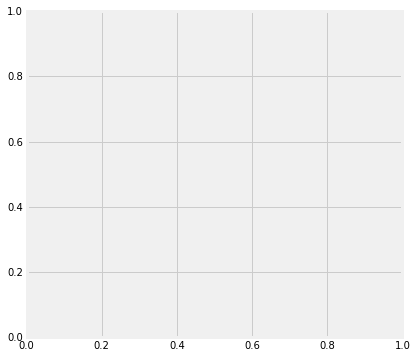

In [ ]:
pd.DataFrame(scores).T.sort_values(by='jac',ascending=False)#graphique train/test score
#plot(pd.DataFrame(scores).T,i=pd.DataFrame(scores).T.index,j=pd.DataFrame(scores).T['jac'])#

---
#Z) Flask+Ngrok as thread
---

In [ ]:
#py script.py img.jpg => echo pomeranian / shark #recommandé 10, puis 20 classes pour final à voir avec la ram... crescendo
#tester train resnet50 sur toutes les classes ( avec le moins de paramètres à gérer ) .. en Transfert plus probant

import socket
print(socket.gethostbyname(socket.getfqdn(socket.gethostname())))
from flask import Flask
app = Flask(__name__)
@app.route("/")
def hello():
  return "Hello World!"
import threading
threading.Thread(target=app.run, kwargs={'host':'0.0.0.0','port':80}).start()#adds a listening thread

#enable ngrok on a python notebook : flask + ngrok
!pip install flask-ngrok
from flask import Flask
from flask_ngrok import run_with_ngrok
app = Flask(__name__)
run_with_ngrok(app) # Start ngrok when app is run
@app.route("/")
def hello():
  return "Hello World!"
if __name__ == '__main__':
  threading.Thread(target=app.run).start()#adds a listening thread

assert(False)
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
LOG_DIR = './logs' # Here you have to put your log directory
get_ipython().system_raw('tensorboard --logdir {} --host 0.0.0.0 --port 8080 &'.format(LOG_DIR))
get_ipython().system_raw('./ngrok http 8080 &')
! curl -s http://localhost:4040/api/tunnels | python3 -c "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

SyntaxError: ignored

#.-----------------------------------------------------

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


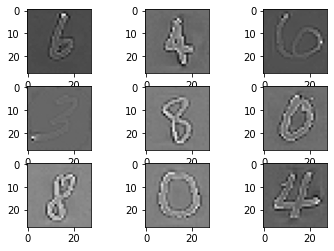

In [ ]:
# ZCA whitening
from keras.datasets import mnist
from keras.preprocesgreat suspsing.image import ImageDataGenerator
from matplotlib import pyplot
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator(zca_whitening=True)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break